# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 71288 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 71288) |          | Elapsed Time: 0:00:24 ETA:  20 days, 12:11:51

  0% (   88 of 71288) |                    | Elapsed Time: 0:00:25 ETA:  0:13:19

  0% (  168 of 71288) |                    | Elapsed Time: 0:00:26 ETA:  0:13:52

  0% (  246 of 71288) |                    | Elapsed Time: 0:00:27 ETA:  0:14:10

  0% (  322 of 71288) |                    | Elapsed Time: 0:00:28 ETA:  0:14:25

  0% (  400 of 71288) |                    | Elapsed Time: 0:00:29 ETA:  0:14:29

  0% (  478 of 71288) |                    | Elapsed Time: 0:00:30 ETA:  0:14:31

  0% (  557 of 71288) |                    | Elapsed Time: 0:00:31 ETA:  0:14:31

  0% (  641 of 71288) |                    | Elapsed Time: 0:00:32 ETA:  0:14:24

  1% (  724 of 71288) |                    | Elapsed Time: 0:00:33 ETA:  0:14:19

  1% (  808 of 71288) |                    | Elapsed Time: 0:00:34 ETA:  0:14:22

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:35 ETA:  0:14:15

  1% (  974 of 71288) |                    | Elapsed Time: 0:00:36 ETA:  0:14:09

  1% ( 1059 of 71288) |                    | Elapsed Time: 0:00:37 ETA:  0:13:57

  1% ( 1145 of 71288) |                    | Elapsed Time: 0:00:38 ETA:  0:13:47

  1% ( 1226 of 71288) |                    | Elapsed Time: 0:00:39 ETA:  0:13:42

  1% ( 1311 of 71288) |                    | Elapsed Time: 0:00:40 ETA:  0:13:35

  1% ( 1397 of 71288) |                    | Elapsed Time: 0:00:41 ETA:  0:13:31

  2% ( 1481 of 71288) |                    | Elapsed Time: 0:00:42 ETA:  0:13:29

  2% ( 1566 of 71288) |                    | Elapsed Time: 0:00:43 ETA:  0:13:27

  2% ( 1651 of 71288) |                    | Elapsed Time: 0:00:44 ETA:  0:13:26

  2% ( 1736 of 71288) |                    | Elapsed Time: 0:00:45 ETA:  0:13:22

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:46 ETA:  0:13:22

  2% ( 1867 of 71288) |                    | Elapsed Time: 0:00:47 ETA:  0:13:23

  2% ( 1945 of 71288) |                    | Elapsed Time: 0:00:48 ETA:  0:13:26

  2% ( 2014 of 71288) |                    | Elapsed Time: 0:00:49 ETA:  0:13:45

  2% ( 2047 of 71288) |                    | Elapsed Time: 0:00:50 ETA:  0:15:29

  2% ( 2113 of 71288) |                    | Elapsed Time: 0:00:51 ETA:  0:15:57

  3% ( 2181 of 71288) |                    | Elapsed Time: 0:00:52 ETA:  0:16:23

  3% ( 2248 of 71288) |                    | Elapsed Time: 0:00:53 ETA:  0:16:54

  3% ( 2319 of 71288) |                    | Elapsed Time: 0:00:54 ETA:  0:17:18

  3% ( 2386 of 71288) |                    | Elapsed Time: 0:00:55 ETA:  0:17:33

  3% ( 2457 of 71288) |                    | Elapsed Time: 0:00:56 ETA:  0:17:57

  3% ( 2527 of 71288) |                    | Elapsed Time: 0:00:57 ETA:  0:18:10

  3% ( 2599 of 71288) |                    | Elapsed Time: 0:00:58 ETA:  0:18:03

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:01:00 ETA:  0:16:15

  3% ( 2747 of 71288) |                    | Elapsed Time: 0:01:01 ETA:  0:16:05

  3% ( 2824 of 71288) |                    | Elapsed Time: 0:01:02 ETA:  0:15:45

  4% ( 2898 of 71288) |                    | Elapsed Time: 0:01:03 ETA:  0:15:38

  4% ( 2973 of 71288) |                    | Elapsed Time: 0:01:04 ETA:  0:15:24

  4% ( 3056 of 71288) |                    | Elapsed Time: 0:01:05 ETA:  0:15:02

  4% ( 3135 of 71288) |                    | Elapsed Time: 0:01:06 ETA:  0:14:47

  4% ( 3217 of 71288) |                    | Elapsed Time: 0:01:07 ETA:  0:14:31

  4% ( 3295 of 71288) |                    | Elapsed Time: 0:01:08 ETA:  0:14:16

  4% ( 3376 of 71288) |                    | Elapsed Time: 0:01:09 ETA:  0:14:09

  4% ( 3457 of 71288) |                    | Elapsed Time: 0:01:10 ETA:  0:13:58

  4% ( 3545 of 71288) |                    | Elapsed Time: 0:01:11 ETA:  0:13:44

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:01:11 ETA:  0:13:32

  5% ( 3654 of 71288) |#                   | Elapsed Time: 0:01:12 ETA:  0:13:12

  5% ( 3746 of 71288) |#                   | Elapsed Time: 0:01:13 ETA:  0:13:00

  5% ( 3837 of 71288) |#                   | Elapsed Time: 0:01:14 ETA:  0:12:45

  5% ( 3926 of 71288) |#                   | Elapsed Time: 0:01:15 ETA:  0:12:36

  5% ( 4016 of 71288) |#                   | Elapsed Time: 0:01:16 ETA:  0:12:21

  5% ( 4108 of 71288) |#                   | Elapsed Time: 0:01:17 ETA:  0:12:08

  5% ( 4200 of 71288) |#                   | Elapsed Time: 0:01:18 ETA:  0:11:55

  6% ( 4290 of 71288) |#                   | Elapsed Time: 0:01:19 ETA:  0:11:51

  6% ( 4380 of 71288) |#                   | Elapsed Time: 0:01:20 ETA:  0:11:51

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:01:21 ETA:  0:11:49

  6% ( 4534 of 71288) |#                   | Elapsed Time: 0:01:22 ETA:  0:12:02

  6% ( 4615 of 71288) |#                   | Elapsed Time: 0:01:23 ETA:  0:12:10

  6% ( 4699 of 71288) |#                   | Elapsed Time: 0:01:24 ETA:  0:12:14

  6% ( 4786 of 71288) |#                   | Elapsed Time: 0:01:25 ETA:  0:12:17

  6% ( 4871 of 71288) |#                   | Elapsed Time: 0:01:26 ETA:  0:12:24

  6% ( 4955 of 71288) |#                   | Elapsed Time: 0:01:27 ETA:  0:12:31

  7% ( 5038 of 71288) |#                   | Elapsed Time: 0:01:28 ETA:  0:12:37

  7% ( 5122 of 71288) |#                   | Elapsed Time: 0:01:29 ETA:  0:12:43

  7% ( 5205 of 71288) |#                   | Elapsed Time: 0:01:30 ETA:  0:12:51

  7% ( 5279 of 71288) |#                   | Elapsed Time: 0:01:31 ETA:  0:12:54

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:01:32 ETA:  0:12:55

  7% ( 5418 of 71288) |#                   | Elapsed Time: 0:01:33 ETA:  0:13:10

  7% ( 5433 of 71288) |#                   | Elapsed Time: 0:01:34 ETA:  0:15:14

  7% ( 5500 of 71288) |#                   | Elapsed Time: 0:01:35 ETA:  0:15:42

  7% ( 5569 of 71288) |#                   | Elapsed Time: 0:01:36 ETA:  0:16:06

  7% ( 5641 of 71288) |#                   | Elapsed Time: 0:01:37 ETA:  0:16:25

  8% ( 5716 of 71288) |#                   | Elapsed Time: 0:01:38 ETA:  0:16:41

  8% ( 5797 of 71288) |#                   | Elapsed Time: 0:01:39 ETA:  0:16:44

  8% ( 5891 of 71288) |#                   | Elapsed Time: 0:01:40 ETA:  0:16:07

  8% ( 5976 of 71288) |#                   | Elapsed Time: 0:01:41 ETA:  0:15:53

  8% ( 6060 of 71288) |#                   | Elapsed Time: 0:01:42 ETA:  0:15:31

  8% ( 6143 of 71288) |#                   | Elapsed Time: 0:01:43 ETA:  0:13:25

  8% ( 6220 of 71288) |#                   | Elapsed Time: 0:01:44 ETA:  0:13:12

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:44 ETA:  0:12:58

  8% ( 6314 of 71288) |#                   | Elapsed Time: 0:01:45 ETA:  0:12:52

  8% ( 6388 of 71288) |#                   | Elapsed Time: 0:01:46 ETA:  0:12:51

  9% ( 6465 of 71288) |#                   | Elapsed Time: 0:01:47 ETA:  0:12:55

  9% ( 6542 of 71288) |#                   | Elapsed Time: 0:01:48 ETA:  0:13:17

  9% ( 6618 of 71288) |#                   | Elapsed Time: 0:01:49 ETA:  0:13:29

  9% ( 6698 of 71288) |#                   | Elapsed Time: 0:01:50 ETA:  0:13:34

  9% ( 6777 of 71288) |#                   | Elapsed Time: 0:01:51 ETA:  0:13:40

  9% ( 6855 of 71288) |#                   | Elapsed Time: 0:01:52 ETA:  0:13:36

  9% ( 6937 of 71288) |#                   | Elapsed Time: 0:01:53 ETA:  0:13:29

  9% ( 7027 of 71288) |#                   | Elapsed Time: 0:01:54 ETA:  0:13:10

  9% ( 7107 of 71288) |#                   | Elapsed Time: 0:01:55 ETA:  0:13:02

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:56 ETA:  0:12:59

 10% ( 7209 of 71288) |##                  | Elapsed Time: 0:01:57 ETA:  0:12:54

 10% ( 7285 of 71288) |##                  | Elapsed Time: 0:01:58 ETA:  0:12:53

 10% ( 7365 of 71288) |##                  | Elapsed Time: 0:01:59 ETA:  0:12:51

 10% ( 7445 of 71288) |##                  | Elapsed Time: 0:02:00 ETA:  0:12:48

 10% ( 7525 of 71288) |##                  | Elapsed Time: 0:02:01 ETA:  0:12:44

 10% ( 7606 of 71288) |##                  | Elapsed Time: 0:02:02 ETA:  0:12:44

 10% ( 7687 of 71288) |##                  | Elapsed Time: 0:02:03 ETA:  0:12:54

 10% ( 7766 of 71288) |##                  | Elapsed Time: 0:02:04 ETA:  0:12:55

 11% ( 7846 of 71288) |##                  | Elapsed Time: 0:02:05 ETA:  0:12:53

 11% ( 7924 of 71288) |##                  | Elapsed Time: 0:02:06 ETA:  0:12:54

 11% ( 8002 of 71288) |##                  | Elapsed Time: 0:02:07 ETA:  0:12:50

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:02:07 ETA:  0:12:52

 11% ( 8099 of 71288) |##                  | Elapsed Time: 0:02:08 ETA:  0:12:53

 11% ( 8176 of 71288) |##                  | Elapsed Time: 0:02:09 ETA:  0:12:56

 11% ( 8256 of 71288) |##                  | Elapsed Time: 0:02:10 ETA:  0:12:56

 11% ( 8335 of 71288) |##                  | Elapsed Time: 0:02:11 ETA:  0:12:59

 11% ( 8414 of 71288) |##                  | Elapsed Time: 0:02:12 ETA:  0:12:58

 11% ( 8492 of 71288) |##                  | Elapsed Time: 0:02:13 ETA:  0:12:59

 12% ( 8570 of 71288) |##                  | Elapsed Time: 0:02:14 ETA:  0:12:59

 12% ( 8650 of 71288) |##                  | Elapsed Time: 0:02:15 ETA:  0:12:55

 12% ( 8730 of 71288) |##                  | Elapsed Time: 0:02:16 ETA:  0:12:52

 12% ( 8810 of 71288) |##                  | Elapsed Time: 0:02:17 ETA:  0:12:49

 12% ( 8890 of 71288) |##                  | Elapsed Time: 0:02:18 ETA:  0:12:44

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:02:18 ETA:  0:12:47

 12% ( 8993 of 71288) |##                  | Elapsed Time: 0:02:19 ETA:  0:12:42

 12% ( 9079 of 71288) |##                  | Elapsed Time: 0:02:20 ETA:  0:12:32

 12% ( 9165 of 71288) |##                  | Elapsed Time: 0:02:21 ETA:  0:12:21

 12% ( 9246 of 71288) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:16

 13% ( 9332 of 71288) |##                  | Elapsed Time: 0:02:23 ETA:  0:12:07

 13% ( 9418 of 71288) |##                  | Elapsed Time: 0:02:24 ETA:  0:11:59

 13% ( 9505 of 71288) |##                  | Elapsed Time: 0:02:25 ETA:  0:11:49

 13% ( 9592 of 71288) |##                  | Elapsed Time: 0:02:26 ETA:  0:11:40

 13% ( 9629 of 71288) |##                  | Elapsed Time: 0:02:28 ETA:  0:13:46

 13% ( 9710 of 71288) |##                  | Elapsed Time: 0:02:29 ETA:  0:13:45

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:02:30 ETA:  0:14:07

 13% ( 9883 of 71288) |##                  | Elapsed Time: 0:02:31 ETA:  0:14:07

 13% ( 9967 of 71288) |##                  | Elapsed Time: 0:02:32 ETA:  0:14:10

 14% (10048 of 71288) |##                  | Elapsed Time: 0:02:33 ETA:  0:14:17

 14% (10132 of 71288) |##                  | Elapsed Time: 0:02:34 ETA:  0:14:21

 14% (10218 of 71288) |##                  | Elapsed Time: 0:02:35 ETA:  0:14:21

 14% (10307 of 71288) |##                  | Elapsed Time: 0:02:36 ETA:  0:11:44

 14% (10396 of 71288) |##                  | Elapsed Time: 0:02:37 ETA:  0:11:33

 14% (10484 of 71288) |##                  | Elapsed Time: 0:02:38 ETA:  0:11:25

 14% (10572 of 71288) |##                  | Elapsed Time: 0:02:39 ETA:  0:11:19

 14% (10659 of 71288) |##                  | Elapsed Time: 0:02:40 ETA:  0:11:10

 15% (10694 of 71288) |###                 | Elapsed Time: 0:02:41 ETA:  0:11:08

 15% (10777 of 71288) |###                 | Elapsed Time: 0:02:42 ETA:  0:11:04

 15% (10860 of 71288) |###                 | Elapsed Time: 0:02:43 ETA:  0:11:05

 15% (10944 of 71288) |###                 | Elapsed Time: 0:02:44 ETA:  0:11:05

 15% (11028 of 71288) |###                 | Elapsed Time: 0:02:45 ETA:  0:11:09

 15% (11112 of 71288) |###                 | Elapsed Time: 0:02:46 ETA:  0:11:14

 15% (11194 of 71288) |###                 | Elapsed Time: 0:02:47 ETA:  0:11:20

 15% (11276 of 71288) |###                 | Elapsed Time: 0:02:48 ETA:  0:11:26

 15% (11360 of 71288) |###                 | Elapsed Time: 0:02:49 ETA:  0:11:32

 16% (11437 of 71288) |###                 | Elapsed Time: 0:02:50 ETA:  0:11:39

 16% (11517 of 71288) |###                 | Elapsed Time: 0:02:51 ETA:  0:11:42

 16% (11585 of 71288) |###                 | Elapsed Time: 0:02:52 ETA:  0:11:46

 16% (11664 of 71288) |###                 | Elapsed Time: 0:02:53 ETA:  0:11:51

 16% (11744 of 71288) |###                 | Elapsed Time: 0:02:54 ETA:  0:11:55

 16% (11824 of 71288) |###                 | Elapsed Time: 0:02:55 ETA:  0:11:58

 16% (11905 of 71288) |###                 | Elapsed Time: 0:02:56 ETA:  0:11:59

 16% (11988 of 71288) |###                 | Elapsed Time: 0:02:57 ETA:  0:11:58

 16% (12072 of 71288) |###                 | Elapsed Time: 0:02:58 ETA:  0:11:54

 17% (12156 of 71288) |###                 | Elapsed Time: 0:02:59 ETA:  0:11:45

 17% (12235 of 71288) |###                 | Elapsed Time: 0:03:00 ETA:  0:11:44

 17% (12318 of 71288) |###                 | Elapsed Time: 0:03:01 ETA:  0:11:39

 17% (12403 of 71288) |###                 | Elapsed Time: 0:03:02 ETA:  0:11:32

 17% (12476 of 71288) |###                 | Elapsed Time: 0:03:02 ETA:  0:11:26

 17% (12560 of 71288) |###                 | Elapsed Time: 0:03:04 ETA:  0:11:21

 17% (12644 of 71288) |###                 | Elapsed Time: 0:03:05 ETA:  0:11:17

 17% (12727 of 71288) |###                 | Elapsed Time: 0:03:06 ETA:  0:11:15

 17% (12811 of 71288) |###                 | Elapsed Time: 0:03:07 ETA:  0:11:14

 18% (12896 of 71288) |###                 | Elapsed Time: 0:03:08 ETA:  0:11:11

 18% (12977 of 71288) |###                 | Elapsed Time: 0:03:09 ETA:  0:11:07

 18% (13060 of 71288) |###                 | Elapsed Time: 0:03:10 ETA:  0:11:06

 18% (13146 of 71288) |###                 | Elapsed Time: 0:03:11 ETA:  0:11:04

 18% (13229 of 71288) |###                 | Elapsed Time: 0:03:12 ETA:  0:11:04

 18% (13313 of 71288) |###                 | Elapsed Time: 0:03:13 ETA:  0:11:03

 18% (13367 of 71288) |###                 | Elapsed Time: 0:03:13 ETA:  0:11:04

 18% (13448 of 71288) |###                 | Elapsed Time: 0:03:14 ETA:  0:11:05

 18% (13529 of 71288) |###                 | Elapsed Time: 0:03:15 ETA:  0:11:09

 19% (13607 of 71288) |###                 | Elapsed Time: 0:03:16 ETA:  0:11:17

 19% (13686 of 71288) |###                 | Elapsed Time: 0:03:17 ETA:  0:11:19

 19% (13766 of 71288) |###                 | Elapsed Time: 0:03:18 ETA:  0:11:21

 19% (13841 of 71288) |###                 | Elapsed Time: 0:03:19 ETA:  0:11:34

 19% (13912 of 71288) |###                 | Elapsed Time: 0:03:20 ETA:  0:11:48

 19% (13984 of 71288) |###                 | Elapsed Time: 0:03:21 ETA:  0:12:02

 19% (14064 of 71288) |###                 | Elapsed Time: 0:03:22 ETA:  0:12:02

 19% (14147 of 71288) |###                 | Elapsed Time: 0:03:23 ETA:  0:11:58

 19% (14230 of 71288) |###                 | Elapsed Time: 0:03:24 ETA:  0:11:54

 20% (14258 of 71288) |####                | Elapsed Time: 0:03:25 ETA:  0:11:51

 20% (14343 of 71288) |####                | Elapsed Time: 0:03:26 ETA:  0:11:42

 20% (14426 of 71288) |####                | Elapsed Time: 0:03:27 ETA:  0:11:37

 20% (14509 of 71288) |####                | Elapsed Time: 0:03:28 ETA:  0:11:26

 20% (14587 of 71288) |####                | Elapsed Time: 0:03:29 ETA:  0:11:16

 20% (14671 of 71288) |####                | Elapsed Time: 0:03:30 ETA:  0:11:00

 20% (14749 of 71288) |####                | Elapsed Time: 0:03:31 ETA:  0:11:02

 20% (14837 of 71288) |####                | Elapsed Time: 0:03:32 ETA:  0:10:55

 20% (14847 of 71288) |####                | Elapsed Time: 0:03:34 ETA:  0:14:11

 20% (14921 of 71288) |####                | Elapsed Time: 0:03:35 ETA:  0:14:08

 21% (14995 of 71288) |####                | Elapsed Time: 0:03:36 ETA:  0:14:26

 21% (15070 of 71288) |####                | Elapsed Time: 0:03:37 ETA:  0:14:39

 21% (15149 of 71288) |####                | Elapsed Time: 0:03:38 ETA:  0:15:16

 21% (15224 of 71288) |####                | Elapsed Time: 0:03:39 ETA:  0:15:34

 21% (15299 of 71288) |####                | Elapsed Time: 0:03:40 ETA:  0:15:38

 21% (15378 of 71288) |####                | Elapsed Time: 0:03:41 ETA:  0:15:56

 21% (15457 of 71288) |####                | Elapsed Time: 0:03:42 ETA:  0:12:06

 21% (15531 of 71288) |####                | Elapsed Time: 0:03:43 ETA:  0:12:05

 21% (15618 of 71288) |####                | Elapsed Time: 0:03:44 ETA:  0:11:43

 22% (15699 of 71288) |####                | Elapsed Time: 0:03:45 ETA:  0:11:33

 22% (15776 of 71288) |####                | Elapsed Time: 0:03:46 ETA:  0:11:29

 22% (15853 of 71288) |####                | Elapsed Time: 0:03:47 ETA:  0:11:29

 22% (15930 of 71288) |####                | Elapsed Time: 0:03:48 ETA:  0:11:25

 22% (16008 of 71288) |####                | Elapsed Time: 0:03:49 ETA:  0:11:20

 22% (16040 of 71288) |####                | Elapsed Time: 0:03:49 ETA:  0:11:19

 22% (16124 of 71288) |####                | Elapsed Time: 0:03:50 ETA:  0:11:11

 22% (16207 of 71288) |####                | Elapsed Time: 0:03:51 ETA:  0:10:57

 22% (16291 of 71288) |####                | Elapsed Time: 0:03:52 ETA:  0:11:00

 22% (16377 of 71288) |####                | Elapsed Time: 0:03:53 ETA:  0:10:52

 23% (16463 of 71288) |####                | Elapsed Time: 0:03:54 ETA:  0:10:40

 23% (16549 of 71288) |####                | Elapsed Time: 0:03:55 ETA:  0:10:28

 23% (16634 of 71288) |####                | Elapsed Time: 0:03:56 ETA:  0:10:19

 23% (16720 of 71288) |####                | Elapsed Time: 0:03:57 ETA:  0:10:08

 23% (16807 of 71288) |####                | Elapsed Time: 0:03:58 ETA:  0:10:03

 23% (16893 of 71288) |####                | Elapsed Time: 0:03:59 ETA:  0:10:00

 23% (16931 of 71288) |####                | Elapsed Time: 0:04:00 ETA:  0:09:58

 23% (17011 of 71288) |####                | Elapsed Time: 0:04:01 ETA:  0:10:02

 23% (17089 of 71288) |####                | Elapsed Time: 0:04:02 ETA:  0:10:10

 24% (17166 of 71288) |####                | Elapsed Time: 0:04:03 ETA:  0:10:20

 24% (17249 of 71288) |####                | Elapsed Time: 0:04:04 ETA:  0:10:22

 24% (17331 of 71288) |####                | Elapsed Time: 0:04:05 ETA:  0:10:24

 24% (17416 of 71288) |####                | Elapsed Time: 0:04:06 ETA:  0:10:25

 24% (17503 of 71288) |####                | Elapsed Time: 0:04:07 ETA:  0:10:24

 24% (17591 of 71288) |####                | Elapsed Time: 0:04:08 ETA:  0:10:21

 24% (17679 of 71288) |####                | Elapsed Time: 0:04:09 ETA:  0:10:13

 24% (17755 of 71288) |####                | Elapsed Time: 0:04:10 ETA:  0:10:17

 25% (17823 of 71288) |#####               | Elapsed Time: 0:04:10 ETA:  0:10:13

 25% (17910 of 71288) |#####               | Elapsed Time: 0:04:12 ETA:  0:10:01

 25% (17995 of 71288) |#####               | Elapsed Time: 0:04:13 ETA:  0:09:58

 25% (18075 of 71288) |#####               | Elapsed Time: 0:04:14 ETA:  0:09:59

 25% (18159 of 71288) |#####               | Elapsed Time: 0:04:15 ETA:  0:09:59

 25% (18243 of 71288) |#####               | Elapsed Time: 0:04:16 ETA:  0:10:02

 25% (18324 of 71288) |#####               | Elapsed Time: 0:04:17 ETA:  0:10:09

 25% (18402 of 71288) |#####               | Elapsed Time: 0:04:18 ETA:  0:10:20

 25% (18483 of 71288) |#####               | Elapsed Time: 0:04:19 ETA:  0:10:13

 26% (18566 of 71288) |#####               | Elapsed Time: 0:04:20 ETA:  0:10:09

 26% (18646 of 71288) |#####               | Elapsed Time: 0:04:21 ETA:  0:10:17

 26% (18714 of 71288) |#####               | Elapsed Time: 0:04:21 ETA:  0:10:14

 26% (18794 of 71288) |#####               | Elapsed Time: 0:04:22 ETA:  0:10:13

 26% (18875 of 71288) |#####               | Elapsed Time: 0:04:23 ETA:  0:10:16

 26% (18959 of 71288) |#####               | Elapsed Time: 0:04:24 ETA:  0:10:15

 26% (19052 of 71288) |#####               | Elapsed Time: 0:04:25 ETA:  0:10:00

 26% (19145 of 71288) |#####               | Elapsed Time: 0:04:26 ETA:  0:09:41

 26% (19234 of 71288) |#####               | Elapsed Time: 0:04:27 ETA:  0:09:31

 27% (19315 of 71288) |#####               | Elapsed Time: 0:04:28 ETA:  0:09:32

 27% (19401 of 71288) |#####               | Elapsed Time: 0:04:29 ETA:  0:09:24

 27% (19488 of 71288) |#####               | Elapsed Time: 0:04:30 ETA:  0:09:23

 27% (19574 of 71288) |#####               | Elapsed Time: 0:04:31 ETA:  0:09:15

 27% (19605 of 71288) |#####               | Elapsed Time: 0:04:32 ETA:  0:09:08

 27% (19693 of 71288) |#####               | Elapsed Time: 0:04:33 ETA:  0:09:03

 27% (19782 of 71288) |#####               | Elapsed Time: 0:04:34 ETA:  0:09:07

 27% (19871 of 71288) |#####               | Elapsed Time: 0:04:35 ETA:  0:09:10

 27% (19958 of 71288) |#####               | Elapsed Time: 0:04:36 ETA:  0:09:11

 28% (20041 of 71288) |#####               | Elapsed Time: 0:04:37 ETA:  0:09:07

 28% (20132 of 71288) |#####               | Elapsed Time: 0:04:38 ETA:  0:09:01

 28% (20220 of 71288) |#####               | Elapsed Time: 0:04:39 ETA:  0:08:58

 28% (20308 of 71288) |#####               | Elapsed Time: 0:04:40 ETA:  0:08:56

 28% (20398 of 71288) |#####               | Elapsed Time: 0:04:41 ETA:  0:08:52

 28% (20496 of 71288) |#####               | Elapsed Time: 0:04:42 ETA:  0:08:47

 28% (20586 of 71288) |#####               | Elapsed Time: 0:04:43 ETA:  0:08:46

 29% (20674 of 71288) |#####               | Elapsed Time: 0:04:44 ETA:  0:08:44

 29% (20763 of 71288) |#####               | Elapsed Time: 0:04:45 ETA:  0:08:36

 29% (20853 of 71288) |#####               | Elapsed Time: 0:04:46 ETA:  0:08:37

 29% (20945 of 71288) |#####               | Elapsed Time: 0:04:47 ETA:  0:08:32

 29% (21036 of 71288) |#####               | Elapsed Time: 0:04:48 ETA:  0:08:27

 29% (21118 of 71288) |#####               | Elapsed Time: 0:04:49 ETA:  0:08:35

 29% (21191 of 71288) |#####               | Elapsed Time: 0:04:50 ETA:  0:08:55

 29% (21256 of 71288) |#####               | Elapsed Time: 0:04:53 ETA:  0:12:13

 29% (21331 of 71288) |#####               | Elapsed Time: 0:04:54 ETA:  0:12:33

 30% (21387 of 71288) |######              | Elapsed Time: 0:04:55 ETA:  0:12:55

 30% (21460 of 71288) |######              | Elapsed Time: 0:04:56 ETA:  0:13:19

 30% (21541 of 71288) |######              | Elapsed Time: 0:04:57 ETA:  0:13:32

 30% (21623 of 71288) |######              | Elapsed Time: 0:04:58 ETA:  0:13:47

 30% (21710 of 71288) |######              | Elapsed Time: 0:04:59 ETA:  0:13:53

 30% (21798 of 71288) |######              | Elapsed Time: 0:05:00 ETA:  0:13:41

 30% (21890 of 71288) |######              | Elapsed Time: 0:05:01 ETA:  0:13:09

 30% (21973 of 71288) |######              | Elapsed Time: 0:05:02 ETA:  0:09:33

 30% (22059 of 71288) |######              | Elapsed Time: 0:05:03 ETA:  0:09:19

 31% (22147 of 71288) |######              | Elapsed Time: 0:05:04 ETA:  0:09:04

 31% (22230 of 71288) |######              | Elapsed Time: 0:05:05 ETA:  0:08:52

 31% (22278 of 71288) |######              | Elapsed Time: 0:05:05 ETA:  0:08:51

 31% (22363 of 71288) |######              | Elapsed Time: 0:05:06 ETA:  0:08:46

 31% (22451 of 71288) |######              | Elapsed Time: 0:05:07 ETA:  0:08:44

 31% (22536 of 71288) |######              | Elapsed Time: 0:05:08 ETA:  0:08:47

 31% (22621 of 71288) |######              | Elapsed Time: 0:05:09 ETA:  0:08:54

 31% (22704 of 71288) |######              | Elapsed Time: 0:05:10 ETA:  0:08:53

 31% (22788 of 71288) |######              | Elapsed Time: 0:05:11 ETA:  0:08:54

 32% (22871 of 71288) |######              | Elapsed Time: 0:05:12 ETA:  0:09:00

 32% (22950 of 71288) |######              | Elapsed Time: 0:05:13 ETA:  0:09:04

 32% (23028 of 71288) |######              | Elapsed Time: 0:05:14 ETA:  0:09:07

 32% (23106 of 71288) |######              | Elapsed Time: 0:05:15 ETA:  0:09:13

 32% (23169 of 71288) |######              | Elapsed Time: 0:05:16 ETA:  0:09:22

 32% (23244 of 71288) |######              | Elapsed Time: 0:05:17 ETA:  0:09:33

 32% (23327 of 71288) |######              | Elapsed Time: 0:05:18 ETA:  0:09:34

 32% (23406 of 71288) |######              | Elapsed Time: 0:05:19 ETA:  0:09:38

 32% (23488 of 71288) |######              | Elapsed Time: 0:05:20 ETA:  0:09:39

 33% (23564 of 71288) |######              | Elapsed Time: 0:05:21 ETA:  0:09:47

 33% (23645 of 71288) |######              | Elapsed Time: 0:05:22 ETA:  0:09:43

 33% (23726 of 71288) |######              | Elapsed Time: 0:05:23 ETA:  0:09:37

 33% (23811 of 71288) |######              | Elapsed Time: 0:05:24 ETA:  0:09:27

 33% (23897 of 71288) |######              | Elapsed Time: 0:05:25 ETA:  0:09:18

 33% (23982 of 71288) |######              | Elapsed Time: 0:05:26 ETA:  0:09:06

 33% (24060 of 71288) |######              | Elapsed Time: 0:05:27 ETA:  0:09:01

 33% (24142 of 71288) |######              | Elapsed Time: 0:05:28 ETA:  0:08:57

 33% (24225 of 71288) |######              | Elapsed Time: 0:05:29 ETA:  0:08:55

 34% (24311 of 71288) |######              | Elapsed Time: 0:05:30 ETA:  0:08:42

 34% (24394 of 71288) |######              | Elapsed Time: 0:05:31 ETA:  0:08:39

 34% (24483 of 71288) |######              | Elapsed Time: 0:05:32 ETA:  0:08:29

 34% (24571 of 71288) |######              | Elapsed Time: 0:05:33 ETA:  0:08:25

 34% (24659 of 71288) |######              | Elapsed Time: 0:05:34 ETA:  0:08:22

 34% (24742 of 71288) |######              | Elapsed Time: 0:05:35 ETA:  0:08:24

 34% (24826 of 71288) |######              | Elapsed Time: 0:05:36 ETA:  0:08:25

 34% (24908 of 71288) |######              | Elapsed Time: 0:05:37 ETA:  0:08:23

 35% (24951 of 71288) |#######             | Elapsed Time: 0:05:38 ETA:  0:08:29

 35% (25014 of 71288) |#######             | Elapsed Time: 0:05:39 ETA:  0:08:57

 35% (25090 of 71288) |#######             | Elapsed Time: 0:05:40 ETA:  0:09:04

 35% (25168 of 71288) |#######             | Elapsed Time: 0:05:41 ETA:  0:09:17

 35% (25247 of 71288) |#######             | Elapsed Time: 0:05:42 ETA:  0:09:28

 35% (25329 of 71288) |#######             | Elapsed Time: 0:05:43 ETA:  0:09:35

 35% (25408 of 71288) |#######             | Elapsed Time: 0:05:44 ETA:  0:09:40

 35% (25489 of 71288) |#######             | Elapsed Time: 0:05:45 ETA:  0:09:43

 35% (25572 of 71288) |#######             | Elapsed Time: 0:05:46 ETA:  0:09:41

 35% (25657 of 71288) |#######             | Elapsed Time: 0:05:47 ETA:  0:09:27

 36% (25738 of 71288) |#######             | Elapsed Time: 0:05:48 ETA:  0:09:02

 36% (25821 of 71288) |#######             | Elapsed Time: 0:05:49 ETA:  0:08:52

 36% (25842 of 71288) |#######             | Elapsed Time: 0:05:49 ETA:  0:08:49

 36% (25919 of 71288) |#######             | Elapsed Time: 0:05:50 ETA:  0:08:51

 36% (26000 of 71288) |#######             | Elapsed Time: 0:05:51 ETA:  0:08:51

 36% (26080 of 71288) |#######             | Elapsed Time: 0:05:52 ETA:  0:08:48

 36% (26167 of 71288) |#######             | Elapsed Time: 0:05:53 ETA:  0:08:40

 36% (26250 of 71288) |#######             | Elapsed Time: 0:05:54 ETA:  0:08:39

 36% (26334 of 71288) |#######             | Elapsed Time: 0:05:55 ETA:  0:08:39

 37% (26413 of 71288) |#######             | Elapsed Time: 0:05:56 ETA:  0:08:42

 37% (26495 of 71288) |#######             | Elapsed Time: 0:05:57 ETA:  0:08:42

 37% (26580 of 71288) |#######             | Elapsed Time: 0:05:58 ETA:  0:08:36

 37% (26662 of 71288) |#######             | Elapsed Time: 0:05:59 ETA:  0:08:29

 37% (26734 of 71288) |#######             | Elapsed Time: 0:06:00 ETA:  0:08:26

 37% (26817 of 71288) |#######             | Elapsed Time: 0:06:01 ETA:  0:08:23

 37% (26896 of 71288) |#######             | Elapsed Time: 0:06:02 ETA:  0:08:31

 37% (26974 of 71288) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:36

 37% (27049 of 71288) |#######             | Elapsed Time: 0:06:04 ETA:  0:08:46

 38% (27126 of 71288) |#######             | Elapsed Time: 0:06:05 ETA:  0:08:47

 38% (27207 of 71288) |#######             | Elapsed Time: 0:06:06 ETA:  0:08:49

 38% (27289 of 71288) |#######             | Elapsed Time: 0:06:07 ETA:  0:08:50

 38% (27376 of 71288) |#######             | Elapsed Time: 0:06:08 ETA:  0:08:43

 38% (27459 of 71288) |#######             | Elapsed Time: 0:06:09 ETA:  0:08:41

 38% (27535 of 71288) |#######             | Elapsed Time: 0:06:10 ETA:  0:08:48

 38% (27625 of 71288) |#######             | Elapsed Time: 0:06:11 ETA:  0:08:50

 38% (27708 of 71288) |#######             | Elapsed Time: 0:06:12 ETA:  0:08:38

 38% (27791 of 71288) |#######             | Elapsed Time: 0:06:13 ETA:  0:08:29

 39% (27873 of 71288) |#######             | Elapsed Time: 0:06:14 ETA:  0:08:26

 39% (27956 of 71288) |#######             | Elapsed Time: 0:06:15 ETA:  0:08:24

 39% (28039 of 71288) |#######             | Elapsed Time: 0:06:16 ETA:  0:08:29

 39% (28118 of 71288) |#######             | Elapsed Time: 0:06:17 ETA:  0:08:33

 39% (28198 of 71288) |#######             | Elapsed Time: 0:06:18 ETA:  0:08:26

 39% (28280 of 71288) |#######             | Elapsed Time: 0:06:19 ETA:  0:08:16

 39% (28358 of 71288) |#######             | Elapsed Time: 0:06:20 ETA:  0:08:20

 39% (28438 of 71288) |#######             | Elapsed Time: 0:06:21 ETA:  0:08:22

 40% (28516 of 71288) |########            | Elapsed Time: 0:06:22 ETA:  0:08:22

 40% (28596 of 71288) |########            | Elapsed Time: 0:06:23 ETA:  0:08:24

 40% (28675 of 71288) |########            | Elapsed Time: 0:06:24 ETA:  0:08:28

 40% (28751 of 71288) |########            | Elapsed Time: 0:06:25 ETA:  0:08:35

 40% (28833 of 71288) |########            | Elapsed Time: 0:06:26 ETA:  0:08:32

 40% (28910 of 71288) |########            | Elapsed Time: 0:06:27 ETA:  0:08:34

 40% (28992 of 71288) |########            | Elapsed Time: 0:06:28 ETA:  0:08:33

 40% (29070 of 71288) |########            | Elapsed Time: 0:06:29 ETA:  0:08:33

 40% (29125 of 71288) |########            | Elapsed Time: 0:06:33 ETA:  0:13:00

 40% (29188 of 71288) |########            | Elapsed Time: 0:06:34 ETA:  0:13:29

 41% (29263 of 71288) |########            | Elapsed Time: 0:06:35 ETA:  0:13:37

 41% (29338 of 71288) |########            | Elapsed Time: 0:06:36 ETA:  0:13:44

 41% (29407 of 71288) |########            | Elapsed Time: 0:06:37 ETA:  0:13:46

 41% (29484 of 71288) |########            | Elapsed Time: 0:06:38 ETA:  0:13:53

 41% (29564 of 71288) |########            | Elapsed Time: 0:06:39 ETA:  0:13:47

 41% (29645 of 71288) |########            | Elapsed Time: 0:06:40 ETA:  0:13:48

 41% (29733 of 71288) |########            | Elapsed Time: 0:06:41 ETA:  0:13:28

 41% (29819 of 71288) |########            | Elapsed Time: 0:06:42 ETA:  0:08:38

 41% (29904 of 71288) |########            | Elapsed Time: 0:06:43 ETA:  0:08:09

 42% (29984 of 71288) |########            | Elapsed Time: 0:06:44 ETA:  0:08:02

 42% (30071 of 71288) |########            | Elapsed Time: 0:06:45 ETA:  0:07:46

 42% (30155 of 71288) |########            | Elapsed Time: 0:06:46 ETA:  0:07:36

 42% (30241 of 71288) |########            | Elapsed Time: 0:06:47 ETA:  0:07:25

 42% (30298 of 71288) |########            | Elapsed Time: 0:06:47 ETA:  0:07:23

 42% (30375 of 71288) |########            | Elapsed Time: 0:06:48 ETA:  0:07:26

 42% (30452 of 71288) |########            | Elapsed Time: 0:06:49 ETA:  0:07:38

 42% (30530 of 71288) |########            | Elapsed Time: 0:06:50 ETA:  0:07:47

 42% (30613 of 71288) |########            | Elapsed Time: 0:06:51 ETA:  0:07:49

 43% (30696 of 71288) |########            | Elapsed Time: 0:06:52 ETA:  0:07:45

 43% (30786 of 71288) |########            | Elapsed Time: 0:06:53 ETA:  0:07:40

 43% (30866 of 71288) |########            | Elapsed Time: 0:06:54 ETA:  0:07:44

 43% (30947 of 71288) |########            | Elapsed Time: 0:06:55 ETA:  0:07:49

 43% (31035 of 71288) |########            | Elapsed Time: 0:06:56 ETA:  0:07:39

 43% (31123 of 71288) |########            | Elapsed Time: 0:06:57 ETA:  0:07:25

 43% (31189 of 71288) |########            | Elapsed Time: 0:06:58 ETA:  0:07:15

 43% (31273 of 71288) |########            | Elapsed Time: 0:06:59 ETA:  0:07:06

 43% (31355 of 71288) |########            | Elapsed Time: 0:07:00 ETA:  0:07:06

 44% (31439 of 71288) |########            | Elapsed Time: 0:07:01 ETA:  0:07:05

 44% (31527 of 71288) |########            | Elapsed Time: 0:07:02 ETA:  0:07:06

 44% (31613 of 71288) |########            | Elapsed Time: 0:07:03 ETA:  0:06:59

 44% (31695 of 71288) |########            | Elapsed Time: 0:07:04 ETA:  0:06:57

 44% (31772 of 71288) |########            | Elapsed Time: 0:07:05 ETA:  0:07:08

 44% (31857 of 71288) |########            | Elapsed Time: 0:07:06 ETA:  0:07:11

 44% (31942 of 71288) |########            | Elapsed Time: 0:07:07 ETA:  0:07:09

 44% (32026 of 71288) |########            | Elapsed Time: 0:07:08 ETA:  0:07:08

 45% (32080 of 71288) |#########           | Elapsed Time: 0:07:09 ETA:  0:07:07

 45% (32169 of 71288) |#########           | Elapsed Time: 0:07:10 ETA:  0:07:00

 45% (32246 of 71288) |#########           | Elapsed Time: 0:07:11 ETA:  0:07:13

 45% (32322 of 71288) |#########           | Elapsed Time: 0:07:12 ETA:  0:07:23

 45% (32393 of 71288) |#########           | Elapsed Time: 0:07:13 ETA:  0:07:35

 45% (32469 of 71288) |#########           | Elapsed Time: 0:07:14 ETA:  0:07:35

 45% (32553 of 71288) |#########           | Elapsed Time: 0:07:15 ETA:  0:07:35

 45% (32633 of 71288) |#########           | Elapsed Time: 0:07:16 ETA:  0:07:41

 45% (32714 of 71288) |#########           | Elapsed Time: 0:07:17 ETA:  0:07:44

 46% (32801 of 71288) |#########           | Elapsed Time: 0:07:18 ETA:  0:07:35

 46% (32884 of 71288) |#########           | Elapsed Time: 0:07:19 ETA:  0:07:42

 46% (32971 of 71288) |#########           | Elapsed Time: 0:07:20 ETA:  0:07:28

 46% (33058 of 71288) |#########           | Elapsed Time: 0:07:21 ETA:  0:07:14

 46% (33139 of 71288) |#########           | Elapsed Time: 0:07:22 ETA:  0:07:02

 46% (33217 of 71288) |#########           | Elapsed Time: 0:07:23 ETA:  0:06:59

 46% (33299 of 71288) |#########           | Elapsed Time: 0:07:24 ETA:  0:07:00

 46% (33377 of 71288) |#########           | Elapsed Time: 0:07:25 ETA:  0:07:02

 46% (33457 of 71288) |#########           | Elapsed Time: 0:07:26 ETA:  0:07:01

 47% (33541 of 71288) |#########           | Elapsed Time: 0:07:27 ETA:  0:07:04

 47% (33628 of 71288) |#########           | Elapsed Time: 0:07:28 ETA:  0:06:58

 47% (33714 of 71288) |#########           | Elapsed Time: 0:07:29 ETA:  0:06:59

 47% (33797 of 71288) |#########           | Elapsed Time: 0:07:30 ETA:  0:07:03

 47% (33862 of 71288) |#########           | Elapsed Time: 0:07:31 ETA:  0:06:56

 47% (33947 of 71288) |#########           | Elapsed Time: 0:07:32 ETA:  0:06:47

 47% (34033 of 71288) |#########           | Elapsed Time: 0:07:33 ETA:  0:06:42

 47% (34118 of 71288) |#########           | Elapsed Time: 0:07:34 ETA:  0:06:32

 47% (34191 of 71288) |#########           | Elapsed Time: 0:07:35 ETA:  0:06:40

 48% (34273 of 71288) |#########           | Elapsed Time: 0:07:36 ETA:  0:06:41

 48% (34357 of 71288) |#########           | Elapsed Time: 0:07:37 ETA:  0:06:43

 48% (34445 of 71288) |#########           | Elapsed Time: 0:07:38 ETA:  0:06:39

 48% (34528 of 71288) |#########           | Elapsed Time: 0:07:39 ETA:  0:06:38

 48% (34609 of 71288) |#########           | Elapsed Time: 0:07:40 ETA:  0:06:43

 48% (34676 of 71288) |#########           | Elapsed Time: 0:07:41 ETA:  0:07:02

 48% (34753 of 71288) |#########           | Elapsed Time: 0:07:42 ETA:  0:07:40

 48% (34820 of 71288) |#########           | Elapsed Time: 0:07:43 ETA:  0:07:48

 48% (34900 of 71288) |#########           | Elapsed Time: 0:07:44 ETA:  0:07:50

 49% (34985 of 71288) |#########           | Elapsed Time: 0:07:45 ETA:  0:07:48

 49% (35060 of 71288) |#########           | Elapsed Time: 0:07:46 ETA:  0:08:08

 49% (35139 of 71288) |#########           | Elapsed Time: 0:07:47 ETA:  0:08:14

 49% (35225 of 71288) |#########           | Elapsed Time: 0:07:48 ETA:  0:08:05

 49% (35308 of 71288) |#########           | Elapsed Time: 0:07:49 ETA:  0:07:40

 49% (35392 of 71288) |#########           | Elapsed Time: 0:07:50 ETA:  0:07:13

 49% (35478 of 71288) |#########           | Elapsed Time: 0:07:51 ETA:  0:07:00

 49% (35560 of 71288) |#########           | Elapsed Time: 0:07:52 ETA:  0:06:41

 50% (35645 of 71288) |##########          | Elapsed Time: 0:07:53 ETA:  0:06:46

 50% (35726 of 71288) |##########          | Elapsed Time: 0:07:54 ETA:  0:06:37

 50% (35810 of 71288) |##########          | Elapsed Time: 0:07:55 ETA:  0:06:29

 50% (35884 of 71288) |##########          | Elapsed Time: 0:07:56 ETA:  0:06:44

 50% (35961 of 71288) |##########          | Elapsed Time: 0:07:57 ETA:  0:06:51

 50% (36042 of 71288) |##########          | Elapsed Time: 0:07:58 ETA:  0:06:54

 50% (36126 of 71288) |##########          | Elapsed Time: 0:07:59 ETA:  0:06:56

 50% (36212 of 71288) |##########          | Elapsed Time: 0:08:00 ETA:  0:06:49

 50% (36297 of 71288) |##########          | Elapsed Time: 0:08:01 ETA:  0:06:39

 51% (36381 of 71288) |##########          | Elapsed Time: 0:08:02 ETA:  0:06:34

 51% (36468 of 71288) |##########          | Elapsed Time: 0:08:03 ETA:  0:06:27

 51% (36536 of 71288) |##########          | Elapsed Time: 0:08:04 ETA:  0:06:25

 51% (36618 of 71288) |##########          | Elapsed Time: 0:08:05 ETA:  0:06:14

 51% (36697 of 71288) |##########          | Elapsed Time: 0:08:06 ETA:  0:06:10

 51% (36784 of 71288) |##########          | Elapsed Time: 0:08:07 ETA:  0:06:02

 51% (36868 of 71288) |##########          | Elapsed Time: 0:08:08 ETA:  0:06:01

 51% (36956 of 71288) |##########          | Elapsed Time: 0:08:09 ETA:  0:05:58

 51% (37044 of 71288) |##########          | Elapsed Time: 0:08:10 ETA:  0:05:53

 52% (37127 of 71288) |##########          | Elapsed Time: 0:08:11 ETA:  0:05:53

 52% (37210 of 71288) |##########          | Elapsed Time: 0:08:12 ETA:  0:05:57

 52% (37296 of 71288) |##########          | Elapsed Time: 0:08:13 ETA:  0:05:55

 52% (37381 of 71288) |##########          | Elapsed Time: 0:08:14 ETA:  0:05:50

 52% (37427 of 71288) |##########          | Elapsed Time: 0:08:15 ETA:  0:05:43

 52% (37512 of 71288) |##########          | Elapsed Time: 0:08:16 ETA:  0:05:44

 52% (37595 of 71288) |##########          | Elapsed Time: 0:08:17 ETA:  0:05:44

 52% (37682 of 71288) |##########          | Elapsed Time: 0:08:18 ETA:  0:05:45

 52% (37767 of 71288) |##########          | Elapsed Time: 0:08:19 ETA:  0:05:47

 53% (37851 of 71288) |##########          | Elapsed Time: 0:08:20 ETA:  0:05:44

 53% (37933 of 71288) |##########          | Elapsed Time: 0:08:21 ETA:  0:05:44

 53% (38005 of 71288) |##########          | Elapsed Time: 0:08:22 ETA:  0:06:00

 53% (38083 of 71288) |##########          | Elapsed Time: 0:08:23 ETA:  0:06:07

 53% (38171 of 71288) |##########          | Elapsed Time: 0:08:24 ETA:  0:06:02

 53% (38254 of 71288) |##########          | Elapsed Time: 0:08:25 ETA:  0:06:03

 53% (38318 of 71288) |##########          | Elapsed Time: 0:08:26 ETA:  0:06:09

 53% (38404 of 71288) |##########          | Elapsed Time: 0:08:27 ETA:  0:06:09

 53% (38488 of 71288) |##########          | Elapsed Time: 0:08:28 ETA:  0:06:09

 54% (38576 of 71288) |##########          | Elapsed Time: 0:08:29 ETA:  0:06:04

 54% (38661 of 71288) |##########          | Elapsed Time: 0:08:30 ETA:  0:06:00

 54% (38743 of 71288) |##########          | Elapsed Time: 0:08:31 ETA:  0:05:47

 54% (38816 of 71288) |##########          | Elapsed Time: 0:08:32 ETA:  0:05:52

 54% (38868 of 71288) |##########          | Elapsed Time: 0:08:36 ETA:  0:11:41

 54% (38946 of 71288) |##########          | Elapsed Time: 0:08:37 ETA:  0:11:49

 54% (39024 of 71288) |##########          | Elapsed Time: 0:08:38 ETA:  0:11:40

 54% (39097 of 71288) |##########          | Elapsed Time: 0:08:39 ETA:  0:12:02

 54% (39175 of 71288) |##########          | Elapsed Time: 0:08:40 ETA:  0:12:13

 55% (39209 of 71288) |###########         | Elapsed Time: 0:08:40 ETA:  0:12:55

 55% (39288 of 71288) |###########         | Elapsed Time: 0:08:41 ETA:  0:13:06

 55% (39373 of 71288) |###########         | Elapsed Time: 0:08:42 ETA:  0:12:59

 55% (39458 of 71288) |###########         | Elapsed Time: 0:08:43 ETA:  0:12:34

 55% (39540 of 71288) |###########         | Elapsed Time: 0:08:44 ETA:  0:06:16

 55% (39620 of 71288) |###########         | Elapsed Time: 0:08:45 ETA:  0:06:12

 55% (39704 of 71288) |###########         | Elapsed Time: 0:08:46 ETA:  0:06:03

 55% (39788 of 71288) |###########         | Elapsed Time: 0:08:47 ETA:  0:05:48

 55% (39873 of 71288) |###########         | Elapsed Time: 0:08:48 ETA:  0:05:38

 56% (39956 of 71288) |###########         | Elapsed Time: 0:08:49 ETA:  0:05:35

 56% (40039 of 71288) |###########         | Elapsed Time: 0:08:50 ETA:  0:05:30

 56% (40100 of 71288) |###########         | Elapsed Time: 0:08:51 ETA:  0:05:40

 56% (40186 of 71288) |###########         | Elapsed Time: 0:08:52 ETA:  0:05:39

 56% (40275 of 71288) |###########         | Elapsed Time: 0:08:53 ETA:  0:05:30

 56% (40360 of 71288) |###########         | Elapsed Time: 0:08:54 ETA:  0:05:24

 56% (40431 of 71288) |###########         | Elapsed Time: 0:08:55 ETA:  0:05:38

 56% (40516 of 71288) |###########         | Elapsed Time: 0:08:56 ETA:  0:05:35

 56% (40603 of 71288) |###########         | Elapsed Time: 0:08:57 ETA:  0:05:31

 57% (40688 of 71288) |###########         | Elapsed Time: 0:08:58 ETA:  0:05:28

 57% (40767 of 71288) |###########         | Elapsed Time: 0:08:59 ETA:  0:05:31

 57% (40857 of 71288) |###########         | Elapsed Time: 0:09:00 ETA:  0:05:12

 57% (40936 of 71288) |###########         | Elapsed Time: 0:09:01 ETA:  0:05:18

 57% (40991 of 71288) |###########         | Elapsed Time: 0:09:02 ETA:  0:05:21

 57% (41070 of 71288) |###########         | Elapsed Time: 0:09:03 ETA:  0:05:27

 57% (41150 of 71288) |###########         | Elapsed Time: 0:09:04 ETA:  0:05:15

 57% (41231 of 71288) |###########         | Elapsed Time: 0:09:05 ETA:  0:05:19

 57% (41322 of 71288) |###########         | Elapsed Time: 0:09:06 ETA:  0:05:13

 58% (41410 of 71288) |###########         | Elapsed Time: 0:09:07 ETA:  0:05:09

 58% (41497 of 71288) |###########         | Elapsed Time: 0:09:08 ETA:  0:04:59

 58% (41581 of 71288) |###########         | Elapsed Time: 0:09:09 ETA:  0:05:05

 58% (41667 of 71288) |###########         | Elapsed Time: 0:09:10 ETA:  0:04:57

 58% (41752 of 71288) |###########         | Elapsed Time: 0:09:11 ETA:  0:04:57

 58% (41834 of 71288) |###########         | Elapsed Time: 0:09:12 ETA:  0:04:53

 58% (41882 of 71288) |###########         | Elapsed Time: 0:09:12 ETA:  0:04:51

 58% (41963 of 71288) |###########         | Elapsed Time: 0:09:13 ETA:  0:04:50

 58% (42044 of 71288) |###########         | Elapsed Time: 0:09:14 ETA:  0:05:00

 59% (42128 of 71288) |###########         | Elapsed Time: 0:09:15 ETA:  0:05:04

 59% (42214 of 71288) |###########         | Elapsed Time: 0:09:16 ETA:  0:05:05

 59% (42293 of 71288) |###########         | Elapsed Time: 0:09:17 ETA:  0:05:09

 59% (42380 of 71288) |###########         | Elapsed Time: 0:09:18 ETA:  0:05:07

 59% (42462 of 71288) |###########         | Elapsed Time: 0:09:19 ETA:  0:05:10

 59% (42551 of 71288) |###########         | Elapsed Time: 0:09:20 ETA:  0:05:00

 59% (42638 of 71288) |###########         | Elapsed Time: 0:09:21 ETA:  0:04:52

 59% (42722 of 71288) |###########         | Elapsed Time: 0:09:22 ETA:  0:04:47

 60% (42773 of 71288) |############        | Elapsed Time: 0:09:23 ETA:  0:04:38

 60% (42861 of 71288) |############        | Elapsed Time: 0:09:24 ETA:  0:04:32

 60% (42948 of 71288) |############        | Elapsed Time: 0:09:25 ETA:  0:04:29

 60% (43033 of 71288) |############        | Elapsed Time: 0:09:26 ETA:  0:04:22

 60% (43119 of 71288) |############        | Elapsed Time: 0:09:27 ETA:  0:04:21

 60% (43194 of 71288) |############        | Elapsed Time: 0:09:28 ETA:  0:04:28

 60% (43272 of 71288) |############        | Elapsed Time: 0:09:29 ETA:  0:04:40

 60% (43350 of 71288) |############        | Elapsed Time: 0:09:30 ETA:  0:04:50

 60% (43423 of 71288) |############        | Elapsed Time: 0:09:31 ETA:  0:05:03

 61% (43499 of 71288) |############        | Elapsed Time: 0:09:32 ETA:  0:05:16

 61% (43576 of 71288) |############        | Elapsed Time: 0:09:33 ETA:  0:05:30

 61% (43664 of 71288) |############        | Elapsed Time: 0:09:34 ETA:  0:05:49

 61% (43746 of 71288) |############        | Elapsed Time: 0:09:35 ETA:  0:05:55

 61% (43825 of 71288) |############        | Elapsed Time: 0:09:36 ETA:  0:05:48

 61% (43907 of 71288) |############        | Elapsed Time: 0:09:37 ETA:  0:05:42

 61% (43989 of 71288) |############        | Elapsed Time: 0:09:38 ETA:  0:05:34

 61% (44072 of 71288) |############        | Elapsed Time: 0:09:39 ETA:  0:05:19

 61% (44156 of 71288) |############        | Elapsed Time: 0:09:40 ETA:  0:05:07

 62% (44239 of 71288) |############        | Elapsed Time: 0:09:41 ETA:  0:04:57

 62% (44327 of 71288) |############        | Elapsed Time: 0:09:42 ETA:  0:04:43

 62% (44414 of 71288) |############        | Elapsed Time: 0:09:43 ETA:  0:04:37

 62% (44496 of 71288) |############        | Elapsed Time: 0:09:44 ETA:  0:04:37

 62% (44556 of 71288) |############        | Elapsed Time: 0:09:45 ETA:  0:04:27

 62% (44632 of 71288) |############        | Elapsed Time: 0:09:46 ETA:  0:04:34

 62% (44702 of 71288) |############        | Elapsed Time: 0:09:47 ETA:  0:04:48

 62% (44788 of 71288) |############        | Elapsed Time: 0:09:48 ETA:  0:04:43

 62% (44873 of 71288) |############        | Elapsed Time: 0:09:49 ETA:  0:04:41

 63% (44957 of 71288) |############        | Elapsed Time: 0:09:50 ETA:  0:04:39

 63% (45043 of 71288) |############        | Elapsed Time: 0:09:51 ETA:  0:04:40

 63% (45127 of 71288) |############        | Elapsed Time: 0:09:52 ETA:  0:04:42

 63% (45210 of 71288) |############        | Elapsed Time: 0:09:53 ETA:  0:04:40

 63% (45291 of 71288) |############        | Elapsed Time: 0:09:54 ETA:  0:04:44

 63% (45376 of 71288) |############        | Elapsed Time: 0:09:55 ETA:  0:04:33

 63% (45447 of 71288) |############        | Elapsed Time: 0:09:56 ETA:  0:04:25

 63% (45531 of 71288) |############        | Elapsed Time: 0:09:57 ETA:  0:04:26

 63% (45619 of 71288) |############        | Elapsed Time: 0:09:58 ETA:  0:04:21

 64% (45702 of 71288) |############        | Elapsed Time: 0:09:59 ETA:  0:04:21

 64% (45778 of 71288) |############        | Elapsed Time: 0:10:00 ETA:  0:04:32

 64% (45860 of 71288) |############        | Elapsed Time: 0:10:01 ETA:  0:04:34

 64% (45939 of 71288) |############        | Elapsed Time: 0:10:02 ETA:  0:04:37

 64% (46019 of 71288) |############        | Elapsed Time: 0:10:03 ETA:  0:04:37

 64% (46105 of 71288) |############        | Elapsed Time: 0:10:04 ETA:  0:04:35

 64% (46186 of 71288) |############        | Elapsed Time: 0:10:05 ETA:  0:04:28

 64% (46271 of 71288) |############        | Elapsed Time: 0:10:06 ETA:  0:04:26

 65% (46338 of 71288) |#############       | Elapsed Time: 0:10:07 ETA:  0:04:25

 65% (46429 of 71288) |#############       | Elapsed Time: 0:10:08 ETA:  0:04:15

 65% (46511 of 71288) |#############       | Elapsed Time: 0:10:09 ETA:  0:04:07

 65% (46599 of 71288) |#############       | Elapsed Time: 0:10:10 ETA:  0:03:59

 65% (46685 of 71288) |#############       | Elapsed Time: 0:10:11 ETA:  0:03:49

 65% (46762 of 71288) |#############       | Elapsed Time: 0:10:12 ETA:  0:03:52

 65% (46848 of 71288) |#############       | Elapsed Time: 0:10:13 ETA:  0:03:52

 65% (46938 of 71288) |#############       | Elapsed Time: 0:10:14 ETA:  0:03:40

 65% (47022 of 71288) |#############       | Elapsed Time: 0:10:15 ETA:  0:03:40

 66% (47100 of 71288) |#############       | Elapsed Time: 0:10:16 ETA:  0:03:50

 66% (47181 of 71288) |#############       | Elapsed Time: 0:10:17 ETA:  0:04:00

 66% (47229 of 71288) |#############       | Elapsed Time: 0:10:17 ETA:  0:03:59

 66% (47312 of 71288) |#############       | Elapsed Time: 0:10:18 ETA:  0:04:04

 66% (47396 of 71288) |#############       | Elapsed Time: 0:10:19 ETA:  0:04:06

 66% (47481 of 71288) |#############       | Elapsed Time: 0:10:20 ETA:  0:03:55

 66% (47569 of 71288) |#############       | Elapsed Time: 0:10:22 ETA:  0:03:51

 66% (47650 of 71288) |#############       | Elapsed Time: 0:10:23 ETA:  0:04:01

 66% (47728 of 71288) |#############       | Elapsed Time: 0:10:24 ETA:  0:04:08

 67% (47812 of 71288) |#############       | Elapsed Time: 0:10:25 ETA:  0:04:00

 67% (47899 of 71288) |#############       | Elapsed Time: 0:10:26 ETA:  0:03:51

 67% (47984 of 71288) |#############       | Elapsed Time: 0:10:27 ETA:  0:03:48

 67% (48068 of 71288) |#############       | Elapsed Time: 0:10:28 ETA:  0:03:45

 67% (48120 of 71288) |#############       | Elapsed Time: 0:10:28 ETA:  0:03:42

 67% (48207 of 71288) |#############       | Elapsed Time: 0:10:29 ETA:  0:03:39

 67% (48291 of 71288) |#############       | Elapsed Time: 0:10:30 ETA:  0:03:43

 67% (48375 of 71288) |#############       | Elapsed Time: 0:10:31 ETA:  0:03:38

 67% (48458 of 71288) |#############       | Elapsed Time: 0:10:32 ETA:  0:03:31

 68% (48541 of 71288) |#############       | Elapsed Time: 0:10:33 ETA:  0:03:31

 68% (48625 of 71288) |#############       | Elapsed Time: 0:10:34 ETA:  0:03:35

 68% (48710 of 71288) |#############       | Elapsed Time: 0:10:35 ETA:  0:03:33

 68% (48794 of 71288) |#############       | Elapsed Time: 0:10:36 ETA:  0:03:32

 68% (48881 of 71288) |#############       | Elapsed Time: 0:10:37 ETA:  0:03:30

 68% (48962 of 71288) |#############       | Elapsed Time: 0:10:38 ETA:  0:03:35

 68% (49011 of 71288) |#############       | Elapsed Time: 0:10:39 ETA:  0:03:37

 68% (49095 of 71288) |#############       | Elapsed Time: 0:10:40 ETA:  0:03:35

 68% (49175 of 71288) |#############       | Elapsed Time: 0:10:41 ETA:  0:03:39

 69% (49259 of 71288) |#############       | Elapsed Time: 0:10:42 ETA:  0:03:36

 69% (49346 of 71288) |#############       | Elapsed Time: 0:10:43 ETA:  0:03:31

 69% (49434 of 71288) |#############       | Elapsed Time: 0:10:44 ETA:  0:03:27

 69% (49518 of 71288) |#############       | Elapsed Time: 0:10:45 ETA:  0:03:26

 69% (49598 of 71288) |#############       | Elapsed Time: 0:10:46 ETA:  0:03:33

 69% (49678 of 71288) |#############       | Elapsed Time: 0:10:47 ETA:  0:03:33

 69% (49757 of 71288) |#############       | Elapsed Time: 0:10:48 ETA:  0:03:36

 69% (49844 of 71288) |#############       | Elapsed Time: 0:10:49 ETA:  0:03:32

 70% (49902 of 71288) |##############      | Elapsed Time: 0:10:50 ETA:  0:03:26

 70% (49986 of 71288) |##############      | Elapsed Time: 0:10:51 ETA:  0:03:26

 70% (50069 of 71288) |##############      | Elapsed Time: 0:10:52 ETA:  0:03:30

 70% (50152 of 71288) |##############      | Elapsed Time: 0:10:53 ETA:  0:03:35

 70% (50236 of 71288) |##############      | Elapsed Time: 0:10:54 ETA:  0:03:34

 70% (50315 of 71288) |##############      | Elapsed Time: 0:10:55 ETA:  0:03:34

 70% (50391 of 71288) |##############      | Elapsed Time: 0:10:56 ETA:  0:03:37

 70% (50470 of 71288) |##############      | Elapsed Time: 0:10:57 ETA:  0:03:36

 70% (50556 of 71288) |##############      | Elapsed Time: 0:10:58 ETA:  0:03:35

 71% (50640 of 71288) |##############      | Elapsed Time: 0:10:59 ETA:  0:03:34

 71% (50729 of 71288) |##############      | Elapsed Time: 0:11:00 ETA:  0:03:27

 71% (50793 of 71288) |##############      | Elapsed Time: 0:11:00 ETA:  0:03:27

 71% (50875 of 71288) |##############      | Elapsed Time: 0:11:01 ETA:  0:03:28

 71% (50878 of 71288) |##############      | Elapsed Time: 0:11:06 ETA:  0:11:06

 71% (50953 of 71288) |##############      | Elapsed Time: 0:11:07 ETA:  0:11:13

 71% (51027 of 71288) |##############      | Elapsed Time: 0:11:08 ETA:  0:11:18

 71% (51105 of 71288) |##############      | Elapsed Time: 0:11:09 ETA:  0:11:19

 71% (51181 of 71288) |##############      | Elapsed Time: 0:11:10 ETA:  0:11:41

 71% (51259 of 71288) |##############      | Elapsed Time: 0:11:11 ETA:  0:11:54

 72% (51341 of 71288) |##############      | Elapsed Time: 0:11:12 ETA:  0:12:08

 72% (51422 of 71288) |##############      | Elapsed Time: 0:11:13 ETA:  0:11:55

 72% (51497 of 71288) |##############      | Elapsed Time: 0:11:14 ETA:  0:12:08

 72% (51578 of 71288) |##############      | Elapsed Time: 0:11:15 ETA:  0:04:08

 72% (51653 of 71288) |##############      | Elapsed Time: 0:11:16 ETA:  0:04:08

 72% (51684 of 71288) |##############      | Elapsed Time: 0:11:16 ETA:  0:04:02

 72% (51772 of 71288) |##############      | Elapsed Time: 0:11:17 ETA:  0:03:47

 72% (51853 of 71288) |##############      | Elapsed Time: 0:11:18 ETA:  0:03:39

 72% (51932 of 71288) |##############      | Elapsed Time: 0:11:19 ETA:  0:03:36

 72% (52017 of 71288) |##############      | Elapsed Time: 0:11:20 ETA:  0:03:31

 73% (52102 of 71288) |##############      | Elapsed Time: 0:11:21 ETA:  0:03:24

 73% (52184 of 71288) |##############      | Elapsed Time: 0:11:22 ETA:  0:03:14

 73% (52267 of 71288) |##############      | Elapsed Time: 0:11:23 ETA:  0:03:11

 73% (52347 of 71288) |##############      | Elapsed Time: 0:11:24 ETA:  0:03:03

 73% (52436 of 71288) |##############      | Elapsed Time: 0:11:25 ETA:  0:02:53

 73% (52524 of 71288) |##############      | Elapsed Time: 0:11:26 ETA:  0:02:52

 73% (52575 of 71288) |##############      | Elapsed Time: 0:11:27 ETA:  0:02:44

 73% (52651 of 71288) |##############      | Elapsed Time: 0:11:28 ETA:  0:02:48

 73% (52723 of 71288) |##############      | Elapsed Time: 0:11:29 ETA:  0:03:02

 74% (52799 of 71288) |##############      | Elapsed Time: 0:11:30 ETA:  0:03:12

 74% (52884 of 71288) |##############      | Elapsed Time: 0:11:31 ETA:  0:03:09

 74% (52968 of 71288) |##############      | Elapsed Time: 0:11:32 ETA:  0:03:06

 74% (53052 of 71288) |##############      | Elapsed Time: 0:11:33 ETA:  0:02:59

 74% (53136 of 71288) |##############      | Elapsed Time: 0:11:34 ETA:  0:03:03

 74% (53225 of 71288) |##############      | Elapsed Time: 0:11:35 ETA:  0:03:01

 74% (53307 of 71288) |##############      | Elapsed Time: 0:11:36 ETA:  0:03:06

 74% (53387 of 71288) |##############      | Elapsed Time: 0:11:37 ETA:  0:02:59

 75% (53467 of 71288) |###############     | Elapsed Time: 0:11:38 ETA:  0:02:47

 75% (53545 of 71288) |###############     | Elapsed Time: 0:11:39 ETA:  0:02:56

 75% (53633 of 71288) |###############     | Elapsed Time: 0:11:40 ETA:  0:02:50

 75% (53713 of 71288) |###############     | Elapsed Time: 0:11:41 ETA:  0:02:54

 75% (53800 of 71288) |###############     | Elapsed Time: 0:11:42 ETA:  0:02:50

 75% (53886 of 71288) |###############     | Elapsed Time: 0:11:43 ETA:  0:02:52

 75% (53970 of 71288) |###############     | Elapsed Time: 0:11:44 ETA:  0:02:48

 75% (54057 of 71288) |###############     | Elapsed Time: 0:11:45 ETA:  0:02:38

 75% (54141 of 71288) |###############     | Elapsed Time: 0:11:46 ETA:  0:02:26

 76% (54225 of 71288) |###############     | Elapsed Time: 0:11:47 ETA:  0:02:24

 76% (54305 of 71288) |###############     | Elapsed Time: 0:11:48 ETA:  0:02:20

 76% (54358 of 71288) |###############     | Elapsed Time: 0:11:49 ETA:  0:02:23

 76% (54437 of 71288) |###############     | Elapsed Time: 0:11:50 ETA:  0:02:23

 76% (54525 of 71288) |###############     | Elapsed Time: 0:11:51 ETA:  0:02:21

 76% (54607 of 71288) |###############     | Elapsed Time: 0:11:52 ETA:  0:02:25

 76% (54686 of 71288) |###############     | Elapsed Time: 0:11:53 ETA:  0:02:30

 76% (54769 of 71288) |###############     | Elapsed Time: 0:11:54 ETA:  0:02:34

 76% (54853 of 71288) |###############     | Elapsed Time: 0:11:55 ETA:  0:02:34

 77% (54939 of 71288) |###############     | Elapsed Time: 0:11:56 ETA:  0:02:31

 77% (55024 of 71288) |###############     | Elapsed Time: 0:11:57 ETA:  0:02:24

 77% (55101 of 71288) |###############     | Elapsed Time: 0:11:58 ETA:  0:02:31

 77% (55185 of 71288) |###############     | Elapsed Time: 0:11:59 ETA:  0:02:24

 77% (55249 of 71288) |###############     | Elapsed Time: 0:11:59 ETA:  0:02:28

 77% (55326 of 71288) |###############     | Elapsed Time: 0:12:00 ETA:  0:02:33

 77% (55404 of 71288) |###############     | Elapsed Time: 0:12:01 ETA:  0:02:33

 77% (55486 of 71288) |###############     | Elapsed Time: 0:12:02 ETA:  0:02:32

 77% (55568 of 71288) |###############     | Elapsed Time: 0:12:03 ETA:  0:02:33

 78% (55648 of 71288) |###############     | Elapsed Time: 0:12:04 ETA:  0:02:39

 78% (55735 of 71288) |###############     | Elapsed Time: 0:12:05 ETA:  0:02:35

 78% (55817 of 71288) |###############     | Elapsed Time: 0:12:06 ETA:  0:02:27

 78% (55900 of 71288) |###############     | Elapsed Time: 0:12:07 ETA:  0:02:28

 78% (55984 of 71288) |###############     | Elapsed Time: 0:12:08 ETA:  0:02:27

 78% (56068 of 71288) |###############     | Elapsed Time: 0:12:09 ETA:  0:02:18

 78% (56140 of 71288) |###############     | Elapsed Time: 0:12:10 ETA:  0:02:13

 78% (56222 of 71288) |###############     | Elapsed Time: 0:12:11 ETA:  0:02:13

 78% (56308 of 71288) |###############     | Elapsed Time: 0:12:12 ETA:  0:02:08

 79% (56392 of 71288) |###############     | Elapsed Time: 0:12:13 ETA:  0:02:02

 79% (56467 of 71288) |###############     | Elapsed Time: 0:12:14 ETA:  0:02:16

 79% (56542 of 71288) |###############     | Elapsed Time: 0:12:15 ETA:  0:02:23

 79% (56623 of 71288) |###############     | Elapsed Time: 0:12:16 ETA:  0:02:25

 79% (56701 of 71288) |###############     | Elapsed Time: 0:12:17 ETA:  0:02:31

 79% (56780 of 71288) |###############     | Elapsed Time: 0:12:18 ETA:  0:02:36

 79% (56860 of 71288) |###############     | Elapsed Time: 0:12:19 ETA:  0:02:37

 79% (56937 of 71288) |###############     | Elapsed Time: 0:12:20 ETA:  0:02:41

 80% (57031 of 71288) |################    | Elapsed Time: 0:12:22 ETA:  0:02:54

 80% (57107 of 71288) |################    | Elapsed Time: 0:12:23 ETA:  0:02:51

 80% (57186 of 71288) |################    | Elapsed Time: 0:12:24 ETA:  0:02:46

 80% (57260 of 71288) |################    | Elapsed Time: 0:12:25 ETA:  0:02:55

 80% (57348 of 71288) |################    | Elapsed Time: 0:12:26 ETA:  0:02:40

 80% (57433 of 71288) |################    | Elapsed Time: 0:12:27 ETA:  0:02:30

 80% (57515 of 71288) |################    | Elapsed Time: 0:12:28 ETA:  0:02:25

 80% (57596 of 71288) |################    | Elapsed Time: 0:12:29 ETA:  0:02:19

 80% (57679 of 71288) |################    | Elapsed Time: 0:12:30 ETA:  0:02:15

 81% (57758 of 71288) |################    | Elapsed Time: 0:12:31 ETA:  0:02:16

 81% (57842 of 71288) |################    | Elapsed Time: 0:12:32 ETA:  0:02:05

 81% (57922 of 71288) |################    | Elapsed Time: 0:12:33 ETA:  0:01:58

 81% (58006 of 71288) |################    | Elapsed Time: 0:12:34 ETA:  0:01:45

 81% (58091 of 71288) |################    | Elapsed Time: 0:12:35 ETA:  0:01:48

 81% (58169 of 71288) |################    | Elapsed Time: 0:12:36 ETA:  0:01:55

 81% (58255 of 71288) |################    | Elapsed Time: 0:12:37 ETA:  0:02:18

 81% (58339 of 71288) |################    | Elapsed Time: 0:12:38 ETA:  0:02:13

 81% (58420 of 71288) |################    | Elapsed Time: 0:12:39 ETA:  0:02:14

 82% (58501 of 71288) |################    | Elapsed Time: 0:12:40 ETA:  0:02:11

 82% (58584 of 71288) |################    | Elapsed Time: 0:12:41 ETA:  0:02:12

 82% (58665 of 71288) |################    | Elapsed Time: 0:12:42 ETA:  0:02:14

 82% (58748 of 71288) |################    | Elapsed Time: 0:12:43 ETA:  0:02:13

 82% (58813 of 71288) |################    | Elapsed Time: 0:12:44 ETA:  0:02:14

 82% (58896 of 71288) |################    | Elapsed Time: 0:12:45 ETA:  0:02:07

 82% (58979 of 71288) |################    | Elapsed Time: 0:12:46 ETA:  0:01:41

 82% (59063 of 71288) |################    | Elapsed Time: 0:12:47 ETA:  0:01:41

 82% (59148 of 71288) |################    | Elapsed Time: 0:12:48 ETA:  0:01:34

 83% (59232 of 71288) |################    | Elapsed Time: 0:12:49 ETA:  0:01:30

 83% (59312 of 71288) |################    | Elapsed Time: 0:12:50 ETA:  0:01:33

 83% (59391 of 71288) |################    | Elapsed Time: 0:12:51 ETA:  0:01:35

 83% (59475 of 71288) |################    | Elapsed Time: 0:12:52 ETA:  0:01:33

 83% (59560 of 71288) |################    | Elapsed Time: 0:12:53 ETA:  0:01:31

 83% (59641 of 71288) |################    | Elapsed Time: 0:12:54 ETA:  0:01:32

 83% (59704 of 71288) |################    | Elapsed Time: 0:12:54 ETA:  0:01:29

 83% (59784 of 71288) |################    | Elapsed Time: 0:12:55 ETA:  0:01:33

 83% (59873 of 71288) |################    | Elapsed Time: 0:12:56 ETA:  0:01:27

 84% (59961 of 71288) |################    | Elapsed Time: 0:12:57 ETA:  0:01:21

 84% (60043 of 71288) |################    | Elapsed Time: 0:12:58 ETA:  0:01:17

 84% (60127 of 71288) |################    | Elapsed Time: 0:13:00 ETA:  0:01:09

 84% (60208 of 71288) |################    | Elapsed Time: 0:13:01 ETA:  0:01:12

 84% (60294 of 71288) |################    | Elapsed Time: 0:13:02 ETA:  0:01:09

 84% (60376 of 71288) |################    | Elapsed Time: 0:13:03 ETA:  0:01:08

 84% (60461 of 71288) |################    | Elapsed Time: 0:13:04 ETA:  0:01:08

 84% (60544 of 71288) |################    | Elapsed Time: 0:13:05 ETA:  0:01:03

 85% (60595 of 71288) |#################   | Elapsed Time: 0:13:05 ETA:  0:01:08

 85% (60679 of 71288) |#################   | Elapsed Time: 0:13:06 ETA:  0:01:12

 85% (60749 of 71288) |#################   | Elapsed Time: 0:13:07 ETA:  0:01:26

 85% (60830 of 71288) |#################   | Elapsed Time: 0:13:08 ETA:  0:01:28

 85% (60917 of 71288) |#################   | Elapsed Time: 0:13:09 ETA:  0:01:20

 85% (61004 of 71288) |#################   | Elapsed Time: 0:13:10 ETA:  0:01:18

 85% (61089 of 71288) |#################   | Elapsed Time: 0:13:11 ETA:  0:01:14

 85% (61170 of 71288) |#################   | Elapsed Time: 0:13:12 ETA:  0:01:18

 85% (61254 of 71288) |#################   | Elapsed Time: 0:13:13 ETA:  0:01:16

 86% (61334 of 71288) |#################   | Elapsed Time: 0:13:14 ETA:  0:01:19

 86% (61415 of 71288) |#################   | Elapsed Time: 0:13:15 ETA:  0:01:21

 86% (61486 of 71288) |#################   | Elapsed Time: 0:13:16 ETA:  0:01:03

 86% (61570 of 71288) |#################   | Elapsed Time: 0:13:17 ETA:  0:01:00

 86% (61648 of 71288) |#################   | Elapsed Time: 0:13:18 ETA:  0:01:09

 86% (61727 of 71288) |#################   | Elapsed Time: 0:13:19 ETA:  0:01:18

 86% (61810 of 71288) |#################   | Elapsed Time: 0:13:20 ETA:  0:01:18

 86% (61894 of 71288) |#################   | Elapsed Time: 0:13:21 ETA:  0:01:14

 86% (61973 of 71288) |#################   | Elapsed Time: 0:13:22 ETA:  0:01:19

 87% (62056 of 71288) |#################   | Elapsed Time: 0:13:23 ETA:  0:01:14

 87% (62135 of 71288) |#################   | Elapsed Time: 0:13:24 ETA:  0:01:15

 87% (62219 of 71288) |#################   | Elapsed Time: 0:13:25 ETA:  0:01:15

 87% (62297 of 71288) |#################   | Elapsed Time: 0:13:26 ETA:  0:01:21

 87% (62378 of 71288) |#################   | Elapsed Time: 0:13:27 ETA:  0:01:15

 87% (62456 of 71288) |#################   | Elapsed Time: 0:13:28 ETA:  0:01:20

 87% (62539 of 71288) |#################   | Elapsed Time: 0:13:29 ETA:  0:01:20

 87% (62622 of 71288) |#################   | Elapsed Time: 0:13:30 ETA:  0:01:13

 87% (62707 of 71288) |#################   | Elapsed Time: 0:13:31 ETA:  0:01:10

 88% (62776 of 71288) |#################   | Elapsed Time: 0:13:32 ETA:  0:01:23

 88% (62852 of 71288) |#################   | Elapsed Time: 0:13:33 ETA:  0:01:32

 88% (62934 of 71288) |#################   | Elapsed Time: 0:13:34 ETA:  0:01:25

 88% (63018 of 71288) |#################   | Elapsed Time: 0:13:35 ETA:  0:01:18

 88% (63103 of 71288) |#################   | Elapsed Time: 0:13:36 ETA:  0:01:11

 88% (63186 of 71288) |#################   | Elapsed Time: 0:13:37 ETA:  0:01:04

 88% (63269 of 71288) |#################   | Elapsed Time: 0:13:38 ETA:  0:01:08

 88% (63351 of 71288) |#################   | Elapsed Time: 0:13:39 ETA:  0:01:11

 88% (63441 of 71288) |#################   | Elapsed Time: 0:13:40 ETA:  0:00:42

 89% (63525 of 71288) |#################   | Elapsed Time: 0:13:41 ETA:  0:00:31

 89% (63605 of 71288) |#################   | Elapsed Time: 0:13:42 ETA:  0:00:33

 89% (63687 of 71288) |#################   | Elapsed Time: 0:13:43 ETA:  0:00:34

 89% (63771 of 71288) |#################   | Elapsed Time: 0:13:44 ETA:  0:00:35

 89% (63856 of 71288) |#################   | Elapsed Time: 0:13:45 ETA:  0:00:31

 89% (63935 of 71288) |#################   | Elapsed Time: 0:13:46 ETA:  0:00:33

 89% (64021 of 71288) |#################   | Elapsed Time: 0:13:47 ETA:  0:00:29

 89% (64101 of 71288) |#################   | Elapsed Time: 0:13:48 ETA:  0:00:31

 90% (64160 of 71288) |##################  | Elapsed Time: 0:13:49 ETA:  0:00:35

 90% (64242 of 71288) |##################  | Elapsed Time: 0:13:50 ETA:  0:00:37

 90% (64322 of 71288) |##################  | Elapsed Time: 0:13:51 ETA:  0:00:36

 90% (64404 of 71288) |##################  | Elapsed Time: 0:13:52 ETA:  0:00:35

 90% (64482 of 71288) |##################  | Elapsed Time: 0:13:53 ETA:  0:00:40

 90% (64569 of 71288) |##################  | Elapsed Time: 0:13:54 ETA:  0:00:38

 90% (64657 of 71288) |##################  | Elapsed Time: 0:13:55 ETA:  0:00:26

 90% (64740 of 71288) |##################  | Elapsed Time: 0:13:56 ETA:  0:00:28

 90% (64821 of 71288) |##################  | Elapsed Time: 0:13:57 ETA:  0:00:25

 91% (64903 of 71288) |##################  | Elapsed Time: 0:13:58 ETA:  0:00:29

 91% (64980 of 71288) |##################  | Elapsed Time: 0:13:59 ETA:  0:00:33

 91% (65051 of 71288) |##################  | Elapsed Time: 0:14:00 ETA:  0:00:31

 91% (65131 of 71288) |##################  | Elapsed Time: 0:14:01 ETA:  0:00:33

 91% (65214 of 71288) |##################  | Elapsed Time: 0:14:02 ETA:  0:00:27

 91% (65294 of 71288) |##################  | Elapsed Time: 0:14:03 ETA:  0:00:34

 91% (65377 of 71288) |##################  | Elapsed Time: 0:14:04 ETA:  0:00:39

 91% (65461 of 71288) |##################  | Elapsed Time: 0:14:05 ETA:  0:00:38

 91% (65542 of 71288) |##################  | Elapsed Time: 0:14:06 ETA:  0:00:36

 92% (65622 of 71288) |##################  | Elapsed Time: 0:14:07 ETA:  0:00:38

 92% (65624 of 71288) |##################  | Elapsed Time: 0:14:12 ETA:  0:10:18

 92% (65700 of 71288) |##################  | Elapsed Time: 0:14:13 ETA:  0:10:19

 92% (65775 of 71288) |##################  | Elapsed Time: 0:14:14 ETA:  0:10:29

 92% (65853 of 71288) |##################  | Elapsed Time: 0:14:15 ETA:  0:10:40

 92% (65942 of 71288) |##################  | Elapsed Time: 0:14:16 ETA:  0:12:05

 92% (66021 of 71288) |##################  | Elapsed Time: 0:14:17 ETA:  0:12:17

 92% (66094 of 71288) |##################  | Elapsed Time: 0:14:18 ETA:  0:12:40

 92% (66178 of 71288) |##################  | Elapsed Time: 0:14:19 ETA:  0:12:27

 92% (66258 of 71288) |##################  | Elapsed Time: 0:14:20 ETA:  0:00:57

 93% (66337 of 71288) |##################  | Elapsed Time: 0:14:21 ETA:  0:00:52

 93% (66416 of 71288) |##################  | Elapsed Time: 0:14:22 ETA:  0:00:47

 93% (66493 of 71288) |##################  | Elapsed Time: 0:14:23 ETA:  0:00:47

 93% (66565 of 71288) |##################  | Elapsed Time: 0:14:24 ETA:  0:00:56

 93% (66648 of 71288) |##################  | Elapsed Time: 0:14:25 ETA:  0:00:49

 93% (66726 of 71288) |##################  | Elapsed Time: 0:14:26 ETA:  0:00:49

 93% (66805 of 71288) |##################  | Elapsed Time: 0:14:27 ETA:  0:00:40

 93% (66833 of 71288) |##################  | Elapsed Time: 0:14:28 ETA:  0:00:46

 93% (66918 of 71288) |##################  | Elapsed Time: 0:14:29 ETA:  0:00:38

 93% (67003 of 71288) |##################  | Elapsed Time: 0:14:30 ETA:  0:00:30

 94% (67086 of 71288) |##################  | Elapsed Time: 0:14:31 ETA:  0:00:23

 94% (67171 of 71288) |##################  | Elapsed Time: 0:14:32 ETA:  0:00:11

 94% (67253 of 71288) |##################  | Elapsed Time: 0:14:33 ETA:  0:00:00

 94% (67339 of 71288) |##################  | Elapsed Time: 0:14:34 ETA:  0:00:00

 94% (67426 of 71288) |##################  | Elapsed Time: 0:14:35 ETA:  0:00:00

 94% (67507 of 71288) |##################  | Elapsed Time: 0:14:36 ETA:  0:00:00

 94% (67591 of 71288) |##################  | Elapsed Time: 0:14:37 ETA:  0:00:00

 94% (67673 of 71288) |##################  | Elapsed Time: 0:14:38 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:14:39 ETA:  0:00:00

 95% (67808 of 71288) |################### | Elapsed Time: 0:14:40 ETA:  0:00:00

 95% (67895 of 71288) |################### | Elapsed Time: 0:14:41 ETA:  0:00:00

 95% (67979 of 71288) |################### | Elapsed Time: 0:14:42 ETA:  0:00:00

 95% (68054 of 71288) |################### | Elapsed Time: 0:14:43 ETA:  0:00:00

 95% (68133 of 71288) |################### | Elapsed Time: 0:14:44 ETA:  0:00:00

 95% (68215 of 71288) |################### | Elapsed Time: 0:14:45 ETA:  0:00:00

 95% (68298 of 71288) |################### | Elapsed Time: 0:14:46 ETA:  0:00:00

 95% (68381 of 71288) |################### | Elapsed Time: 0:14:47 ETA:  0:00:00

 96% (68469 of 71288) |################### | Elapsed Time: 0:14:48 ETA:  0:00:00

 96% (68551 of 71288) |################### | Elapsed Time: 0:14:49 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:14:49 ETA:  0:00:00

 96% (68687 of 71288) |################### | Elapsed Time: 0:14:50 ETA:  0:00:02

 96% (68766 of 71288) |################### | Elapsed Time: 0:14:51 ETA:  0:00:00

 96% (68851 of 71288) |################### | Elapsed Time: 0:14:52 ETA:  0:00:00

 96% (68931 of 71288) |################### | Elapsed Time: 0:14:53 ETA:  0:00:00

 96% (69008 of 71288) |################### | Elapsed Time: 0:14:54 ETA:  0:00:00

 96% (69086 of 71288) |################### | Elapsed Time: 0:14:55 ETA:  0:00:00

 97% (69169 of 71288) |################### | Elapsed Time: 0:14:56 ETA:  0:00:05

 97% (69251 of 71288) |################### | Elapsed Time: 0:14:57 ETA:  0:00:04

 97% (69330 of 71288) |################### | Elapsed Time: 0:14:58 ETA:  0:00:03

 97% (69412 of 71288) |################### | Elapsed Time: 0:14:59 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:15:01 ETA:  0:00:00

 97% (69587 of 71288) |################### | Elapsed Time: 0:15:02 ETA:  0:00:00

 97% (69668 of 71288) |################### | Elapsed Time: 0:15:03 ETA:  0:00:00

 97% (69749 of 71288) |################### | Elapsed Time: 0:15:04 ETA:  0:00:00

 97% (69827 of 71288) |################### | Elapsed Time: 0:15:05 ETA:  0:00:00

 98% (69909 of 71288) |################### | Elapsed Time: 0:15:06 ETA:  0:00:00

 98% (69988 of 71288) |################### | Elapsed Time: 0:15:07 ETA:  0:00:00

 98% (70072 of 71288) |################### | Elapsed Time: 0:15:08 ETA:  0:00:00

 98% (70152 of 71288) |################### | Elapsed Time: 0:15:09 ETA:  0:00:00

 98% (70233 of 71288) |################### | Elapsed Time: 0:15:10 ETA:  0:00:00

 98% (70313 of 71288) |################### | Elapsed Time: 0:15:11 ETA:  0:00:00

 98% (70397 of 71288) |################### | Elapsed Time: 0:15:12 ETA:  0:00:00

 98% (70478 of 71288) |################### | Elapsed Time: 0:15:13 ETA:  0:00:00

 98% (70560 of 71288) |################### | Elapsed Time: 0:15:14 ETA:  0:00:00

 99% (70643 of 71288) |################### | Elapsed Time: 0:15:15 ETA:  0:00:00

 99% (70727 of 71288) |################### | Elapsed Time: 0:15:16 ETA:  0:00:00

 99% (70803 of 71288) |################### | Elapsed Time: 0:15:17 ETA:  0:00:00

 99% (70885 of 71288) |################### | Elapsed Time: 0:15:18 ETA:  0:00:00

 99% (70969 of 71288) |################### | Elapsed Time: 0:15:19 ETA:  0:00:00

 99% (71052 of 71288) |################### | Elapsed Time: 0:15:20 ETA:  0:00:00

 99% (71129 of 71288) |################### | Elapsed Time: 0:15:21 ETA:  0:00:00

 99% (71209 of 71288) |################### | Elapsed Time: 0:15:22 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:15:23 Time: 0:15:23


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

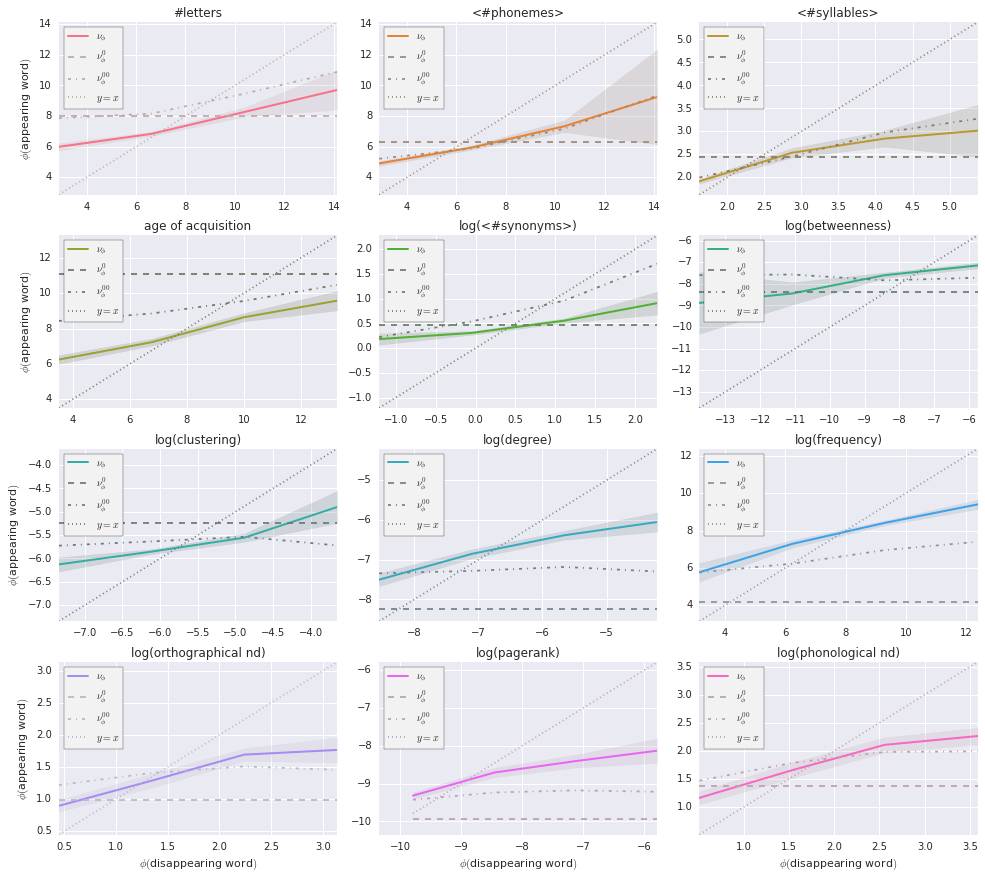

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

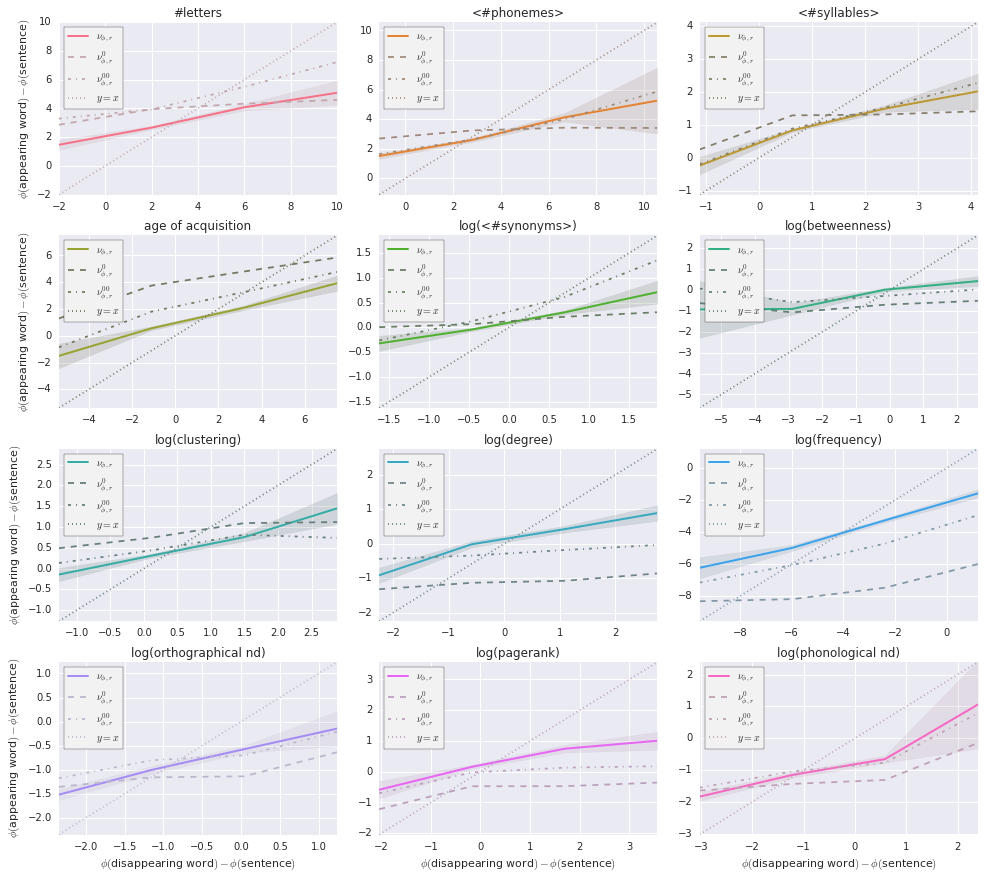

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

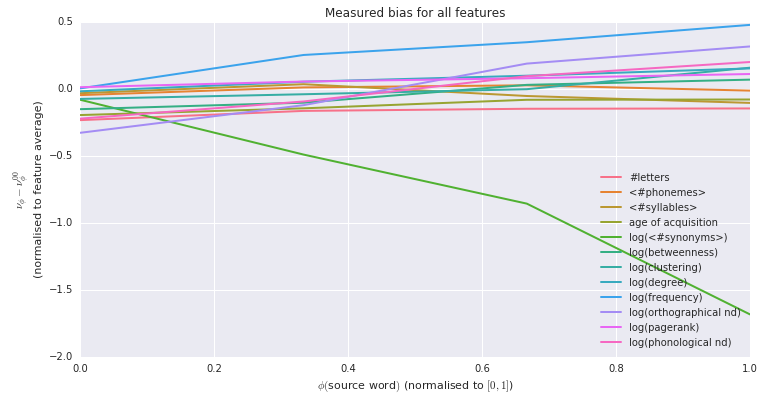

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

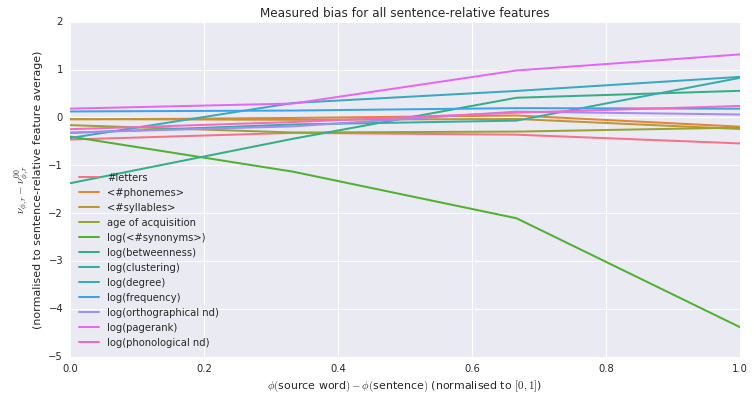

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

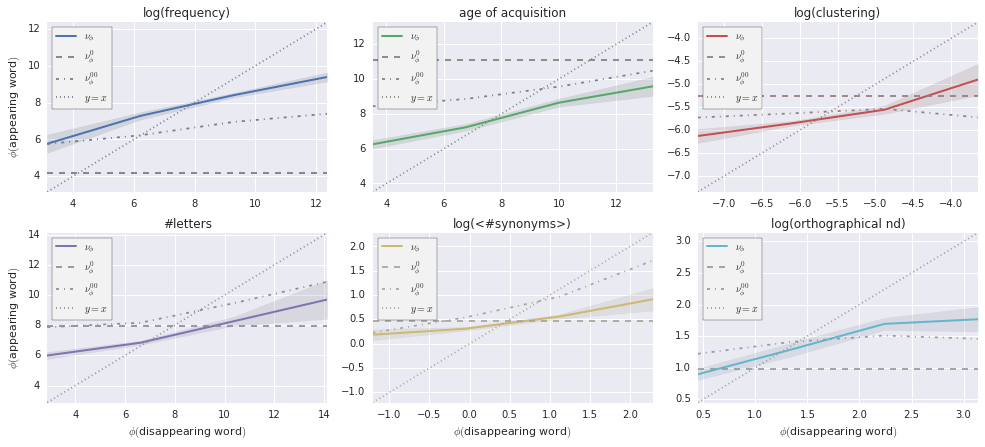

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

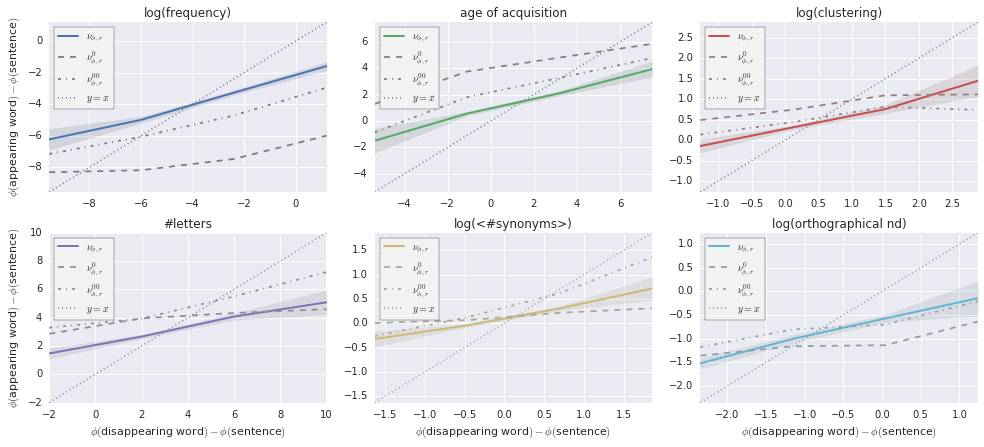

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

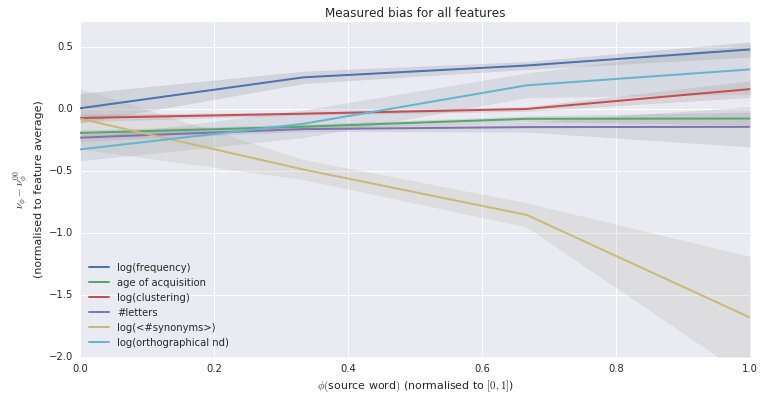

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

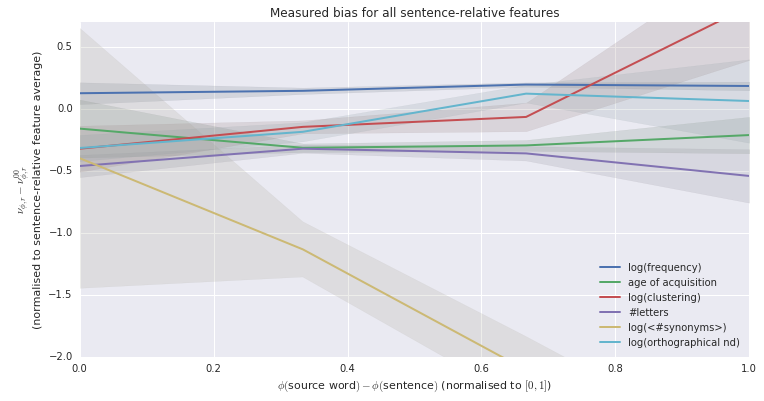

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


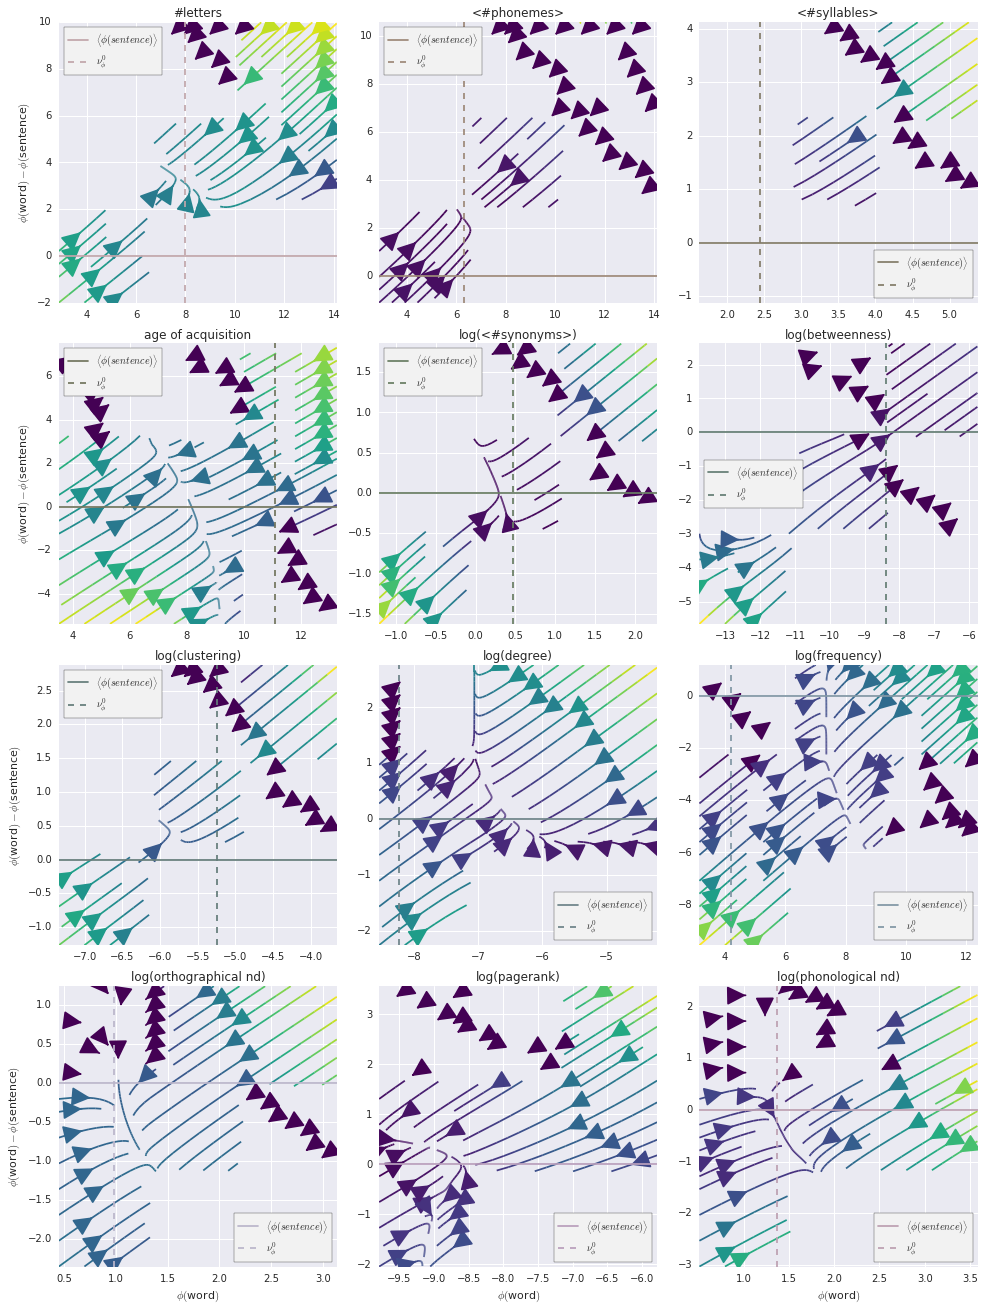

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


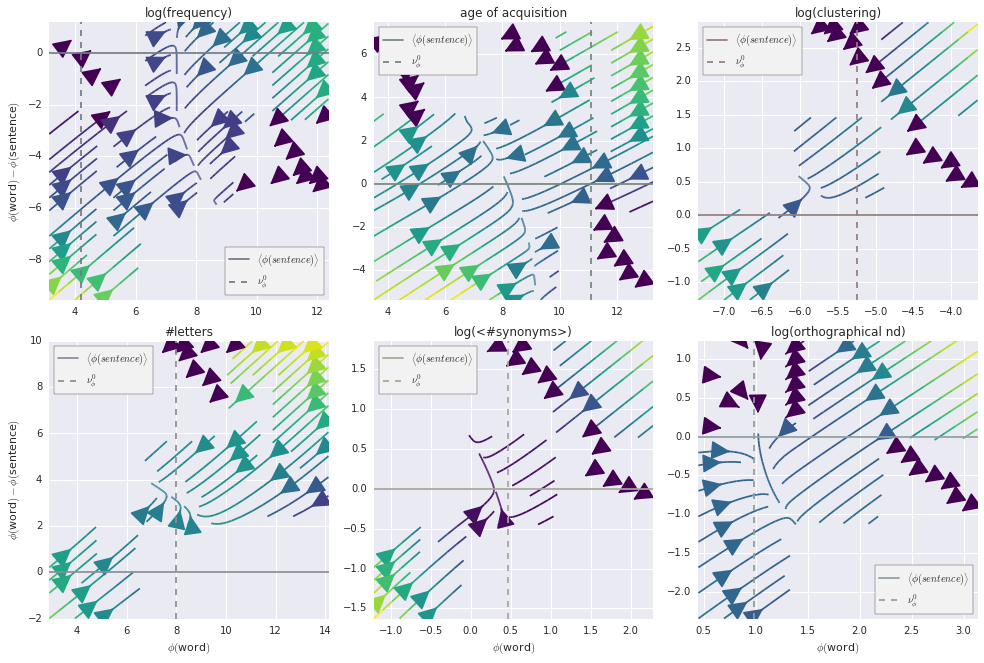

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.52249297  0.17584485  0.08740586  0.07198788  0.03433431  0.02976014
  0.02195916  0.01893649  0.01403977  0.01007515]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.479942,0.287349,-0.081596,0.248965,0.215588,-0.423089,0.208287,0.282616,-0.404264,0.278699,-0.169101,-0.003093
Component-1,-0.297574,0.412176,-0.135510,0.294778,0.267516,0.438942,-0.176408,0.286757,0.432023,-0.221346,0.151683,-0.008595
Component-2,0.740406,0.283615,-0.129143,0.086227,0.555507,-0.157776,-0.011621,0.058932,-0.050621,0.069707,-0.006207,-0.051951


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 71288) |           | Elapsed Time: 0:00:42 ETA:  35 days, 9:22:50

  0% (  115 of 71288) |                    | Elapsed Time: 0:00:43 ETA:  0:09:43

  0% (  230 of 71288) |                    | Elapsed Time: 0:00:44 ETA:  0:09:40

  0% (  342 of 71288) |                    | Elapsed Time: 0:00:45 ETA:  0:09:44

  0% (  454 of 71288) |                    | Elapsed Time: 0:00:46 ETA:  0:09:46

  0% (  577 of 71288) |                    | Elapsed Time: 0:00:47 ETA:  0:09:34

  0% (  704 of 71288) |                    | Elapsed Time: 0:00:48 ETA:  0:09:22

  1% (  831 of 71288) |                    | Elapsed Time: 0:00:49 ETA:  0:09:14

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:50 ETA:  0:09:09

  1% ( 1021 of 71288) |                    | Elapsed Time: 0:00:51 ETA:  0:09:02

  1% ( 1152 of 71288) |                    | Elapsed Time: 0:00:52 ETA:  0:08:51

  1% ( 1283 of 71288) |                    | Elapsed Time: 0:00:53 ETA:  0:08:41

  1% ( 1412 of 71288) |                    | Elapsed Time: 0:00:54 ETA:  0:08:31

  2% ( 1555 of 71288) |                    | Elapsed Time: 0:00:55 ETA:  0:08:13

  2% ( 1708 of 71288) |                    | Elapsed Time: 0:00:56 ETA:  0:07:58

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:57 ETA:  0:07:56

  2% ( 1936 of 71288) |                    | Elapsed Time: 0:00:58 ETA:  0:07:43

  2% ( 2002 of 71288) |                    | Elapsed Time: 0:00:59 ETA:  0:08:15

  2% ( 2067 of 71288) |                    | Elapsed Time: 0:01:00 ETA:  0:08:48

  2% ( 2135 of 71288) |                    | Elapsed Time: 0:01:01 ETA:  0:09:25

  3% ( 2208 of 71288) |                    | Elapsed Time: 0:01:02 ETA:  0:10:03

  3% ( 2277 of 71288) |                    | Elapsed Time: 0:01:03 ETA:  0:10:49

  3% ( 2346 of 71288) |                    | Elapsed Time: 0:01:04 ETA:  0:11:55

  3% ( 2415 of 71288) |                    | Elapsed Time: 0:01:05 ETA:  0:13:27

  3% ( 2485 of 71288) |                    | Elapsed Time: 0:01:06 ETA:  0:14:14

  3% ( 2555 of 71288) |                    | Elapsed Time: 0:01:07 ETA:  0:16:16

  3% ( 2630 of 71288) |                    | Elapsed Time: 0:01:08 ETA:  0:16:01

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:01:08 ETA:  0:15:27

  3% ( 2799 of 71288) |                    | Elapsed Time: 0:01:09 ETA:  0:14:00

  4% ( 2913 of 71288) |                    | Elapsed Time: 0:01:10 ETA:  0:13:07

  4% ( 3024 of 71288) |                    | Elapsed Time: 0:01:11 ETA:  0:12:17

  4% ( 3145 of 71288) |                    | Elapsed Time: 0:01:12 ETA:  0:11:23

  4% ( 3281 of 71288) |                    | Elapsed Time: 0:01:13 ETA:  0:10:23

  4% ( 3418 of 71288) |                    | Elapsed Time: 0:01:14 ETA:  0:09:32

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:01:15 ETA:  0:08:39

  5% ( 3735 of 71288) |#                   | Elapsed Time: 0:01:16 ETA:  0:07:47

  5% ( 3906 of 71288) |#                   | Elapsed Time: 0:01:17 ETA:  0:07:23

  5% ( 4079 of 71288) |#                   | Elapsed Time: 0:01:18 ETA:  0:07:03

  5% ( 4253 of 71288) |#                   | Elapsed Time: 0:01:19 ETA:  0:06:39

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:01:20 ETA:  0:06:02

  6% ( 4601 of 71288) |#                   | Elapsed Time: 0:01:21 ETA:  0:05:58

  6% ( 4745 of 71288) |#                   | Elapsed Time: 0:01:22 ETA:  0:05:54

  6% ( 4886 of 71288) |#                   | Elapsed Time: 0:01:23 ETA:  0:05:57

  7% ( 5024 of 71288) |#                   | Elapsed Time: 0:01:24 ETA:  0:06:07

  7% ( 5162 of 71288) |#                   | Elapsed Time: 0:01:25 ETA:  0:06:18

  7% ( 5274 of 71288) |#                   | Elapsed Time: 0:01:26 ETA:  0:06:41

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:01:27 ETA:  0:06:49

  7% ( 5477 of 71288) |#                   | Elapsed Time: 0:01:28 ETA:  0:07:10

  7% ( 5534 of 71288) |#                   | Elapsed Time: 0:01:29 ETA:  0:07:50

  7% ( 5646 of 71288) |#                   | Elapsed Time: 0:01:30 ETA:  0:08:08

  8% ( 5744 of 71288) |#                   | Elapsed Time: 0:01:31 ETA:  0:08:33

  8% ( 5926 of 71288) |#                   | Elapsed Time: 0:01:32 ETA:  0:08:08

  8% ( 6069 of 71288) |#                   | Elapsed Time: 0:01:33 ETA:  0:08:04

  8% ( 6187 of 71288) |#                   | Elapsed Time: 0:01:34 ETA:  0:08:14

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:34 ETA:  0:08:17

  8% ( 6337 of 71288) |#                   | Elapsed Time: 0:01:35 ETA:  0:08:41

  9% ( 6437 of 71288) |#                   | Elapsed Time: 0:01:36 ETA:  0:09:00

  9% ( 6535 of 71288) |#                   | Elapsed Time: 0:01:37 ETA:  0:08:33

  9% ( 6668 of 71288) |#                   | Elapsed Time: 0:01:38 ETA:  0:08:19

  9% ( 6814 of 71288) |#                   | Elapsed Time: 0:01:39 ETA:  0:07:51

  9% ( 6952 of 71288) |#                   | Elapsed Time: 0:01:40 ETA:  0:08:15

  9% ( 7086 of 71288) |#                   | Elapsed Time: 0:01:41 ETA:  0:08:19

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:42 ETA:  0:08:22

 10% ( 7233 of 71288) |##                  | Elapsed Time: 0:01:43 ETA:  0:08:22

 10% ( 7340 of 71288) |##                  | Elapsed Time: 0:01:44 ETA:  0:08:16

 10% ( 7442 of 71288) |##                  | Elapsed Time: 0:01:45 ETA:  0:08:13

 10% ( 7546 of 71288) |##                  | Elapsed Time: 0:01:46 ETA:  0:08:09

 10% ( 7655 of 71288) |##                  | Elapsed Time: 0:01:47 ETA:  0:08:22

 10% ( 7761 of 71288) |##                  | Elapsed Time: 0:01:48 ETA:  0:08:47

 11% ( 7867 of 71288) |##                  | Elapsed Time: 0:01:49 ETA:  0:09:08

 11% ( 7972 of 71288) |##                  | Elapsed Time: 0:01:50 ETA:  0:09:29

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:01:50 ETA:  0:09:28

 11% ( 8126 of 71288) |##                  | Elapsed Time: 0:01:51 ETA:  0:09:26

 11% ( 8231 of 71288) |##                  | Elapsed Time: 0:01:52 ETA:  0:09:26

 11% ( 8338 of 71288) |##                  | Elapsed Time: 0:01:53 ETA:  0:09:21

 11% ( 8443 of 71288) |##                  | Elapsed Time: 0:01:54 ETA:  0:09:20

 11% ( 8547 of 71288) |##                  | Elapsed Time: 0:01:55 ETA:  0:09:23

 12% ( 8651 of 71288) |##                  | Elapsed Time: 0:01:56 ETA:  0:09:23

 12% ( 8756 of 71288) |##                  | Elapsed Time: 0:01:57 ETA:  0:09:24

 12% ( 8863 of 71288) |##                  | Elapsed Time: 0:01:58 ETA:  0:09:21

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:01:59 ETA:  0:09:20

 12% ( 9035 of 71288) |##                  | Elapsed Time: 0:02:00 ETA:  0:09:06

 12% ( 9160 of 71288) |##                  | Elapsed Time: 0:02:01 ETA:  0:08:50

 13% ( 9282 of 71288) |##                  | Elapsed Time: 0:02:02 ETA:  0:08:39

 13% ( 9414 of 71288) |##                  | Elapsed Time: 0:02:03 ETA:  0:08:20

 13% ( 9543 of 71288) |##                  | Elapsed Time: 0:02:04 ETA:  0:08:03

 13% ( 9685 of 71288) |##                  | Elapsed Time: 0:02:05 ETA:  0:07:40

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:02:06 ETA:  0:07:25

 13% ( 9928 of 71288) |##                  | Elapsed Time: 0:02:07 ETA:  0:07:14

 14% (10050 of 71288) |##                  | Elapsed Time: 0:02:08 ETA:  0:07:11

 14% (10175 of 71288) |##                  | Elapsed Time: 0:02:09 ETA:  0:07:09

 14% (10319 of 71288) |##                  | Elapsed Time: 0:02:10 ETA:  0:06:59

 14% (10466 of 71288) |##                  | Elapsed Time: 0:02:11 ETA:  0:06:46

 14% (10613 of 71288) |##                  | Elapsed Time: 0:02:12 ETA:  0:06:38

 15% (10694 of 71288) |###                 | Elapsed Time: 0:02:12 ETA:  0:06:31

 15% (10846 of 71288) |###                 | Elapsed Time: 0:02:13 ETA:  0:06:25

 15% (10999 of 71288) |###                 | Elapsed Time: 0:02:14 ETA:  0:06:15

 15% (11151 of 71288) |###                 | Elapsed Time: 0:02:15 ETA:  0:06:02

 15% (11304 of 71288) |###                 | Elapsed Time: 0:02:16 ETA:  0:05:49

 16% (11432 of 71288) |###                 | Elapsed Time: 0:02:17 ETA:  0:05:47

 16% (11542 of 71288) |###                 | Elapsed Time: 0:02:18 ETA:  0:06:00

 16% (11585 of 71288) |###                 | Elapsed Time: 0:02:19 ETA:  0:06:06

 16% (11704 of 71288) |###                 | Elapsed Time: 0:02:20 ETA:  0:06:19

 16% (11809 of 71288) |###                 | Elapsed Time: 0:02:21 ETA:  0:06:36

 16% (11926 of 71288) |###                 | Elapsed Time: 0:02:22 ETA:  0:06:53

 16% (12043 of 71288) |###                 | Elapsed Time: 0:02:23 ETA:  0:07:11

 17% (12161 of 71288) |###                 | Elapsed Time: 0:02:24 ETA:  0:07:30

 17% (12270 of 71288) |###                 | Elapsed Time: 0:02:25 ETA:  0:07:56

 17% (12394 of 71288) |###                 | Elapsed Time: 0:02:26 ETA:  0:07:58

 17% (12476 of 71288) |###                 | Elapsed Time: 0:02:26 ETA:  0:07:49

 17% (12595 of 71288) |###                 | Elapsed Time: 0:02:27 ETA:  0:07:46

 17% (12720 of 71288) |###                 | Elapsed Time: 0:02:28 ETA:  0:07:41

 18% (12850 of 71288) |###                 | Elapsed Time: 0:02:29 ETA:  0:07:26

 18% (12974 of 71288) |###                 | Elapsed Time: 0:02:30 ETA:  0:07:20

 18% (13108 of 71288) |###                 | Elapsed Time: 0:02:31 ETA:  0:07:10

 18% (13238 of 71288) |###                 | Elapsed Time: 0:02:32 ETA:  0:07:02

 18% (13367 of 71288) |###                 | Elapsed Time: 0:02:33 ETA:  0:06:51

 18% (13475 of 71288) |###                 | Elapsed Time: 0:02:34 ETA:  0:07:00

 19% (13572 of 71288) |###                 | Elapsed Time: 0:02:35 ETA:  0:07:12

 19% (13686 of 71288) |###                 | Elapsed Time: 0:02:36 ETA:  0:07:17

 19% (13797 of 71288) |###                 | Elapsed Time: 0:02:37 ETA:  0:07:28

 19% (13862 of 71288) |###                 | Elapsed Time: 0:02:38 ETA:  0:08:08

 19% (13943 of 71288) |###                 | Elapsed Time: 0:02:39 ETA:  0:08:49

 19% (14028 of 71288) |###                 | Elapsed Time: 0:02:40 ETA:  0:09:28

 19% (14154 of 71288) |###                 | Elapsed Time: 0:02:41 ETA:  0:09:26

 20% (14258 of 71288) |####                | Elapsed Time: 0:02:42 ETA:  0:09:08

 20% (14383 of 71288) |####                | Elapsed Time: 0:02:43 ETA:  0:08:54

 20% (14508 of 71288) |####                | Elapsed Time: 0:02:44 ETA:  0:08:32

 20% (14633 of 71288) |####                | Elapsed Time: 0:02:45 ETA:  0:08:24

 20% (14734 of 71288) |####                | Elapsed Time: 0:02:46 ETA:  0:08:30

 20% (14888 of 71288) |####                | Elapsed Time: 0:02:47 ETA:  0:07:29

 21% (15039 of 71288) |####                | Elapsed Time: 0:02:48 ETA:  0:06:48

 21% (15149 of 71288) |####                | Elapsed Time: 0:02:49 ETA:  0:06:18

 21% (15295 of 71288) |####                | Elapsed Time: 0:02:50 ETA:  0:06:08

 21% (15456 of 71288) |####                | Elapsed Time: 0:02:51 ETA:  0:05:51

 21% (15620 of 71288) |####                | Elapsed Time: 0:02:52 ETA:  0:05:34

 22% (15736 of 71288) |####                | Elapsed Time: 0:02:53 ETA:  0:05:37

 22% (15836 of 71288) |####                | Elapsed Time: 0:02:54 ETA:  0:05:46

 22% (15935 of 71288) |####                | Elapsed Time: 0:02:55 ETA:  0:05:46

 22% (16040 of 71288) |####                | Elapsed Time: 0:02:56 ETA:  0:06:01

 22% (16186 of 71288) |####                | Elapsed Time: 0:02:57 ETA:  0:06:03

 22% (16330 of 71288) |####                | Elapsed Time: 0:02:58 ETA:  0:06:01

 23% (16473 of 71288) |####                | Elapsed Time: 0:02:59 ETA:  0:06:02

 23% (16611 of 71288) |####                | Elapsed Time: 0:03:00 ETA:  0:06:11

 23% (16761 of 71288) |####                | Elapsed Time: 0:03:01 ETA:  0:06:17

 23% (16931 of 71288) |####                | Elapsed Time: 0:03:02 ETA:  0:05:46

 23% (17054 of 71288) |####                | Elapsed Time: 0:03:03 ETA:  0:05:34

 24% (17171 of 71288) |####                | Elapsed Time: 0:03:04 ETA:  0:05:33

 24% (17336 of 71288) |####                | Elapsed Time: 0:03:05 ETA:  0:05:23

 24% (17494 of 71288) |####                | Elapsed Time: 0:03:06 ETA:  0:05:16

 24% (17654 of 71288) |####                | Elapsed Time: 0:03:07 ETA:  0:05:08

 25% (17823 of 71288) |#####               | Elapsed Time: 0:03:08 ETA:  0:04:59

 25% (17981 of 71288) |#####               | Elapsed Time: 0:03:09 ETA:  0:04:52

 25% (18091 of 71288) |#####               | Elapsed Time: 0:03:10 ETA:  0:05:06

 25% (18213 of 71288) |#####               | Elapsed Time: 0:03:11 ETA:  0:05:05

 25% (18332 of 71288) |#####               | Elapsed Time: 0:03:12 ETA:  0:05:03

 25% (18469 of 71288) |#####               | Elapsed Time: 0:03:13 ETA:  0:05:14

 26% (18634 of 71288) |#####               | Elapsed Time: 0:03:14 ETA:  0:05:10

 26% (18714 of 71288) |#####               | Elapsed Time: 0:03:15 ETA:  0:05:19

 26% (18848 of 71288) |#####               | Elapsed Time: 0:03:16 ETA:  0:05:31

 26% (18994 of 71288) |#####               | Elapsed Time: 0:03:17 ETA:  0:05:26

 26% (19155 of 71288) |#####               | Elapsed Time: 0:03:18 ETA:  0:05:23

 27% (19299 of 71288) |#####               | Elapsed Time: 0:03:19 ETA:  0:05:08

 27% (19464 of 71288) |#####               | Elapsed Time: 0:03:20 ETA:  0:04:49

 27% (19605 of 71288) |#####               | Elapsed Time: 0:03:21 ETA:  0:04:32

 27% (19771 of 71288) |#####               | Elapsed Time: 0:03:22 ETA:  0:04:20

 27% (19937 of 71288) |#####               | Elapsed Time: 0:03:23 ETA:  0:04:19

 28% (20098 of 71288) |#####               | Elapsed Time: 0:03:24 ETA:  0:04:13

 28% (20268 of 71288) |#####               | Elapsed Time: 0:03:25 ETA:  0:04:00

 28% (20436 of 71288) |#####               | Elapsed Time: 0:03:26 ETA:  0:03:52

 28% (20496 of 71288) |#####               | Elapsed Time: 0:03:26 ETA:  0:03:50

 28% (20667 of 71288) |#####               | Elapsed Time: 0:03:27 ETA:  0:03:41

 29% (20837 of 71288) |#####               | Elapsed Time: 0:03:28 ETA:  0:03:38

 29% (21007 of 71288) |#####               | Elapsed Time: 0:03:29 ETA:  0:03:36

 29% (21130 of 71288) |#####               | Elapsed Time: 0:03:30 ETA:  0:03:48

 29% (21259 of 71288) |#####               | Elapsed Time: 0:03:31 ETA:  0:04:00

 30% (21387 of 71288) |######              | Elapsed Time: 0:03:32 ETA:  0:04:19

 30% (21539 of 71288) |######              | Elapsed Time: 0:03:33 ETA:  0:04:25

 30% (21681 of 71288) |######              | Elapsed Time: 0:03:34 ETA:  0:04:30

 30% (21845 of 71288) |######              | Elapsed Time: 0:03:35 ETA:  0:04:32

 30% (21992 of 71288) |######              | Elapsed Time: 0:03:36 ETA:  0:04:40

 31% (22138 of 71288) |######              | Elapsed Time: 0:03:37 ETA:  0:04:50

 31% (22278 of 71288) |######              | Elapsed Time: 0:03:38 ETA:  0:04:46

 31% (22444 of 71288) |######              | Elapsed Time: 0:03:39 ETA:  0:04:25

 31% (22614 of 71288) |######              | Elapsed Time: 0:03:40 ETA:  0:04:15

 31% (22775 of 71288) |######              | Elapsed Time: 0:03:41 ETA:  0:04:11

 32% (22909 of 71288) |######              | Elapsed Time: 0:03:42 ETA:  0:04:13

 32% (23002 of 71288) |######              | Elapsed Time: 0:03:43 ETA:  0:04:41

 32% (23085 of 71288) |######              | Elapsed Time: 0:03:44 ETA:  0:05:10

 32% (23169 of 71288) |######              | Elapsed Time: 0:03:45 ETA:  0:05:15

 32% (23288 of 71288) |######              | Elapsed Time: 0:03:46 ETA:  0:05:13

 32% (23411 of 71288) |######              | Elapsed Time: 0:03:47 ETA:  0:05:17

 32% (23518 of 71288) |######              | Elapsed Time: 0:03:48 ETA:  0:05:46

 33% (23633 of 71288) |######              | Elapsed Time: 0:03:49 ETA:  0:06:16

 33% (23768 of 71288) |######              | Elapsed Time: 0:03:50 ETA:  0:06:30

 33% (23921 of 71288) |######              | Elapsed Time: 0:03:51 ETA:  0:06:17

 33% (24060 of 71288) |######              | Elapsed Time: 0:03:52 ETA:  0:05:43

 33% (24188 of 71288) |######              | Elapsed Time: 0:03:53 ETA:  0:05:19

 34% (24300 of 71288) |######              | Elapsed Time: 0:03:54 ETA:  0:05:28

 34% (24413 of 71288) |######              | Elapsed Time: 0:03:55 ETA:  0:05:30

 34% (24574 of 71288) |######              | Elapsed Time: 0:03:56 ETA:  0:05:10

 34% (24724 of 71288) |######              | Elapsed Time: 0:03:57 ETA:  0:04:50

 34% (24822 of 71288) |######              | Elapsed Time: 0:03:58 ETA:  0:04:57

 35% (24951 of 71288) |#######             | Elapsed Time: 0:03:59 ETA:  0:04:55

 35% (25016 of 71288) |#######             | Elapsed Time: 0:04:00 ETA:  0:05:37

 35% (25133 of 71288) |#######             | Elapsed Time: 0:04:01 ETA:  0:05:55

 35% (25277 of 71288) |#######             | Elapsed Time: 0:04:02 ETA:  0:05:44

 35% (25379 of 71288) |#######             | Elapsed Time: 0:04:03 ETA:  0:05:49

 35% (25496 of 71288) |#######             | Elapsed Time: 0:04:04 ETA:  0:05:46

 35% (25646 of 71288) |#######             | Elapsed Time: 0:04:05 ETA:  0:05:51

 36% (25802 of 71288) |#######             | Elapsed Time: 0:04:06 ETA:  0:05:47

 36% (25842 of 71288) |#######             | Elapsed Time: 0:04:06 ETA:  0:05:35

 36% (25985 of 71288) |#######             | Elapsed Time: 0:04:07 ETA:  0:05:31

 36% (26131 of 71288) |#######             | Elapsed Time: 0:04:08 ETA:  0:04:48

 36% (26279 of 71288) |#######             | Elapsed Time: 0:04:09 ETA:  0:04:32

 37% (26418 of 71288) |#######             | Elapsed Time: 0:04:10 ETA:  0:04:33

 37% (26535 of 71288) |#######             | Elapsed Time: 0:04:11 ETA:  0:04:25

 37% (26653 of 71288) |#######             | Elapsed Time: 0:04:12 ETA:  0:04:24

 37% (26734 of 71288) |#######             | Elapsed Time: 0:04:13 ETA:  0:04:35

 37% (26849 of 71288) |#######             | Elapsed Time: 0:04:14 ETA:  0:04:54

 37% (26985 of 71288) |#######             | Elapsed Time: 0:04:15 ETA:  0:04:47

 38% (27131 of 71288) |#######             | Elapsed Time: 0:04:16 ETA:  0:04:45

 38% (27272 of 71288) |#######             | Elapsed Time: 0:04:17 ETA:  0:04:46

 38% (27437 of 71288) |#######             | Elapsed Time: 0:04:18 ETA:  0:04:37

 38% (27536 of 71288) |#######             | Elapsed Time: 0:04:19 ETA:  0:04:56

 38% (27625 of 71288) |#######             | Elapsed Time: 0:04:20 ETA:  0:05:01

 38% (27761 of 71288) |#######             | Elapsed Time: 0:04:21 ETA:  0:04:52

 39% (27870 of 71288) |#######             | Elapsed Time: 0:04:22 ETA:  0:04:57

 39% (27994 of 71288) |#######             | Elapsed Time: 0:04:23 ETA:  0:04:51

 39% (28145 of 71288) |#######             | Elapsed Time: 0:04:24 ETA:  0:04:43

 39% (28308 of 71288) |#######             | Elapsed Time: 0:04:25 ETA:  0:04:35

 39% (28461 of 71288) |#######             | Elapsed Time: 0:04:26 ETA:  0:04:29

 40% (28516 of 71288) |########            | Elapsed Time: 0:04:26 ETA:  0:04:48

 40% (28649 of 71288) |########            | Elapsed Time: 0:04:27 ETA:  0:04:30

 40% (28778 of 71288) |########            | Elapsed Time: 0:04:28 ETA:  0:04:17

 40% (28901 of 71288) |########            | Elapsed Time: 0:04:29 ETA:  0:04:22

 40% (29029 of 71288) |########            | Elapsed Time: 0:04:30 ETA:  0:04:12

 40% (29157 of 71288) |########            | Elapsed Time: 0:04:31 ETA:  0:04:09

 41% (29304 of 71288) |########            | Elapsed Time: 0:04:32 ETA:  0:04:10

 41% (29407 of 71288) |########            | Elapsed Time: 0:04:33 ETA:  0:04:18

 41% (29547 of 71288) |########            | Elapsed Time: 0:04:34 ETA:  0:04:23

 41% (29695 of 71288) |########            | Elapsed Time: 0:04:35 ETA:  0:04:12

 41% (29832 of 71288) |########            | Elapsed Time: 0:04:36 ETA:  0:04:09

 42% (29957 of 71288) |########            | Elapsed Time: 0:04:37 ETA:  0:04:10

 42% (30097 of 71288) |########            | Elapsed Time: 0:04:38 ETA:  0:04:01

 42% (30245 of 71288) |########            | Elapsed Time: 0:04:39 ETA:  0:03:52

 42% (30298 of 71288) |########            | Elapsed Time: 0:04:39 ETA:  0:03:45

 42% (30414 of 71288) |########            | Elapsed Time: 0:04:40 ETA:  0:03:59

 42% (30530 of 71288) |########            | Elapsed Time: 0:04:41 ETA:  0:04:11

 43% (30671 of 71288) |########            | Elapsed Time: 0:04:42 ETA:  0:04:09

 43% (30821 of 71288) |########            | Elapsed Time: 0:04:43 ETA:  0:04:08

 43% (30937 of 71288) |########            | Elapsed Time: 0:04:44 ETA:  0:04:17

 43% (31069 of 71288) |########            | Elapsed Time: 0:04:45 ETA:  0:04:13

 43% (31189 of 71288) |########            | Elapsed Time: 0:04:46 ETA:  0:04:17

 43% (31317 of 71288) |########            | Elapsed Time: 0:04:47 ETA:  0:04:26

 44% (31468 of 71288) |########            | Elapsed Time: 0:04:48 ETA:  0:04:18

 44% (31624 of 71288) |########            | Elapsed Time: 0:04:49 ETA:  0:03:58

 44% (31732 of 71288) |########            | Elapsed Time: 0:04:50 ETA:  0:04:01

 44% (31863 of 71288) |########            | Elapsed Time: 0:04:51 ETA:  0:04:05

 44% (31998 of 71288) |########            | Elapsed Time: 0:04:52 ETA:  0:04:10

 45% (32080 of 71288) |#########           | Elapsed Time: 0:04:53 ETA:  0:04:06

 45% (32213 of 71288) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:04

 45% (32347 of 71288) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:01

 45% (32451 of 71288) |#########           | Elapsed Time: 0:04:56 ETA:  0:04:11

 45% (32569 of 71288) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:27

 45% (32689 of 71288) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:45

 46% (32819 of 71288) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:32

 46% (32971 of 71288) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:34

 46% (33125 of 71288) |#########           | Elapsed Time: 0:05:01 ETA:  0:04:15

 46% (33253 of 71288) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:16

 46% (33354 of 71288) |#########           | Elapsed Time: 0:05:03 ETA:  0:04:33

 47% (33512 of 71288) |#########           | Elapsed Time: 0:05:04 ETA:  0:04:03

 47% (33639 of 71288) |#########           | Elapsed Time: 0:05:05 ETA:  0:03:57

 47% (33767 of 71288) |#########           | Elapsed Time: 0:05:06 ETA:  0:03:52

 47% (33862 of 71288) |#########           | Elapsed Time: 0:05:07 ETA:  0:03:52

 47% (34016 of 71288) |#########           | Elapsed Time: 0:05:08 ETA:  0:03:41

 47% (34161 of 71288) |#########           | Elapsed Time: 0:05:09 ETA:  0:03:36

 48% (34322 of 71288) |#########           | Elapsed Time: 0:05:10 ETA:  0:03:32

 48% (34479 of 71288) |#########           | Elapsed Time: 0:05:11 ETA:  0:03:18

 48% (34617 of 71288) |#########           | Elapsed Time: 0:05:12 ETA:  0:03:02

 48% (34734 of 71288) |#########           | Elapsed Time: 0:05:13 ETA:  0:03:18

 48% (34753 of 71288) |#########           | Elapsed Time: 0:05:13 ETA:  0:03:16

 48% (34847 of 71288) |#########           | Elapsed Time: 0:05:14 ETA:  0:03:31

 49% (34989 of 71288) |#########           | Elapsed Time: 0:05:15 ETA:  0:03:24

 49% (35135 of 71288) |#########           | Elapsed Time: 0:05:16 ETA:  0:03:27

 49% (35291 of 71288) |#########           | Elapsed Time: 0:05:17 ETA:  0:03:21

 49% (35453 of 71288) |#########           | Elapsed Time: 0:05:18 ETA:  0:03:20

 49% (35606 of 71288) |#########           | Elapsed Time: 0:05:19 ETA:  0:03:21

 50% (35645 of 71288) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:22

 50% (35797 of 71288) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:04

 50% (35879 of 71288) |##########          | Elapsed Time: 0:05:22 ETA:  0:03:25

 50% (35980 of 71288) |##########          | Elapsed Time: 0:05:23 ETA:  0:03:21

 50% (36101 of 71288) |##########          | Elapsed Time: 0:05:24 ETA:  0:03:29

 50% (36221 of 71288) |##########          | Elapsed Time: 0:05:25 ETA:  0:03:41

 50% (36342 of 71288) |##########          | Elapsed Time: 0:05:26 ETA:  0:03:58

 51% (36473 of 71288) |##########          | Elapsed Time: 0:05:27 ETA:  0:04:14

 51% (36536 of 71288) |##########          | Elapsed Time: 0:05:27 ETA:  0:04:29

 51% (36665 of 71288) |##########          | Elapsed Time: 0:05:28 ETA:  0:04:25

 51% (36808 of 71288) |##########          | Elapsed Time: 0:05:29 ETA:  0:04:29

 51% (36968 of 71288) |##########          | Elapsed Time: 0:05:30 ETA:  0:03:45

 52% (37133 of 71288) |##########          | Elapsed Time: 0:05:31 ETA:  0:03:13

 52% (37258 of 71288) |##########          | Elapsed Time: 0:05:32 ETA:  0:03:11

 52% (37377 of 71288) |##########          | Elapsed Time: 0:05:33 ETA:  0:03:11

 52% (37427 of 71288) |##########          | Elapsed Time: 0:05:34 ETA:  0:03:06

 52% (37549 of 71288) |##########          | Elapsed Time: 0:05:35 ETA:  0:03:10

 52% (37696 of 71288) |##########          | Elapsed Time: 0:05:36 ETA:  0:03:03

 53% (37844 of 71288) |##########          | Elapsed Time: 0:05:37 ETA:  0:02:54

 53% (37972 of 71288) |##########          | Elapsed Time: 0:05:38 ETA:  0:03:00

 53% (38116 of 71288) |##########          | Elapsed Time: 0:05:39 ETA:  0:03:06

 53% (38270 of 71288) |##########          | Elapsed Time: 0:05:40 ETA:  0:03:10

 53% (38318 of 71288) |##########          | Elapsed Time: 0:05:40 ETA:  0:03:07

 53% (38459 of 71288) |##########          | Elapsed Time: 0:05:41 ETA:  0:02:55

 54% (38614 of 71288) |##########          | Elapsed Time: 0:05:42 ETA:  0:02:43

 54% (38750 of 71288) |##########          | Elapsed Time: 0:05:43 ETA:  0:02:37

 54% (38890 of 71288) |##########          | Elapsed Time: 0:05:44 ETA:  0:02:38

 54% (39056 of 71288) |##########          | Elapsed Time: 0:05:45 ETA:  0:02:30

 55% (39209 of 71288) |###########         | Elapsed Time: 0:05:46 ETA:  0:02:24

 55% (39375 of 71288) |###########         | Elapsed Time: 0:05:47 ETA:  0:02:17

 55% (39520 of 71288) |###########         | Elapsed Time: 0:05:48 ETA:  0:02:14

 55% (39664 of 71288) |###########         | Elapsed Time: 0:05:49 ETA:  0:02:12

 55% (39791 of 71288) |###########         | Elapsed Time: 0:05:50 ETA:  0:02:22

 55% (39918 of 71288) |###########         | Elapsed Time: 0:05:51 ETA:  0:02:25

 56% (40055 of 71288) |###########         | Elapsed Time: 0:05:52 ETA:  0:02:25

 56% (40100 of 71288) |###########         | Elapsed Time: 0:05:53 ETA:  0:02:50

 56% (40264 of 71288) |###########         | Elapsed Time: 0:05:54 ETA:  0:02:35

 56% (40391 of 71288) |###########         | Elapsed Time: 0:05:55 ETA:  0:02:41

 56% (40566 of 71288) |###########         | Elapsed Time: 0:05:56 ETA:  0:02:36

 57% (40730 of 71288) |###########         | Elapsed Time: 0:05:57 ETA:  0:02:27

 57% (40874 of 71288) |###########         | Elapsed Time: 0:05:58 ETA:  0:02:27

 57% (40991 of 71288) |###########         | Elapsed Time: 0:05:59 ETA:  0:02:25

 57% (41142 of 71288) |###########         | Elapsed Time: 0:06:00 ETA:  0:02:14

 57% (41299 of 71288) |###########         | Elapsed Time: 0:06:01 ETA:  0:02:05

 58% (41455 of 71288) |###########         | Elapsed Time: 0:06:02 ETA:  0:01:49

 58% (41605 of 71288) |###########         | Elapsed Time: 0:06:03 ETA:  0:01:53

 58% (41752 of 71288) |###########         | Elapsed Time: 0:06:04 ETA:  0:01:45

 58% (41882 of 71288) |###########         | Elapsed Time: 0:06:05 ETA:  0:01:59

 58% (42033 of 71288) |###########         | Elapsed Time: 0:06:06 ETA:  0:02:02

 59% (42157 of 71288) |###########         | Elapsed Time: 0:06:07 ETA:  0:02:08

 59% (42300 of 71288) |###########         | Elapsed Time: 0:06:08 ETA:  0:02:02

 59% (42453 of 71288) |###########         | Elapsed Time: 0:06:09 ETA:  0:02:00

 59% (42612 of 71288) |###########         | Elapsed Time: 0:06:10 ETA:  0:01:58

 60% (42773 of 71288) |############        | Elapsed Time: 0:06:11 ETA:  0:02:00

 60% (42936 of 71288) |############        | Elapsed Time: 0:06:12 ETA:  0:01:53

 60% (43068 of 71288) |############        | Elapsed Time: 0:06:13 ETA:  0:01:53

 60% (43167 of 71288) |############        | Elapsed Time: 0:06:14 ETA:  0:02:14

 60% (43250 of 71288) |############        | Elapsed Time: 0:06:15 ETA:  0:02:32

 60% (43331 of 71288) |############        | Elapsed Time: 0:06:16 ETA:  0:03:03

 60% (43414 of 71288) |############        | Elapsed Time: 0:06:17 ETA:  0:03:43

 61% (43533 of 71288) |############        | Elapsed Time: 0:06:18 ETA:  0:04:08

 61% (43664 of 71288) |############        | Elapsed Time: 0:06:19 ETA:  0:04:29

 61% (43792 of 71288) |############        | Elapsed Time: 0:06:20 ETA:  0:04:54

 61% (43913 of 71288) |############        | Elapsed Time: 0:06:21 ETA:  0:05:02

 61% (44013 of 71288) |############        | Elapsed Time: 0:06:22 ETA:  0:05:00

 61% (44152 of 71288) |############        | Elapsed Time: 0:06:23 ETA:  0:04:17

 62% (44301 of 71288) |############        | Elapsed Time: 0:06:24 ETA:  0:03:32

 62% (44442 of 71288) |############        | Elapsed Time: 0:06:25 ETA:  0:02:57

 62% (44556 of 71288) |############        | Elapsed Time: 0:06:25 ETA:  0:02:35

 62% (44643 of 71288) |############        | Elapsed Time: 0:06:26 ETA:  0:02:54

 62% (44735 of 71288) |############        | Elapsed Time: 0:06:27 ETA:  0:03:10

 62% (44875 of 71288) |############        | Elapsed Time: 0:06:28 ETA:  0:03:03

 63% (45015 of 71288) |############        | Elapsed Time: 0:06:29 ETA:  0:02:52

 63% (45169 of 71288) |############        | Elapsed Time: 0:06:30 ETA:  0:02:25

 63% (45284 of 71288) |############        | Elapsed Time: 0:06:31 ETA:  0:02:35

 63% (45396 of 71288) |############        | Elapsed Time: 0:06:33 ETA:  0:02:53

 63% (45447 of 71288) |############        | Elapsed Time: 0:06:33 ETA:  0:03:01

 63% (45586 of 71288) |############        | Elapsed Time: 0:06:34 ETA:  0:03:10

 64% (45712 of 71288) |############        | Elapsed Time: 0:06:35 ETA:  0:02:47

 64% (45847 of 71288) |############        | Elapsed Time: 0:06:36 ETA:  0:02:24

 64% (45998 of 71288) |############        | Elapsed Time: 0:06:37 ETA:  0:02:18

 64% (46160 of 71288) |############        | Elapsed Time: 0:06:38 ETA:  0:02:06

 65% (46338 of 71288) |#############       | Elapsed Time: 0:06:39 ETA:  0:01:52

 65% (46487 of 71288) |#############       | Elapsed Time: 0:06:40 ETA:  0:01:33

 65% (46631 of 71288) |#############       | Elapsed Time: 0:06:41 ETA:  0:01:29

 65% (46747 of 71288) |#############       | Elapsed Time: 0:06:42 ETA:  0:01:38

 65% (46897 of 71288) |#############       | Elapsed Time: 0:06:43 ETA:  0:01:27

 65% (47032 of 71288) |#############       | Elapsed Time: 0:06:44 ETA:  0:01:26

 66% (47164 of 71288) |#############       | Elapsed Time: 0:06:45 ETA:  0:01:34

 66% (47229 of 71288) |#############       | Elapsed Time: 0:06:46 ETA:  0:01:50

 66% (47371 of 71288) |#############       | Elapsed Time: 0:06:47 ETA:  0:01:57

 66% (47544 of 71288) |#############       | Elapsed Time: 0:06:48 ETA:  0:01:41

 66% (47662 of 71288) |#############       | Elapsed Time: 0:06:49 ETA:  0:01:54

 67% (47764 of 71288) |#############       | Elapsed Time: 0:06:50 ETA:  0:02:13

 67% (47914 of 71288) |#############       | Elapsed Time: 0:06:51 ETA:  0:01:56

 67% (48070 of 71288) |#############       | Elapsed Time: 0:06:52 ETA:  0:01:52

 67% (48120 of 71288) |#############       | Elapsed Time: 0:06:52 ETA:  0:01:48

 67% (48283 of 71288) |#############       | Elapsed Time: 0:06:53 ETA:  0:01:32

 67% (48408 of 71288) |#############       | Elapsed Time: 0:06:54 ETA:  0:01:31

 68% (48546 of 71288) |#############       | Elapsed Time: 0:06:55 ETA:  0:01:32

 68% (48696 of 71288) |#############       | Elapsed Time: 0:06:56 ETA:  0:01:41

 68% (48826 of 71288) |#############       | Elapsed Time: 0:06:57 ETA:  0:01:34

 68% (48952 of 71288) |#############       | Elapsed Time: 0:06:58 ETA:  0:01:22

 68% (49011 of 71288) |#############       | Elapsed Time: 0:06:59 ETA:  0:01:29

 68% (49132 of 71288) |#############       | Elapsed Time: 0:07:00 ETA:  0:01:45

 69% (49271 of 71288) |#############       | Elapsed Time: 0:07:01 ETA:  0:01:46

 69% (49429 of 71288) |#############       | Elapsed Time: 0:07:02 ETA:  0:01:47

 69% (49576 of 71288) |#############       | Elapsed Time: 0:07:03 ETA:  0:01:36

 69% (49705 of 71288) |#############       | Elapsed Time: 0:07:04 ETA:  0:01:40

 69% (49819 of 71288) |#############       | Elapsed Time: 0:07:05 ETA:  0:01:55

 70% (49902 of 71288) |##############      | Elapsed Time: 0:07:05 ETA:  0:01:47

 70% (50038 of 71288) |##############      | Elapsed Time: 0:07:06 ETA:  0:01:41

 70% (50176 of 71288) |##############      | Elapsed Time: 0:07:07 ETA:  0:01:36

 70% (50322 of 71288) |##############      | Elapsed Time: 0:07:08 ETA:  0:01:24

 70% (50439 of 71288) |##############      | Elapsed Time: 0:07:09 ETA:  0:01:33

 70% (50564 of 71288) |##############      | Elapsed Time: 0:07:10 ETA:  0:01:47

 71% (50736 of 71288) |##############      | Elapsed Time: 0:07:11 ETA:  0:01:35

 71% (50793 of 71288) |##############      | Elapsed Time: 0:07:12 ETA:  0:01:36

 71% (50917 of 71288) |##############      | Elapsed Time: 0:07:13 ETA:  0:01:31

 71% (51054 of 71288) |##############      | Elapsed Time: 0:07:14 ETA:  0:01:35

 71% (51194 of 71288) |##############      | Elapsed Time: 0:07:15 ETA:  0:01:32

 72% (51349 of 71288) |##############      | Elapsed Time: 0:07:16 ETA:  0:01:23

 72% (51495 of 71288) |##############      | Elapsed Time: 0:07:17 ETA:  0:01:22

 72% (51626 of 71288) |##############      | Elapsed Time: 0:07:18 ETA:  0:01:15

 72% (51684 of 71288) |##############      | Elapsed Time: 0:07:18 ETA:  0:01:08

 72% (51839 of 71288) |##############      | Elapsed Time: 0:07:19 ETA:  0:01:15

 72% (51969 of 71288) |##############      | Elapsed Time: 0:07:20 ETA:  0:01:12

 73% (52109 of 71288) |##############      | Elapsed Time: 0:07:21 ETA:  0:01:04

 73% (52253 of 71288) |##############      | Elapsed Time: 0:07:22 ETA:  0:01:00

 73% (52407 of 71288) |##############      | Elapsed Time: 0:07:23 ETA:  0:00:53

 73% (52575 of 71288) |##############      | Elapsed Time: 0:07:24 ETA:  0:00:50

 73% (52684 of 71288) |##############      | Elapsed Time: 0:07:25 ETA:  0:00:59

 74% (52781 of 71288) |##############      | Elapsed Time: 0:07:26 ETA:  0:01:17

 74% (52942 of 71288) |##############      | Elapsed Time: 0:07:27 ETA:  0:01:13

 74% (53084 of 71288) |##############      | Elapsed Time: 0:07:28 ETA:  0:01:07

 74% (53250 of 71288) |##############      | Elapsed Time: 0:07:29 ETA:  0:00:54

 74% (53388 of 71288) |##############      | Elapsed Time: 0:07:30 ETA:  0:00:55

 75% (53467 of 71288) |###############     | Elapsed Time: 0:07:31 ETA:  0:01:11

 75% (53552 of 71288) |###############     | Elapsed Time: 0:07:32 ETA:  0:01:51

 75% (53723 of 71288) |###############     | Elapsed Time: 0:07:33 ETA:  0:01:29

 75% (53880 of 71288) |###############     | Elapsed Time: 0:07:34 ETA:  0:01:06

 75% (54028 of 71288) |###############     | Elapsed Time: 0:07:35 ETA:  0:00:44

 75% (54175 of 71288) |###############     | Elapsed Time: 0:07:36 ETA:  0:00:49

 76% (54304 of 71288) |###############     | Elapsed Time: 0:07:37 ETA:  0:00:53

 76% (54358 of 71288) |###############     | Elapsed Time: 0:07:37 ETA:  0:01:05

 76% (54496 of 71288) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:04

 76% (54628 of 71288) |###############     | Elapsed Time: 0:07:39 ETA:  0:00:58

 76% (54744 of 71288) |###############     | Elapsed Time: 0:07:40 ETA:  0:00:43

 77% (54903 of 71288) |###############     | Elapsed Time: 0:07:41 ETA:  0:00:47

 77% (55037 of 71288) |###############     | Elapsed Time: 0:07:42 ETA:  0:00:57

 77% (55144 of 71288) |###############     | Elapsed Time: 0:07:43 ETA:  0:01:14

 77% (55249 of 71288) |###############     | Elapsed Time: 0:07:44 ETA:  0:01:15

 77% (55361 of 71288) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:23

 77% (55472 of 71288) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:32

 78% (55618 of 71288) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:28

 78% (55785 of 71288) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:10

 78% (55922 of 71288) |###############     | Elapsed Time: 0:07:49 ETA:  0:00:59

 78% (56068 of 71288) |###############     | Elapsed Time: 0:07:50 ETA:  0:01:04

 78% (56140 of 71288) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:03

 78% (56297 of 71288) |###############     | Elapsed Time: 0:07:52 ETA:  0:00:39

 79% (56447 of 71288) |###############     | Elapsed Time: 0:07:53 ETA:  0:00:36

 79% (56502 of 71288) |###############     | Elapsed Time: 0:07:54 ETA:  0:01:00

 79% (56653 of 71288) |###############     | Elapsed Time: 0:07:55 ETA:  0:00:41

 79% (56754 of 71288) |###############     | Elapsed Time: 0:07:56 ETA:  0:01:00

 79% (56874 of 71288) |###############     | Elapsed Time: 0:07:57 ETA:  0:01:23

 79% (56994 of 71288) |###############     | Elapsed Time: 0:07:58 ETA:  0:01:31

 80% (57031 of 71288) |################    | Elapsed Time: 0:07:58 ETA:  0:01:39

 80% (57154 of 71288) |################    | Elapsed Time: 0:07:59 ETA:  0:01:42

 80% (57284 of 71288) |################    | Elapsed Time: 0:08:00 ETA:  0:01:57

 80% (57436 of 71288) |################    | Elapsed Time: 0:08:01 ETA:  0:01:55

 80% (57572 of 71288) |################    | Elapsed Time: 0:08:02 ETA:  0:01:09

 80% (57717 of 71288) |################    | Elapsed Time: 0:08:03 ETA:  0:01:11

 81% (57878 of 71288) |################    | Elapsed Time: 0:08:04 ETA:  0:00:40

 81% (57922 of 71288) |################    | Elapsed Time: 0:08:04 ETA:  0:00:33

 81% (58056 of 71288) |################    | Elapsed Time: 0:08:05 ETA:  0:00:26

 81% (58185 of 71288) |################    | Elapsed Time: 0:08:06 ETA:  0:00:31

 81% (58342 of 71288) |################    | Elapsed Time: 0:08:07 ETA:  0:00:15

 82% (58472 of 71288) |################    | Elapsed Time: 0:08:08 ETA:  0:00:14

 82% (58633 of 71288) |################    | Elapsed Time: 0:08:09 ETA:  0:00:09

 82% (58779 of 71288) |################    | Elapsed Time: 0:08:10 ETA:  0:00:04

 82% (58813 of 71288) |################    | Elapsed Time: 0:08:11 ETA:  0:00:04

 82% (58956 of 71288) |################    | Elapsed Time: 0:08:12 ETA:  0:00:12

 82% (59107 of 71288) |################    | Elapsed Time: 0:08:13 ETA:  0:00:04

 83% (59236 of 71288) |################    | Elapsed Time: 0:08:14 ETA:  0:00:05

 83% (59379 of 71288) |################    | Elapsed Time: 0:08:15 ETA:  0:00:00

 83% (59524 of 71288) |################    | Elapsed Time: 0:08:16 ETA:  0:00:02

 83% (59656 of 71288) |################    | Elapsed Time: 0:08:17 ETA:  0:00:00

 83% (59704 of 71288) |################    | Elapsed Time: 0:08:17 ETA:  0:00:05

 83% (59854 of 71288) |################    | Elapsed Time: 0:08:18 ETA:  0:00:03

 84% (59998 of 71288) |################    | Elapsed Time: 0:08:19 ETA:  0:00:01

 84% (60131 of 71288) |################    | Elapsed Time: 0:08:20 ETA:  0:00:04

 84% (60277 of 71288) |################    | Elapsed Time: 0:08:21 ETA:  0:00:06

 84% (60409 of 71288) |################    | Elapsed Time: 0:08:22 ETA:  0:00:03

 84% (60549 of 71288) |################    | Elapsed Time: 0:08:23 ETA:  0:00:03

 85% (60595 of 71288) |#################   | Elapsed Time: 0:08:23 ETA:  0:00:07

 85% (60708 of 71288) |#################   | Elapsed Time: 0:08:24 ETA:  0:00:16

 85% (60850 of 71288) |#################   | Elapsed Time: 0:08:25 ETA:  0:00:16

 85% (60984 of 71288) |#################   | Elapsed Time: 0:08:26 ETA:  0:00:22

 85% (61123 of 71288) |#################   | Elapsed Time: 0:08:27 ETA:  0:00:23

 85% (61274 of 71288) |#################   | Elapsed Time: 0:08:28 ETA:  0:00:14

 86% (61389 of 71288) |#################   | Elapsed Time: 0:08:29 ETA:  0:00:28

 86% (61486 of 71288) |#################   | Elapsed Time: 0:08:30 ETA:  0:00:28

 86% (61624 of 71288) |#################   | Elapsed Time: 0:08:31 ETA:  0:00:29

 86% (61755 of 71288) |#################   | Elapsed Time: 0:08:32 ETA:  0:00:28

 86% (61902 of 71288) |#################   | Elapsed Time: 0:08:33 ETA:  0:00:11

 87% (62044 of 71288) |#################   | Elapsed Time: 0:08:34 ETA:  0:00:10

 87% (62199 of 71288) |#################   | Elapsed Time: 0:08:35 ETA:  0:00:00

 87% (62346 of 71288) |#################   | Elapsed Time: 0:08:36 ETA:  0:00:00

 87% (62378 of 71288) |#################   | Elapsed Time: 0:08:36 ETA:  0:00:00

 87% (62508 of 71288) |#################   | Elapsed Time: 0:08:37 ETA:  0:00:00

 87% (62650 of 71288) |#################   | Elapsed Time: 0:08:38 ETA:  0:00:00

 88% (62782 of 71288) |#################   | Elapsed Time: 0:08:39 ETA:  0:00:00

 88% (62898 of 71288) |#################   | Elapsed Time: 0:08:40 ETA:  0:00:00

 88% (63058 of 71288) |#################   | Elapsed Time: 0:08:41 ETA:  0:00:00

 88% (63204 of 71288) |#################   | Elapsed Time: 0:08:42 ETA:  0:00:00

 88% (63269 of 71288) |#################   | Elapsed Time: 0:08:43 ETA:  0:00:00

 88% (63431 of 71288) |#################   | Elapsed Time: 0:08:44 ETA:  0:00:00

 89% (63569 of 71288) |#################   | Elapsed Time: 0:08:45 ETA:  0:00:00

 89% (63704 of 71288) |#################   | Elapsed Time: 0:08:46 ETA:  0:00:00

 89% (63866 of 71288) |#################   | Elapsed Time: 0:08:47 ETA:  0:00:00

 89% (64004 of 71288) |#################   | Elapsed Time: 0:08:48 ETA:  0:00:00

 90% (64160 of 71288) |##################  | Elapsed Time: 0:08:49 ETA:  0:00:00

 90% (64285 of 71288) |##################  | Elapsed Time: 0:08:50 ETA:  0:00:00

 90% (64416 of 71288) |##################  | Elapsed Time: 0:08:51 ETA:  0:00:00

 90% (64547 of 71288) |##################  | Elapsed Time: 0:08:52 ETA:  0:00:00

 90% (64702 of 71288) |##################  | Elapsed Time: 0:08:53 ETA:  0:00:00

 90% (64825 of 71288) |##################  | Elapsed Time: 0:08:54 ETA:  0:00:00

 91% (64952 of 71288) |##################  | Elapsed Time: 0:08:55 ETA:  0:00:00

 91% (65051 of 71288) |##################  | Elapsed Time: 0:08:56 ETA:  0:00:00

 91% (65190 of 71288) |##################  | Elapsed Time: 0:08:57 ETA:  0:00:00

 91% (65326 of 71288) |##################  | Elapsed Time: 0:08:58 ETA:  0:00:00

 91% (65475 of 71288) |##################  | Elapsed Time: 0:08:59 ETA:  0:00:00

 92% (65600 of 71288) |##################  | Elapsed Time: 0:09:00 ETA:  0:00:00

 92% (65744 of 71288) |##################  | Elapsed Time: 0:09:01 ETA:  0:00:00

 92% (65886 of 71288) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:00

 92% (65942 of 71288) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:00

 92% (66083 of 71288) |##################  | Elapsed Time: 0:09:03 ETA:  0:00:00

 92% (66240 of 71288) |##################  | Elapsed Time: 0:09:04 ETA:  0:00:00

 93% (66391 of 71288) |##################  | Elapsed Time: 0:09:05 ETA:  0:00:00

 93% (66510 of 71288) |##################  | Elapsed Time: 0:09:06 ETA:  0:00:00

 93% (66656 of 71288) |##################  | Elapsed Time: 0:09:07 ETA:  0:00:00

 93% (66801 of 71288) |##################  | Elapsed Time: 0:09:08 ETA:  0:00:00

 93% (66833 of 71288) |##################  | Elapsed Time: 0:09:08 ETA:  0:00:00

 93% (66976 of 71288) |##################  | Elapsed Time: 0:09:09 ETA:  0:00:00

 94% (67127 of 71288) |##################  | Elapsed Time: 0:09:10 ETA:  0:00:00

 94% (67271 of 71288) |##################  | Elapsed Time: 0:09:11 ETA:  0:00:00

 94% (67416 of 71288) |##################  | Elapsed Time: 0:09:12 ETA:  0:00:00

 94% (67555 of 71288) |##################  | Elapsed Time: 0:09:13 ETA:  0:00:00

 94% (67685 of 71288) |##################  | Elapsed Time: 0:09:14 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:09:15 ETA:  0:00:00

 95% (67867 of 71288) |################### | Elapsed Time: 0:09:16 ETA:  0:00:00

 95% (68011 of 71288) |################### | Elapsed Time: 0:09:17 ETA:  0:00:00

 95% (68140 of 71288) |################### | Elapsed Time: 0:09:18 ETA:  0:00:00

 95% (68287 of 71288) |################### | Elapsed Time: 0:09:19 ETA:  0:00:00

 95% (68431 of 71288) |################### | Elapsed Time: 0:09:20 ETA:  0:00:00

 96% (68558 of 71288) |################### | Elapsed Time: 0:09:21 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:09:21 ETA:  0:00:00

 96% (68754 of 71288) |################### | Elapsed Time: 0:09:22 ETA:  0:00:00

 96% (68898 of 71288) |################### | Elapsed Time: 0:09:23 ETA:  0:00:00

 96% (68997 of 71288) |################### | Elapsed Time: 0:09:24 ETA:  0:00:00

 96% (69130 of 71288) |################### | Elapsed Time: 0:09:25 ETA:  0:00:00

 97% (69269 of 71288) |################### | Elapsed Time: 0:09:26 ETA:  0:00:00

 97% (69408 of 71288) |################### | Elapsed Time: 0:09:27 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:09:28 ETA:  0:00:00

 97% (69655 of 71288) |################### | Elapsed Time: 0:09:29 ETA:  0:00:00

 97% (69806 of 71288) |################### | Elapsed Time: 0:09:30 ETA:  0:00:00

 98% (69959 of 71288) |################### | Elapsed Time: 0:09:31 ETA:  0:00:00

 98% (70102 of 71288) |################### | Elapsed Time: 0:09:32 ETA:  0:00:00

 98% (70245 of 71288) |################### | Elapsed Time: 0:09:33 ETA:  0:00:00

 98% (70358 of 71288) |################### | Elapsed Time: 0:09:34 ETA:  0:00:00

 98% (70397 of 71288) |################### | Elapsed Time: 0:09:34 ETA:  0:00:00

 98% (70549 of 71288) |################### | Elapsed Time: 0:09:35 ETA:  0:00:00

 99% (70699 of 71288) |################### | Elapsed Time: 0:09:36 ETA:  0:00:00

 99% (70839 of 71288) |################### | Elapsed Time: 0:09:37 ETA:  0:00:00

 99% (70979 of 71288) |################### | Elapsed Time: 0:09:38 ETA:  0:00:00

 99% (71118 of 71288) |################### | Elapsed Time: 0:09:39 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:09:40 Time: 0:09:40


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

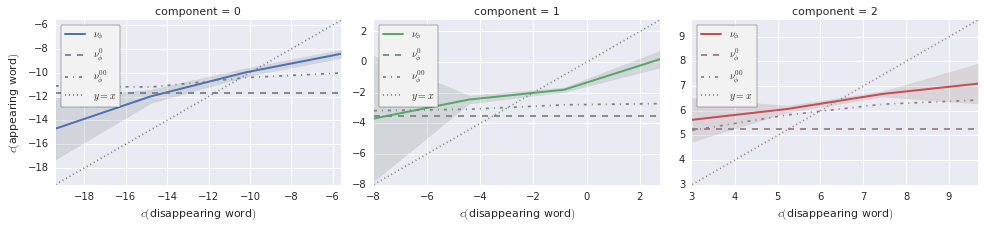

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.54721295  0.18870685  0.15627032  0.0413981   0.03818336]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.717049,-0.090498,0.314984,-0.553709,0.268019,-0.002856
Component-1,-0.511884,-0.096783,0.333026,0.739676,-0.265263,0.014708
Component-2,-0.462458,0.118929,-0.871593,0.097545,0.029225,0.044098


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 71288) |           | Elapsed Time: 0:00:11 ETA:  9 days, 20:33:08

  0% (  135 of 71288) |                    | Elapsed Time: 0:00:12 ETA:  0:08:42

  0% (  263 of 71288) |                    | Elapsed Time: 0:00:13 ETA:  0:08:52

  0% (  386 of 71288) |                    | Elapsed Time: 0:00:14 ETA:  0:09:02

  0% (  513 of 71288) |                    | Elapsed Time: 0:00:15 ETA:  0:09:03

  0% (  654 of 71288) |                    | Elapsed Time: 0:00:16 ETA:  0:08:50

  1% (  797 of 71288) |                    | Elapsed Time: 0:00:17 ETA:  0:08:41

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:18 ETA:  0:08:36

  1% ( 1038 of 71288) |                    | Elapsed Time: 0:00:19 ETA:  0:08:28

  1% ( 1182 of 71288) |                    | Elapsed Time: 0:00:20 ETA:  0:08:23

  1% ( 1322 of 71288) |                    | Elapsed Time: 0:00:21 ETA:  0:08:19

  2% ( 1468 of 71288) |                    | Elapsed Time: 0:00:22 ETA:  0:08:10

  2% ( 1624 of 71288) |                    | Elapsed Time: 0:00:23 ETA:  0:07:56

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:24 ETA:  0:07:44

  2% ( 1941 of 71288) |                    | Elapsed Time: 0:00:25 ETA:  0:07:37

  2% ( 2021 of 71288) |                    | Elapsed Time: 0:00:26 ETA:  0:08:03

  2% ( 2102 of 71288) |                    | Elapsed Time: 0:00:27 ETA:  0:08:34

  3% ( 2184 of 71288) |                    | Elapsed Time: 0:00:28 ETA:  0:09:07

  3% ( 2271 of 71288) |                    | Elapsed Time: 0:00:29 ETA:  0:09:38

  3% ( 2353 of 71288) |                    | Elapsed Time: 0:00:30 ETA:  0:10:21

  3% ( 2434 of 71288) |                    | Elapsed Time: 0:00:31 ETA:  0:11:21

  3% ( 2515 of 71288) |                    | Elapsed Time: 0:00:32 ETA:  0:12:25

  3% ( 2604 of 71288) |                    | Elapsed Time: 0:00:33 ETA:  0:12:31

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:00:34 ETA:  0:13:34

  3% ( 2811 of 71288) |                    | Elapsed Time: 0:00:35 ETA:  0:12:32

  4% ( 2937 of 71288) |                    | Elapsed Time: 0:00:36 ETA:  0:11:49

  4% ( 3064 of 71288) |                    | Elapsed Time: 0:00:37 ETA:  0:11:09

  4% ( 3202 of 71288) |                    | Elapsed Time: 0:00:38 ETA:  0:10:29

  4% ( 3338 of 71288) |                    | Elapsed Time: 0:00:39 ETA:  0:09:52

  4% ( 3482 of 71288) |                    | Elapsed Time: 0:00:40 ETA:  0:09:13

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:00:40 ETA:  0:08:37

  5% ( 3738 of 71288) |#                   | Elapsed Time: 0:00:41 ETA:  0:07:55

  5% ( 3910 of 71288) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:29

  5% ( 4087 of 71288) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:12

  5% ( 4261 of 71288) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:54

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:00:46 ETA:  0:06:28

  6% ( 4607 of 71288) |#                   | Elapsed Time: 0:00:47 ETA:  0:06:21

  6% ( 4762 of 71288) |#                   | Elapsed Time: 0:00:48 ETA:  0:06:17

  6% ( 4915 of 71288) |#                   | Elapsed Time: 0:00:49 ETA:  0:06:20

  7% ( 5064 of 71288) |#                   | Elapsed Time: 0:00:50 ETA:  0:06:27

  7% ( 5211 of 71288) |#                   | Elapsed Time: 0:00:51 ETA:  0:06:34

  7% ( 5271 of 71288) |#                   | Elapsed Time: 0:01:00 ETA:  0:15:16

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:01:00 ETA:  0:16:08

  7% ( 5482 of 71288) |#                   | Elapsed Time: 0:01:01 ETA:  0:16:47

  7% ( 5554 of 71288) |#                   | Elapsed Time: 0:01:02 ETA:  0:16:52

  7% ( 5685 of 71288) |#                   | Elapsed Time: 0:01:03 ETA:  0:17:12

  8% ( 5826 of 71288) |#                   | Elapsed Time: 0:01:04 ETA:  0:17:25

  8% ( 5989 of 71288) |#                   | Elapsed Time: 0:01:05 ETA:  0:17:14

  8% ( 6134 of 71288) |#                   | Elapsed Time: 0:01:06 ETA:  0:17:17

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:07 ETA:  0:08:06

  8% ( 6340 of 71288) |#                   | Elapsed Time: 0:01:08 ETA:  0:08:30

  9% ( 6444 of 71288) |#                   | Elapsed Time: 0:01:09 ETA:  0:08:48

  9% ( 6546 of 71288) |#                   | Elapsed Time: 0:01:10 ETA:  0:08:29

  9% ( 6681 of 71288) |#                   | Elapsed Time: 0:01:11 ETA:  0:08:25

  9% ( 6827 of 71288) |#                   | Elapsed Time: 0:01:12 ETA:  0:08:21

  9% ( 6968 of 71288) |#                   | Elapsed Time: 0:01:13 ETA:  0:08:34

  9% ( 7105 of 71288) |#                   | Elapsed Time: 0:01:14 ETA:  0:08:38

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:14 ETA:  0:08:25

 10% ( 7245 of 71288) |##                  | Elapsed Time: 0:01:15 ETA:  0:08:28

 10% ( 7364 of 71288) |##                  | Elapsed Time: 0:01:16 ETA:  0:08:17

 10% ( 7483 of 71288) |##                  | Elapsed Time: 0:01:17 ETA:  0:08:08

 10% ( 7601 of 71288) |##                  | Elapsed Time: 0:01:18 ETA:  0:07:58

 10% ( 7721 of 71288) |##                  | Elapsed Time: 0:01:19 ETA:  0:08:05

 10% ( 7840 of 71288) |##                  | Elapsed Time: 0:01:20 ETA:  0:08:19

 11% ( 7956 of 71288) |##                  | Elapsed Time: 0:01:21 ETA:  0:08:32

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:01:22 ETA:  0:08:43

 11% ( 8138 of 71288) |##                  | Elapsed Time: 0:01:23 ETA:  0:08:42

 11% ( 8258 of 71288) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:39

 11% ( 8374 of 71288) |##                  | Elapsed Time: 0:01:25 ETA:  0:08:39

 11% ( 8492 of 71288) |##                  | Elapsed Time: 0:01:26 ETA:  0:08:39

 12% ( 8609 of 71288) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:38

 12% ( 8727 of 71288) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:38

 12% ( 8845 of 71288) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:39

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:38

 12% ( 9047 of 71288) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:27

 12% ( 9185 of 71288) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:14

 13% ( 9322 of 71288) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:04

 13% ( 9465 of 71288) |##                  | Elapsed Time: 0:01:34 ETA:  0:07:48

 13% ( 9607 of 71288) |##                  | Elapsed Time: 0:01:35 ETA:  0:07:35

 13% ( 9758 of 71288) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:18

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:09

 13% ( 9943 of 71288) |##                  | Elapsed Time: 0:01:37 ETA:  0:06:57

 14% (10075 of 71288) |##                  | Elapsed Time: 0:01:38 ETA:  0:06:53

 14% (10221 of 71288) |##                  | Elapsed Time: 0:01:39 ETA:  0:06:48

 14% (10371 of 71288) |##                  | Elapsed Time: 0:01:40 ETA:  0:06:41

 14% (10521 of 71288) |##                  | Elapsed Time: 0:01:41 ETA:  0:06:35

 15% (10694 of 71288) |###                 | Elapsed Time: 0:01:42 ETA:  0:06:29

 15% (10845 of 71288) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:27

 15% (10997 of 71288) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:23

 15% (11150 of 71288) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:17

 15% (11305 of 71288) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:07

 16% (11444 of 71288) |###                 | Elapsed Time: 0:01:47 ETA:  0:06:08

 16% (11585 of 71288) |###                 | Elapsed Time: 0:01:48 ETA:  0:06:20

 16% (11714 of 71288) |###                 | Elapsed Time: 0:01:49 ETA:  0:06:29

 16% (11834 of 71288) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:39

 16% (11968 of 71288) |###                 | Elapsed Time: 0:01:51 ETA:  0:06:46

 16% (12102 of 71288) |###                 | Elapsed Time: 0:01:52 ETA:  0:06:53

 17% (12222 of 71288) |###                 | Elapsed Time: 0:01:53 ETA:  0:07:08

 17% (12354 of 71288) |###                 | Elapsed Time: 0:01:54 ETA:  0:07:19

 17% (12476 of 71288) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:19

 17% (12609 of 71288) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:13

 17% (12747 of 71288) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:08

 18% (12889 of 71288) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:01

 18% (13021 of 71288) |###                 | Elapsed Time: 0:01:59 ETA:  0:06:54

 18% (13165 of 71288) |###                 | Elapsed Time: 0:02:00 ETA:  0:06:48

 18% (13302 of 71288) |###                 | Elapsed Time: 0:02:01 ETA:  0:06:46

 18% (13367 of 71288) |###                 | Elapsed Time: 0:02:02 ETA:  0:06:39

 18% (13489 of 71288) |###                 | Elapsed Time: 0:02:03 ETA:  0:06:42

 19% (13604 of 71288) |###                 | Elapsed Time: 0:02:04 ETA:  0:06:53

 19% (13729 of 71288) |###                 | Elapsed Time: 0:02:05 ETA:  0:06:56

 19% (13835 of 71288) |###                 | Elapsed Time: 0:02:06 ETA:  0:07:11

 19% (13918 of 71288) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:42

 19% (14011 of 71288) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:05

 19% (14150 of 71288) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:07

 20% (14258 of 71288) |####                | Elapsed Time: 0:02:10 ETA:  0:08:09

 20% (14398 of 71288) |####                | Elapsed Time: 0:02:11 ETA:  0:07:59

 20% (14536 of 71288) |####                | Elapsed Time: 0:02:12 ETA:  0:07:49

 20% (14675 of 71288) |####                | Elapsed Time: 0:02:13 ETA:  0:07:34

 20% (14800 of 71288) |####                | Elapsed Time: 0:02:14 ETA:  0:07:33

 20% (14962 of 71288) |####                | Elapsed Time: 0:02:15 ETA:  0:07:03

 21% (15113 of 71288) |####                | Elapsed Time: 0:02:16 ETA:  0:06:30

 21% (15149 of 71288) |####                | Elapsed Time: 0:02:16 ETA:  0:06:08

 21% (15298 of 71288) |####                | Elapsed Time: 0:02:17 ETA:  0:06:03

 21% (15467 of 71288) |####                | Elapsed Time: 0:02:18 ETA:  0:05:49

 21% (15635 of 71288) |####                | Elapsed Time: 0:02:19 ETA:  0:05:37

 22% (15752 of 71288) |####                | Elapsed Time: 0:02:20 ETA:  0:05:44

 22% (15858 of 71288) |####                | Elapsed Time: 0:02:21 ETA:  0:05:57

 22% (15963 of 71288) |####                | Elapsed Time: 0:02:22 ETA:  0:06:04

 22% (16040 of 71288) |####                | Elapsed Time: 0:02:22 ETA:  0:06:17

 22% (16194 of 71288) |####                | Elapsed Time: 0:02:23 ETA:  0:06:14

 22% (16347 of 71288) |####                | Elapsed Time: 0:02:24 ETA:  0:06:08

 23% (16504 of 71288) |####                | Elapsed Time: 0:02:25 ETA:  0:06:04

 23% (16659 of 71288) |####                | Elapsed Time: 0:02:26 ETA:  0:06:09

 23% (16819 of 71288) |####                | Elapsed Time: 0:02:27 ETA:  0:06:11

 23% (16931 of 71288) |####                | Elapsed Time: 0:02:28 ETA:  0:05:57

 23% (17059 of 71288) |####                | Elapsed Time: 0:02:29 ETA:  0:05:47

 24% (17192 of 71288) |####                | Elapsed Time: 0:02:30 ETA:  0:05:34

 24% (17364 of 71288) |####                | Elapsed Time: 0:02:31 ETA:  0:05:21

 24% (17528 of 71288) |####                | Elapsed Time: 0:02:32 ETA:  0:05:16

 24% (17694 of 71288) |####                | Elapsed Time: 0:02:33 ETA:  0:05:11

 25% (17823 of 71288) |#####               | Elapsed Time: 0:02:34 ETA:  0:05:08

 25% (17986 of 71288) |#####               | Elapsed Time: 0:02:35 ETA:  0:05:04

 25% (18113 of 71288) |#####               | Elapsed Time: 0:02:36 ETA:  0:05:14

 25% (18247 of 71288) |#####               | Elapsed Time: 0:02:37 ETA:  0:05:19

 25% (18377 of 71288) |#####               | Elapsed Time: 0:02:38 ETA:  0:05:17

 26% (18540 of 71288) |#####               | Elapsed Time: 0:02:39 ETA:  0:05:06

 26% (18714 of 71288) |#####               | Elapsed Time: 0:02:40 ETA:  0:05:11

 26% (18858 of 71288) |#####               | Elapsed Time: 0:02:41 ETA:  0:05:19

 26% (19016 of 71288) |#####               | Elapsed Time: 0:02:42 ETA:  0:05:19

 26% (19183 of 71288) |#####               | Elapsed Time: 0:02:43 ETA:  0:05:16

 27% (19334 of 71288) |#####               | Elapsed Time: 0:02:44 ETA:  0:05:06

 27% (19504 of 71288) |#####               | Elapsed Time: 0:02:45 ETA:  0:04:51

 27% (19605 of 71288) |#####               | Elapsed Time: 0:02:46 ETA:  0:04:38

 27% (19773 of 71288) |#####               | Elapsed Time: 0:02:47 ETA:  0:04:35

 27% (19940 of 71288) |#####               | Elapsed Time: 0:02:48 ETA:  0:04:34

 28% (20109 of 71288) |#####               | Elapsed Time: 0:02:49 ETA:  0:04:31

 28% (20278 of 71288) |#####               | Elapsed Time: 0:02:50 ETA:  0:04:22

 28% (20451 of 71288) |#####               | Elapsed Time: 0:02:51 ETA:  0:04:16

 28% (20496 of 71288) |#####               | Elapsed Time: 0:02:51 ETA:  0:04:16

 28% (20669 of 71288) |#####               | Elapsed Time: 0:02:52 ETA:  0:04:07

 29% (20842 of 71288) |#####               | Elapsed Time: 0:02:53 ETA:  0:04:06

 29% (21019 of 71288) |#####               | Elapsed Time: 0:02:54 ETA:  0:04:03

 29% (21153 of 71288) |#####               | Elapsed Time: 0:02:55 ETA:  0:04:12

 29% (21293 of 71288) |#####               | Elapsed Time: 0:02:56 ETA:  0:04:20

 30% (21387 of 71288) |######              | Elapsed Time: 0:02:57 ETA:  0:04:27

 30% (21549 of 71288) |######              | Elapsed Time: 0:02:58 ETA:  0:04:29

 30% (21711 of 71288) |######              | Elapsed Time: 0:02:59 ETA:  0:04:32

 30% (21883 of 71288) |######              | Elapsed Time: 0:03:00 ETA:  0:04:28

 30% (22033 of 71288) |######              | Elapsed Time: 0:03:01 ETA:  0:04:34

 31% (22180 of 71288) |######              | Elapsed Time: 0:03:02 ETA:  0:04:42

 31% (22278 of 71288) |######              | Elapsed Time: 0:03:02 ETA:  0:04:55

 31% (22454 of 71288) |######              | Elapsed Time: 0:03:03 ETA:  0:04:39

 31% (22630 of 71288) |######              | Elapsed Time: 0:03:04 ETA:  0:04:25

 31% (22798 of 71288) |######              | Elapsed Time: 0:03:05 ETA:  0:04:16

 32% (22937 of 71288) |######              | Elapsed Time: 0:03:06 ETA:  0:04:22

 32% (23037 of 71288) |######              | Elapsed Time: 0:03:07 ETA:  0:04:43

 32% (23169 of 71288) |######              | Elapsed Time: 0:03:09 ETA:  0:05:02

 32% (23307 of 71288) |######              | Elapsed Time: 0:03:10 ETA:  0:05:05

 32% (23435 of 71288) |######              | Elapsed Time: 0:03:11 ETA:  0:05:08

 33% (23554 of 71288) |######              | Elapsed Time: 0:03:12 ETA:  0:05:33

 33% (23704 of 71288) |######              | Elapsed Time: 0:03:13 ETA:  0:05:45

 33% (23850 of 71288) |######              | Elapsed Time: 0:03:14 ETA:  0:05:55

 33% (24012 of 71288) |######              | Elapsed Time: 0:03:15 ETA:  0:05:42

 33% (24060 of 71288) |######              | Elapsed Time: 0:03:15 ETA:  0:05:19

 33% (24205 of 71288) |######              | Elapsed Time: 0:03:16 ETA:  0:05:06

 34% (24328 of 71288) |######              | Elapsed Time: 0:03:17 ETA:  0:05:14

 34% (24463 of 71288) |######              | Elapsed Time: 0:03:18 ETA:  0:05:14

 34% (24623 of 71288) |######              | Elapsed Time: 0:03:19 ETA:  0:04:59

 34% (24763 of 71288) |######              | Elapsed Time: 0:03:20 ETA:  0:04:49

 34% (24892 of 71288) |######              | Elapsed Time: 0:03:21 ETA:  0:04:57

 35% (24951 of 71288) |#######             | Elapsed Time: 0:03:21 ETA:  0:04:55

 35% (25029 of 71288) |#######             | Elapsed Time: 0:03:22 ETA:  0:05:35

 35% (25178 of 71288) |#######             | Elapsed Time: 0:03:23 ETA:  0:05:31

 35% (25317 of 71288) |#######             | Elapsed Time: 0:03:24 ETA:  0:05:32

 35% (25447 of 71288) |#######             | Elapsed Time: 0:03:25 ETA:  0:05:28

 35% (25593 of 71288) |#######             | Elapsed Time: 0:03:26 ETA:  0:05:22

 36% (25761 of 71288) |#######             | Elapsed Time: 0:03:27 ETA:  0:05:17

 36% (25842 of 71288) |#######             | Elapsed Time: 0:03:28 ETA:  0:05:19

 36% (25993 of 71288) |#######             | Elapsed Time: 0:03:29 ETA:  0:05:08

 36% (26154 of 71288) |#######             | Elapsed Time: 0:03:30 ETA:  0:05:01

 36% (26303 of 71288) |#######             | Elapsed Time: 0:03:31 ETA:  0:04:32

 37% (26447 of 71288) |#######             | Elapsed Time: 0:03:32 ETA:  0:04:32

 37% (26578 of 71288) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:35

 37% (26734 of 71288) |#######             | Elapsed Time: 0:03:34 ETA:  0:04:34

 37% (26862 of 71288) |#######             | Elapsed Time: 0:03:35 ETA:  0:04:50

 37% (27014 of 71288) |#######             | Elapsed Time: 0:03:36 ETA:  0:04:42

 38% (27176 of 71288) |#######             | Elapsed Time: 0:03:37 ETA:  0:04:36

 38% (27336 of 71288) |#######             | Elapsed Time: 0:03:38 ETA:  0:04:36

 38% (27490 of 71288) |#######             | Elapsed Time: 0:03:39 ETA:  0:04:33

 38% (27593 of 71288) |#######             | Elapsed Time: 0:03:40 ETA:  0:04:50

 38% (27625 of 71288) |#######             | Elapsed Time: 0:03:40 ETA:  0:04:44

 38% (27771 of 71288) |#######             | Elapsed Time: 0:03:41 ETA:  0:04:37

 39% (27894 of 71288) |#######             | Elapsed Time: 0:03:42 ETA:  0:04:44

 39% (28037 of 71288) |#######             | Elapsed Time: 0:03:43 ETA:  0:04:37

 39% (28206 of 71288) |#######             | Elapsed Time: 0:03:44 ETA:  0:04:29

 39% (28370 of 71288) |#######             | Elapsed Time: 0:03:45 ETA:  0:04:27

 40% (28516 of 71288) |########            | Elapsed Time: 0:03:46 ETA:  0:04:30

 40% (28663 of 71288) |########            | Elapsed Time: 0:03:47 ETA:  0:04:31

 40% (28818 of 71288) |########            | Elapsed Time: 0:03:48 ETA:  0:04:09

 40% (28949 of 71288) |########            | Elapsed Time: 0:03:49 ETA:  0:04:14

 40% (29090 of 71288) |########            | Elapsed Time: 0:03:50 ETA:  0:04:15

 41% (29236 of 71288) |########            | Elapsed Time: 0:03:51 ETA:  0:04:06

 41% (29407 of 71288) |########            | Elapsed Time: 0:03:52 ETA:  0:04:04

 41% (29560 of 71288) |########            | Elapsed Time: 0:03:53 ETA:  0:04:07

 41% (29721 of 71288) |########            | Elapsed Time: 0:03:54 ETA:  0:04:02

 41% (29867 of 71288) |########            | Elapsed Time: 0:03:55 ETA:  0:04:02

 42% (30018 of 71288) |########            | Elapsed Time: 0:03:56 ETA:  0:04:03

 42% (30170 of 71288) |########            | Elapsed Time: 0:03:57 ETA:  0:03:54

 42% (30298 of 71288) |########            | Elapsed Time: 0:03:58 ETA:  0:03:46

 42% (30428 of 71288) |########            | Elapsed Time: 0:03:59 ETA:  0:03:51

 42% (30569 of 71288) |########            | Elapsed Time: 0:04:00 ETA:  0:03:59

 43% (30718 of 71288) |########            | Elapsed Time: 0:04:01 ETA:  0:03:58

 43% (30859 of 71288) |########            | Elapsed Time: 0:04:02 ETA:  0:04:01

 43% (31008 of 71288) |########            | Elapsed Time: 0:04:03 ETA:  0:04:05

 43% (31155 of 71288) |########            | Elapsed Time: 0:04:04 ETA:  0:04:03

 43% (31189 of 71288) |########            | Elapsed Time: 0:04:04 ETA:  0:04:05

 43% (31335 of 71288) |########            | Elapsed Time: 0:04:05 ETA:  0:04:06

 44% (31503 of 71288) |########            | Elapsed Time: 0:04:06 ETA:  0:04:01

 44% (31663 of 71288) |########            | Elapsed Time: 0:04:07 ETA:  0:03:48

 44% (31781 of 71288) |########            | Elapsed Time: 0:04:08 ETA:  0:03:56

 44% (31926 of 71288) |########            | Elapsed Time: 0:04:09 ETA:  0:03:56

 45% (32080 of 71288) |#########           | Elapsed Time: 0:04:11 ETA:  0:03:56

 45% (32229 of 71288) |#########           | Elapsed Time: 0:04:12 ETA:  0:03:54

 45% (32365 of 71288) |#########           | Elapsed Time: 0:04:13 ETA:  0:03:58

 45% (32505 of 71288) |#########           | Elapsed Time: 0:04:14 ETA:  0:03:59

 45% (32639 of 71288) |#########           | Elapsed Time: 0:04:15 ETA:  0:04:14

 45% (32787 of 71288) |#########           | Elapsed Time: 0:04:16 ETA:  0:04:18

 46% (32971 of 71288) |#########           | Elapsed Time: 0:04:17 ETA:  0:03:59

 46% (33135 of 71288) |#########           | Elapsed Time: 0:04:18 ETA:  0:03:47

 46% (33274 of 71288) |#########           | Elapsed Time: 0:04:19 ETA:  0:03:50

 46% (33415 of 71288) |#########           | Elapsed Time: 0:04:20 ETA:  0:03:53

 47% (33570 of 71288) |#########           | Elapsed Time: 0:04:21 ETA:  0:03:44

 47% (33713 of 71288) |#########           | Elapsed Time: 0:04:22 ETA:  0:03:42

 47% (33862 of 71288) |#########           | Elapsed Time: 0:04:23 ETA:  0:03:38

 47% (34030 of 71288) |#########           | Elapsed Time: 0:04:24 ETA:  0:03:31

 47% (34189 of 71288) |#########           | Elapsed Time: 0:04:25 ETA:  0:03:27

 48% (34355 of 71288) |#########           | Elapsed Time: 0:04:26 ETA:  0:03:25

 48% (34531 of 71288) |#########           | Elapsed Time: 0:04:27 ETA:  0:03:10

 48% (34675 of 71288) |#########           | Elapsed Time: 0:04:28 ETA:  0:03:08

 48% (34753 of 71288) |#########           | Elapsed Time: 0:04:28 ETA:  0:03:14

 48% (34870 of 71288) |#########           | Elapsed Time: 0:04:29 ETA:  0:03:24

 49% (35031 of 71288) |#########           | Elapsed Time: 0:04:30 ETA:  0:03:15

 49% (35191 of 71288) |#########           | Elapsed Time: 0:04:31 ETA:  0:03:12

 49% (35361 of 71288) |#########           | Elapsed Time: 0:04:32 ETA:  0:03:10

 49% (35532 of 71288) |#########           | Elapsed Time: 0:04:33 ETA:  0:03:05

 50% (35645 of 71288) |##########          | Elapsed Time: 0:04:34 ETA:  0:03:09

 50% (35808 of 71288) |##########          | Elapsed Time: 0:04:35 ETA:  0:03:12

 50% (35902 of 71288) |##########          | Elapsed Time: 0:04:36 ETA:  0:03:30

 50% (36037 of 71288) |##########          | Elapsed Time: 0:04:37 ETA:  0:03:29

 50% (36176 of 71288) |##########          | Elapsed Time: 0:04:38 ETA:  0:03:20

 50% (36312 of 71288) |##########          | Elapsed Time: 0:04:39 ETA:  0:03:28

 51% (36456 of 71288) |##########          | Elapsed Time: 0:04:40 ETA:  0:03:33

 51% (36536 of 71288) |##########          | Elapsed Time: 0:04:41 ETA:  0:03:43

 51% (36678 of 71288) |##########          | Elapsed Time: 0:04:42 ETA:  0:03:55

 51% (36841 of 71288) |##########          | Elapsed Time: 0:04:43 ETA:  0:03:48

 51% (37016 of 71288) |##########          | Elapsed Time: 0:04:44 ETA:  0:03:42

 52% (37180 of 71288) |##########          | Elapsed Time: 0:04:45 ETA:  0:03:13

 52% (37312 of 71288) |##########          | Elapsed Time: 0:04:46 ETA:  0:03:13

 52% (37427 of 71288) |##########          | Elapsed Time: 0:04:47 ETA:  0:03:13

 52% (37566 of 71288) |##########          | Elapsed Time: 0:04:48 ETA:  0:03:11

 52% (37722 of 71288) |##########          | Elapsed Time: 0:04:49 ETA:  0:03:06

 53% (37889 of 71288) |##########          | Elapsed Time: 0:04:50 ETA:  0:02:58

 53% (38026 of 71288) |##########          | Elapsed Time: 0:04:51 ETA:  0:02:58

 53% (38199 of 71288) |##########          | Elapsed Time: 0:04:52 ETA:  0:02:54

 53% (38318 of 71288) |##########          | Elapsed Time: 0:04:52 ETA:  0:03:01

 53% (38475 of 71288) |##########          | Elapsed Time: 0:04:53 ETA:  0:03:03

 54% (38639 of 71288) |##########          | Elapsed Time: 0:04:54 ETA:  0:02:50

 54% (38786 of 71288) |##########          | Elapsed Time: 0:04:55 ETA:  0:02:45

 54% (38952 of 71288) |##########          | Elapsed Time: 0:04:56 ETA:  0:02:36

 54% (39110 of 71288) |##########          | Elapsed Time: 0:04:57 ETA:  0:02:34

 55% (39209 of 71288) |###########         | Elapsed Time: 0:04:58 ETA:  0:02:35

 55% (39385 of 71288) |###########         | Elapsed Time: 0:04:59 ETA:  0:02:21

 55% (39537 of 71288) |###########         | Elapsed Time: 0:05:00 ETA:  0:02:27

 55% (39690 of 71288) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:26

 55% (39831 of 71288) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:30

 56% (39974 of 71288) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:36

 56% (40100 of 71288) |###########         | Elapsed Time: 0:05:04 ETA:  0:02:41

 56% (40270 of 71288) |###########         | Elapsed Time: 0:05:05 ETA:  0:02:39

 56% (40418 of 71288) |###########         | Elapsed Time: 0:05:06 ETA:  0:02:41

 56% (40605 of 71288) |###########         | Elapsed Time: 0:05:07 ETA:  0:02:31

 57% (40769 of 71288) |###########         | Elapsed Time: 0:05:08 ETA:  0:02:34

 57% (40919 of 71288) |###########         | Elapsed Time: 0:05:09 ETA:  0:02:34

 57% (40991 of 71288) |###########         | Elapsed Time: 0:05:10 ETA:  0:02:36

 57% (41147 of 71288) |###########         | Elapsed Time: 0:05:11 ETA:  0:02:30

 57% (41316 of 71288) |###########         | Elapsed Time: 0:05:12 ETA:  0:02:20

 58% (41470 of 71288) |###########         | Elapsed Time: 0:05:13 ETA:  0:02:11

 58% (41623 of 71288) |###########         | Elapsed Time: 0:05:14 ETA:  0:02:16

 58% (41778 of 71288) |###########         | Elapsed Time: 0:05:15 ETA:  0:02:13

 58% (41882 of 71288) |###########         | Elapsed Time: 0:05:15 ETA:  0:02:26

 58% (42045 of 71288) |###########         | Elapsed Time: 0:05:16 ETA:  0:02:25

 59% (42186 of 71288) |###########         | Elapsed Time: 0:05:17 ETA:  0:02:27

 59% (42339 of 71288) |###########         | Elapsed Time: 0:05:18 ETA:  0:02:24

 59% (42506 of 71288) |###########         | Elapsed Time: 0:05:19 ETA:  0:02:19

 59% (42662 of 71288) |###########         | Elapsed Time: 0:05:20 ETA:  0:02:22

 60% (42773 of 71288) |############        | Elapsed Time: 0:05:21 ETA:  0:02:19

 60% (42934 of 71288) |############        | Elapsed Time: 0:05:22 ETA:  0:02:15

 60% (43073 of 71288) |############        | Elapsed Time: 0:05:23 ETA:  0:02:20

 60% (43181 of 71288) |############        | Elapsed Time: 0:05:24 ETA:  0:02:33

 60% (43276 of 71288) |############        | Elapsed Time: 0:05:25 ETA:  0:02:58

 60% (43371 of 71288) |############        | Elapsed Time: 0:05:26 ETA:  0:03:17

 61% (43487 of 71288) |############        | Elapsed Time: 0:05:27 ETA:  0:03:33

 61% (43620 of 71288) |############        | Elapsed Time: 0:05:28 ETA:  0:03:48

 61% (43664 of 71288) |############        | Elapsed Time: 0:05:28 ETA:  0:04:03

 61% (43803 of 71288) |############        | Elapsed Time: 0:05:29 ETA:  0:04:09

 61% (43934 of 71288) |############        | Elapsed Time: 0:05:30 ETA:  0:04:26

 61% (44043 of 71288) |############        | Elapsed Time: 0:05:31 ETA:  0:04:43

 62% (44202 of 71288) |############        | Elapsed Time: 0:05:32 ETA:  0:04:12

 62% (44354 of 71288) |############        | Elapsed Time: 0:05:33 ETA:  0:03:40

 62% (44556 of 71288) |############        | Elapsed Time: 0:05:35 ETA:  0:02:49

 62% (44655 of 71288) |############        | Elapsed Time: 0:05:36 ETA:  0:03:05

 62% (44780 of 71288) |############        | Elapsed Time: 0:05:37 ETA:  0:03:08

 63% (44927 of 71288) |############        | Elapsed Time: 0:05:38 ETA:  0:03:03

 63% (45090 of 71288) |############        | Elapsed Time: 0:05:39 ETA:  0:02:48

 63% (45227 of 71288) |############        | Elapsed Time: 0:05:40 ETA:  0:02:35

 63% (45354 of 71288) |############        | Elapsed Time: 0:05:41 ETA:  0:02:47

 63% (45447 of 71288) |############        | Elapsed Time: 0:05:41 ETA:  0:02:53

 63% (45599 of 71288) |############        | Elapsed Time: 0:05:42 ETA:  0:03:00

 64% (45740 of 71288) |############        | Elapsed Time: 0:05:43 ETA:  0:03:00

 64% (45887 of 71288) |############        | Elapsed Time: 0:05:44 ETA:  0:02:38

 64% (46043 of 71288) |############        | Elapsed Time: 0:05:45 ETA:  0:02:25

 64% (46221 of 71288) |############        | Elapsed Time: 0:05:46 ETA:  0:02:12

 65% (46338 of 71288) |#############       | Elapsed Time: 0:05:47 ETA:  0:02:13

 65% (46487 of 71288) |#############       | Elapsed Time: 0:05:48 ETA:  0:02:07

 65% (46639 of 71288) |#############       | Elapsed Time: 0:05:49 ETA:  0:01:57

 65% (46774 of 71288) |#############       | Elapsed Time: 0:05:50 ETA:  0:01:59

 65% (46927 of 71288) |#############       | Elapsed Time: 0:05:51 ETA:  0:01:57

 66% (47069 of 71288) |#############       | Elapsed Time: 0:05:52 ETA:  0:01:55

 66% (47229 of 71288) |#############       | Elapsed Time: 0:05:53 ETA:  0:01:59

 66% (47386 of 71288) |#############       | Elapsed Time: 0:05:54 ETA:  0:02:07

 66% (47562 of 71288) |#############       | Elapsed Time: 0:05:55 ETA:  0:01:59

 66% (47680 of 71288) |#############       | Elapsed Time: 0:05:56 ETA:  0:02:10

 67% (47808 of 71288) |#############       | Elapsed Time: 0:05:57 ETA:  0:02:19

 67% (47982 of 71288) |#############       | Elapsed Time: 0:05:58 ETA:  0:02:02

 67% (48120 of 71288) |#############       | Elapsed Time: 0:05:59 ETA:  0:02:01

 67% (48291 of 71288) |#############       | Elapsed Time: 0:06:00 ETA:  0:01:48

 67% (48432 of 71288) |#############       | Elapsed Time: 0:06:01 ETA:  0:01:47

 68% (48580 of 71288) |#############       | Elapsed Time: 0:06:02 ETA:  0:01:47

 68% (48740 of 71288) |#############       | Elapsed Time: 0:06:03 ETA:  0:01:45

 68% (48886 of 71288) |#############       | Elapsed Time: 0:06:04 ETA:  0:01:55

 68% (49011 of 71288) |#############       | Elapsed Time: 0:06:05 ETA:  0:01:49

 68% (49150 of 71288) |#############       | Elapsed Time: 0:06:06 ETA:  0:01:44

 69% (49301 of 71288) |#############       | Elapsed Time: 0:06:07 ETA:  0:01:52

 69% (49464 of 71288) |#############       | Elapsed Time: 0:06:08 ETA:  0:01:48

 69% (49616 of 71288) |#############       | Elapsed Time: 0:06:09 ETA:  0:01:54

 69% (49744 of 71288) |#############       | Elapsed Time: 0:06:10 ETA:  0:01:57

 70% (49902 of 71288) |##############      | Elapsed Time: 0:06:11 ETA:  0:01:58

 70% (50047 of 71288) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:57

 70% (50200 of 71288) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:48

 70% (50350 of 71288) |##############      | Elapsed Time: 0:06:14 ETA:  0:01:42

 70% (50472 of 71288) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:53

 71% (50636 of 71288) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:52

 71% (50793 of 71288) |##############      | Elapsed Time: 0:06:17 ETA:  0:01:41

 71% (50930 of 71288) |##############      | Elapsed Time: 0:06:18 ETA:  0:01:48

 71% (51072 of 71288) |##############      | Elapsed Time: 0:06:19 ETA:  0:01:49

 71% (51225 of 71288) |##############      | Elapsed Time: 0:06:20 ETA:  0:01:45

 72% (51397 of 71288) |##############      | Elapsed Time: 0:06:21 ETA:  0:01:36

 72% (51530 of 71288) |##############      | Elapsed Time: 0:06:22 ETA:  0:01:42

 72% (51684 of 71288) |##############      | Elapsed Time: 0:06:23 ETA:  0:01:34

 72% (51849 of 71288) |##############      | Elapsed Time: 0:06:24 ETA:  0:01:29

 72% (51997 of 71288) |##############      | Elapsed Time: 0:06:25 ETA:  0:01:29

 73% (52140 of 71288) |##############      | Elapsed Time: 0:06:26 ETA:  0:01:26

 73% (52301 of 71288) |##############      | Elapsed Time: 0:06:27 ETA:  0:01:18

 73% (52465 of 71288) |##############      | Elapsed Time: 0:06:28 ETA:  0:01:12

 73% (52575 of 71288) |##############      | Elapsed Time: 0:06:29 ETA:  0:01:15

 73% (52700 of 71288) |##############      | Elapsed Time: 0:06:30 ETA:  0:01:17

 74% (52827 of 71288) |##############      | Elapsed Time: 0:06:31 ETA:  0:01:26

 74% (52989 of 71288) |##############      | Elapsed Time: 0:06:32 ETA:  0:01:21

 74% (53147 of 71288) |##############      | Elapsed Time: 0:06:33 ETA:  0:01:22

 74% (53311 of 71288) |##############      | Elapsed Time: 0:06:34 ETA:  0:01:15

 75% (53467 of 71288) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:23

 75% (53575 of 71288) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:46

 75% (53750 of 71288) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:39

 75% (53907 of 71288) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:25

 75% (54055 of 71288) |###############     | Elapsed Time: 0:06:39 ETA:  0:01:16

 76% (54212 of 71288) |###############     | Elapsed Time: 0:06:40 ETA:  0:01:17

 76% (54358 of 71288) |###############     | Elapsed Time: 0:06:41 ETA:  0:01:32

 76% (54513 of 71288) |###############     | Elapsed Time: 0:06:42 ETA:  0:01:19

 76% (54652 of 71288) |###############     | Elapsed Time: 0:06:43 ETA:  0:01:22

 76% (54796 of 71288) |###############     | Elapsed Time: 0:06:44 ETA:  0:01:07

 77% (54957 of 71288) |###############     | Elapsed Time: 0:06:45 ETA:  0:01:12

 77% (55082 of 71288) |###############     | Elapsed Time: 0:06:46 ETA:  0:01:24

 77% (55249 of 71288) |###############     | Elapsed Time: 0:06:47 ETA:  0:01:26

 77% (55373 of 71288) |###############     | Elapsed Time: 0:06:48 ETA:  0:01:31

 77% (55498 of 71288) |###############     | Elapsed Time: 0:06:49 ETA:  0:01:39

 78% (55667 of 71288) |###############     | Elapsed Time: 0:06:50 ETA:  0:01:32

 78% (55828 of 71288) |###############     | Elapsed Time: 0:06:51 ETA:  0:01:22

 78% (55987 of 71288) |###############     | Elapsed Time: 0:06:52 ETA:  0:01:14

 78% (56140 of 71288) |###############     | Elapsed Time: 0:06:53 ETA:  0:01:09

 78% (56307 of 71288) |###############     | Elapsed Time: 0:06:54 ETA:  0:00:59

 79% (56455 of 71288) |###############     | Elapsed Time: 0:06:55 ETA:  0:01:00

 79% (56544 of 71288) |###############     | Elapsed Time: 0:06:56 ETA:  0:01:13

 79% (56681 of 71288) |###############     | Elapsed Time: 0:06:57 ETA:  0:01:07

 79% (56814 of 71288) |###############     | Elapsed Time: 0:06:58 ETA:  0:01:22

 79% (56939 of 71288) |###############     | Elapsed Time: 0:06:59 ETA:  0:01:37

 80% (57031 of 71288) |################    | Elapsed Time: 0:07:00 ETA:  0:01:43

 80% (57163 of 71288) |################    | Elapsed Time: 0:07:01 ETA:  0:01:51

 80% (57310 of 71288) |################    | Elapsed Time: 0:07:02 ETA:  0:01:45

 80% (57460 of 71288) |################    | Elapsed Time: 0:07:03 ETA:  0:01:51

 80% (57616 of 71288) |################    | Elapsed Time: 0:07:04 ETA:  0:01:46

 81% (57770 of 71288) |################    | Elapsed Time: 0:07:05 ETA:  0:01:17

 81% (57922 of 71288) |################    | Elapsed Time: 0:07:06 ETA:  0:01:09

 81% (58067 of 71288) |################    | Elapsed Time: 0:07:07 ETA:  0:01:04

 81% (58210 of 71288) |################    | Elapsed Time: 0:07:08 ETA:  0:00:55

 81% (58376 of 71288) |################    | Elapsed Time: 0:07:09 ETA:  0:00:48

 82% (58525 of 71288) |################    | Elapsed Time: 0:07:10 ETA:  0:00:41

 82% (58681 of 71288) |################    | Elapsed Time: 0:07:11 ETA:  0:00:37

 82% (58813 of 71288) |################    | Elapsed Time: 0:07:12 ETA:  0:00:33

 82% (58969 of 71288) |################    | Elapsed Time: 0:07:13 ETA:  0:00:32

 82% (59127 of 71288) |################    | Elapsed Time: 0:07:14 ETA:  0:00:30

 83% (59264 of 71288) |################    | Elapsed Time: 0:07:15 ETA:  0:00:35

 83% (59420 of 71288) |################    | Elapsed Time: 0:07:16 ETA:  0:00:30

 83% (59578 of 71288) |################    | Elapsed Time: 0:07:17 ETA:  0:00:24

 83% (59704 of 71288) |################    | Elapsed Time: 0:07:18 ETA:  0:00:31

 83% (59860 of 71288) |################    | Elapsed Time: 0:07:19 ETA:  0:00:28

 84% (60012 of 71288) |################    | Elapsed Time: 0:07:20 ETA:  0:00:28

 84% (60151 of 71288) |################    | Elapsed Time: 0:07:21 ETA:  0:00:34

 84% (60305 of 71288) |################    | Elapsed Time: 0:07:22 ETA:  0:00:34

 84% (60442 of 71288) |################    | Elapsed Time: 0:07:23 ETA:  0:00:40

 85% (60595 of 71288) |#################   | Elapsed Time: 0:07:24 ETA:  0:00:41

 85% (60713 of 71288) |#################   | Elapsed Time: 0:07:25 ETA:  0:00:58

 85% (60866 of 71288) |#################   | Elapsed Time: 0:07:26 ETA:  0:00:51

 85% (61010 of 71288) |#################   | Elapsed Time: 0:07:27 ETA:  0:00:55

 85% (61157 of 71288) |#################   | Elapsed Time: 0:07:28 ETA:  0:00:56

 85% (61298 of 71288) |#################   | Elapsed Time: 0:07:29 ETA:  0:00:54

 86% (61431 of 71288) |#################   | Elapsed Time: 0:07:30 ETA:  0:01:02

 86% (61486 of 71288) |#################   | Elapsed Time: 0:07:30 ETA:  0:01:00

 86% (61634 of 71288) |#################   | Elapsed Time: 0:07:31 ETA:  0:00:57

 86% (61770 of 71288) |#################   | Elapsed Time: 0:07:32 ETA:  0:00:57

 86% (61933 of 71288) |#################   | Elapsed Time: 0:07:33 ETA:  0:00:37

 87% (62083 of 71288) |#################   | Elapsed Time: 0:07:34 ETA:  0:00:37

 87% (62247 of 71288) |#################   | Elapsed Time: 0:07:35 ETA:  0:00:28

 87% (62378 of 71288) |#################   | Elapsed Time: 0:07:36 ETA:  0:00:25

 87% (62522 of 71288) |#################   | Elapsed Time: 0:07:37 ETA:  0:00:23

 87% (62666 of 71288) |#################   | Elapsed Time: 0:07:38 ETA:  0:00:18

 88% (62796 of 71288) |#################   | Elapsed Time: 0:07:39 ETA:  0:00:23

 88% (62945 of 71288) |#################   | Elapsed Time: 0:07:40 ETA:  0:00:22

 88% (63099 of 71288) |#################   | Elapsed Time: 0:07:41 ETA:  0:00:14

 88% (63269 of 71288) |#################   | Elapsed Time: 0:07:42 ETA:  0:00:15

 88% (63439 of 71288) |#################   | Elapsed Time: 0:07:43 ETA:  0:00:12

 89% (63585 of 71288) |#################   | Elapsed Time: 0:07:44 ETA:  0:00:14

 89% (63736 of 71288) |#################   | Elapsed Time: 0:07:45 ETA:  0:00:10

 89% (63898 of 71288) |#################   | Elapsed Time: 0:07:46 ETA:  0:00:02

 89% (64052 of 71288) |#################   | Elapsed Time: 0:07:47 ETA:  0:00:00

 90% (64160 of 71288) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:00

 90% (64296 of 71288) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:00

 90% (64438 of 71288) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:00

 90% (64583 of 71288) |##################  | Elapsed Time: 0:07:51 ETA:  0:00:00

 90% (64737 of 71288) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:05

 91% (64883 of 71288) |##################  | Elapsed Time: 0:07:53 ETA:  0:00:04

 91% (65012 of 71288) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:11

 91% (65051 of 71288) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:15

 91% (65203 of 71288) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:15

 91% (65353 of 71288) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:17

 91% (65514 of 71288) |##################  | Elapsed Time: 0:07:57 ETA:  0:00:06

 92% (65667 of 71288) |##################  | Elapsed Time: 0:07:58 ETA:  0:00:01

 92% (65821 of 71288) |##################  | Elapsed Time: 0:07:59 ETA:  0:00:00

 92% (65942 of 71288) |##################  | Elapsed Time: 0:08:00 ETA:  0:00:05

 92% (66096 of 71288) |##################  | Elapsed Time: 0:08:01 ETA:  0:00:01

 92% (66265 of 71288) |##################  | Elapsed Time: 0:08:02 ETA:  0:00:00

 93% (66420 of 71288) |##################  | Elapsed Time: 0:08:03 ETA:  0:00:00

 93% (66563 of 71288) |##################  | Elapsed Time: 0:08:04 ETA:  0:00:00

 93% (66720 of 71288) |##################  | Elapsed Time: 0:08:05 ETA:  0:00:00

 93% (66833 of 71288) |##################  | Elapsed Time: 0:08:06 ETA:  0:00:00

 93% (66989 of 71288) |##################  | Elapsed Time: 0:08:07 ETA:  0:00:00

 94% (67144 of 71288) |##################  | Elapsed Time: 0:08:08 ETA:  0:00:00

 94% (67306 of 71288) |##################  | Elapsed Time: 0:08:09 ETA:  0:00:00

 94% (67453 of 71288) |##################  | Elapsed Time: 0:08:10 ETA:  0:00:00

 94% (67610 of 71288) |##################  | Elapsed Time: 0:08:11 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:08:12 ETA:  0:00:00

 95% (67880 of 71288) |################### | Elapsed Time: 0:08:13 ETA:  0:00:00

 95% (68034 of 71288) |################### | Elapsed Time: 0:08:14 ETA:  0:00:00

 95% (68175 of 71288) |################### | Elapsed Time: 0:08:15 ETA:  0:00:00

 95% (68323 of 71288) |################### | Elapsed Time: 0:08:16 ETA:  0:00:00

 96% (68491 of 71288) |################### | Elapsed Time: 0:08:17 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:08:18 ETA:  0:00:00

 96% (68766 of 71288) |################### | Elapsed Time: 0:08:19 ETA:  0:00:00

 96% (68914 of 71288) |################### | Elapsed Time: 0:08:20 ETA:  0:00:00

 96% (69036 of 71288) |################### | Elapsed Time: 0:08:21 ETA:  0:00:00

 97% (69178 of 71288) |################### | Elapsed Time: 0:08:22 ETA:  0:00:00

 97% (69339 of 71288) |################### | Elapsed Time: 0:08:23 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:08:24 ETA:  0:00:00

 97% (69667 of 71288) |################### | Elapsed Time: 0:08:25 ETA:  0:00:00

 97% (69820 of 71288) |################### | Elapsed Time: 0:08:26 ETA:  0:00:00

 98% (69984 of 71288) |################### | Elapsed Time: 0:08:27 ETA:  0:00:00

 98% (70133 of 71288) |################### | Elapsed Time: 0:08:28 ETA:  0:00:00

 98% (70279 of 71288) |################### | Elapsed Time: 0:08:29 ETA:  0:00:00

 98% (70397 of 71288) |################### | Elapsed Time: 0:08:30 ETA:  0:00:00

 98% (70557 of 71288) |################### | Elapsed Time: 0:08:31 ETA:  0:00:00

 99% (70717 of 71288) |################### | Elapsed Time: 0:08:32 ETA:  0:00:00

 99% (70863 of 71288) |################### | Elapsed Time: 0:08:33 ETA:  0:00:00

 99% (71012 of 71288) |################### | Elapsed Time: 0:08:34 ETA:  0:00:00

 99% (71166 of 71288) |################### | Elapsed Time: 0:08:35 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:08:36 Time: 0:08:36


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

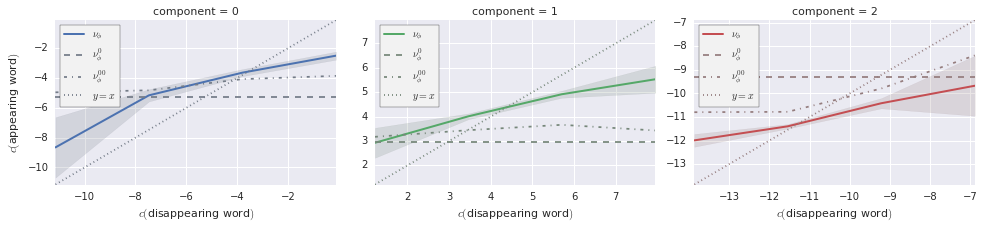

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2539 (cluster-unique) substitutions, but the PCA is in fact computed on 931 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.